# PROBLEM STATEMENT

### The objective of the project is to predict whether the company is at the risk of going bankrupt or not 
### 94 features are used to predict the result
### Output - Bankrupt - 0 /No, 1-Yes

# Importing libraries

In [5]:
import os # operating system
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Load Dataset

In [6]:
dataset = pd.read_csv('bankruptcy prediction.csv')
dataset.head()

ROA(C) before interest and depreciation before interest  \
0                                           0.370594          
1                                           0.464291          
2                                           0.426071          
3                                           0.399844          
4                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

    Continuous interest rate (after tax)  ...   Net Income to Total Assets  \
0                               0.780985  ...                     0.716845   
1                               0.781506  ...                     0.795297   
2                               0.780284  ...                     0.774670   
3                               0.781241  ...                     0.739555   
4                               0.781550  ...                     0.795016   

    Total assets to GNP price   No-credit Interval   Gross Profit to Sales  \
0                    0.009219             0.622879                0.601453   
1                    0.008323             0.623652                0.610237   
2                    0.040003             0.623841                0.601449   
3                    0.003252             0.622929                0.583538   
4                    0.003878             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Equity to Liability  \
0                                           0.564050                0.016469   
1                                           0.570175                0.020794  

# Display the number of rows and number of columns

In [7]:
print(f"Number of rows    : {dataset.shape[0]}")
print(f"Number of columns : {dataset.shape[1]}")

Number of rows    : 6819
Number of columns : 95


# Information about dataset

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 95 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 1    ROA(A) before interest and % after tax                   6819 non-null   float64
 2    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 3    Operating Gross Margin                                   6819 non-null   float64
 4    Realized Sales Gross Margin                              6819 non-null   float64
 5    Operating Profit Rate                                    6819 non-null   float64
 6    Pre-tax net Interest Rate                                6819 non-null   float64
 7    After-tax net Interest Rate                              6819 non-null   float64
 8    Non-industry inco

# Basic Statistics about the dataset

In [9]:
dataset.describe()

ROA(C) before interest and depreciation before interest  \
count                                        6819.000000          
mean                                            0.505180          
std                                             0.060686          
min                                             0.000000          
25%                                             0.476527          
50%                                             0.502706          
75%                                             0.535563          
max                                             1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  \
count                                   6819.000000   
mean                                       0.303623   
std                                        0.011163   
min                                        0.000000   
25%                                        0.303466   
50%                                        0.303525   
75%                                        0.303585   
max                                        1.000000   

        Continuous interest rate (after tax)  ...  \
count                            6819.000000  ...   
mean                                0.781381  ...   
std                                 0.012679  ...   
min                                 0.000000  ...   
25%                                 0.781567  ...   
50%                                 0.781635  ...   
75%                                 0.781735  ...   
max 

### It is observed from the above statistics that the data is already scaled (min - max scaling) with min value - 0 and maximum value -1 for all columns

## Nature of variables/ features
* Predictor variables --- Numerical data
* Response variables  --- Categorical ( Nominal) data

##  List of Features / Columns

In [10]:
features = dataset.columns
features

Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan �',
       ' Operating Profit Per Share (Yuan �',
       ' Per Share Net profit before tax (Yuan �',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit Growth Rate', '

# PRE PROCESSING

# Checking missed values

In [11]:
dataset.isnull().sum()

 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
 Realized Sales Gross Margin                                0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Equity to Liability                                        0
Bankrupt                                                    0
Length: 95, dtype: int64

### From the above inference we can say that there are no  missing values in dataset

# Checking Duplicate values

In [12]:
dataset.duplicated().any()

False

### There are no duplicte rows in the dataset

# Unique values

In [13]:
for column in features:
    print(f"{column} : {dataset[column].nunique()}")

 ROA(C) before interest and depreciation before interest : 3333
 ROA(A) before interest and % after tax : 3151
 ROA(B) before interest and depreciation after tax : 3160
 Operating Gross Margin : 3781
 Realized Sales Gross Margin : 3788
 Operating Profit Rate : 3376
 Pre-tax net Interest Rate : 3789
 After-tax net Interest Rate : 3604
 Non-industry income and expenditure/revenue : 2551
 Continuous interest rate (after tax) : 3617
 Operating Expense Rate : 2966
 Research and development expense rate : 1536
 Cash flow rate : 5557
 Interest-bearing debt interest rate : 1080
 Tax rate (A) : 2488
 Net Value Per Share (B) : 2278
 Net Value Per Share (A) : 2285
 Net Value Per Share (C) : 2284
 Persistent EPS in the Last Four Seasons : 1358
 Cash Flow Per Share : 1545
 Revenue Per Share (Yuan � : 3807
 Operating Profit Per Share (Yuan � : 1236
 Per Share Net profit before tax (Yuan � : 1522
 Realized Sales Gross Profit Growth Rate : 5583
 Operating Profit Growth Rate : 6249
 After-tax Net Profi

### Almost all columns except "Liability-Assets Flag"  have unique values.
### Let's see the values of "Liability-Assets Flag"

In [14]:
dataset[" Liability-Assets Flag"].value_counts()

0    6811
1       8
Name:  Liability-Assets Flag, dtype: int64

In [15]:
6811 / 6819

0.9988268074497727

### It has all 0s and doesn't contribute much to the output.
### Hence this column can be dropped

In [16]:
dataset = dataset.drop(" Liability-Assets Flag", axis=1)

In [17]:
dataset.shape

(6819, 94)

In [18]:
features = dataset.columns

# Outlier treatment

## Box plot

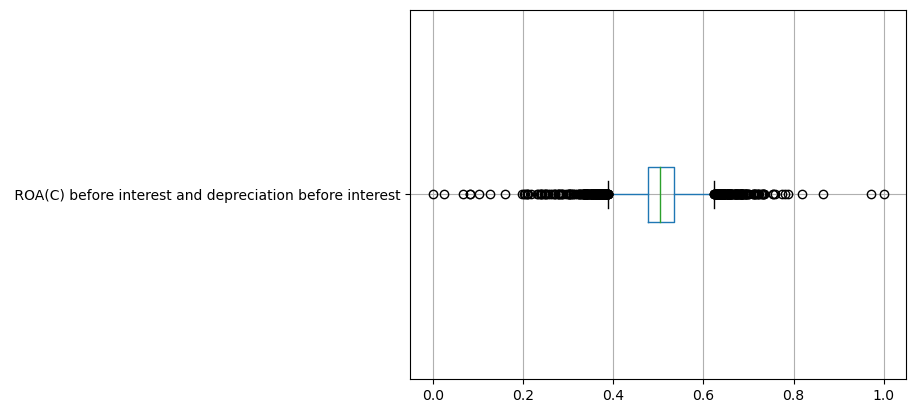

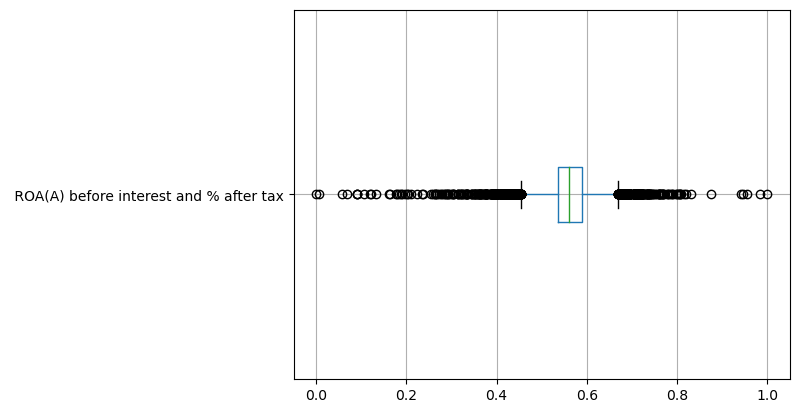

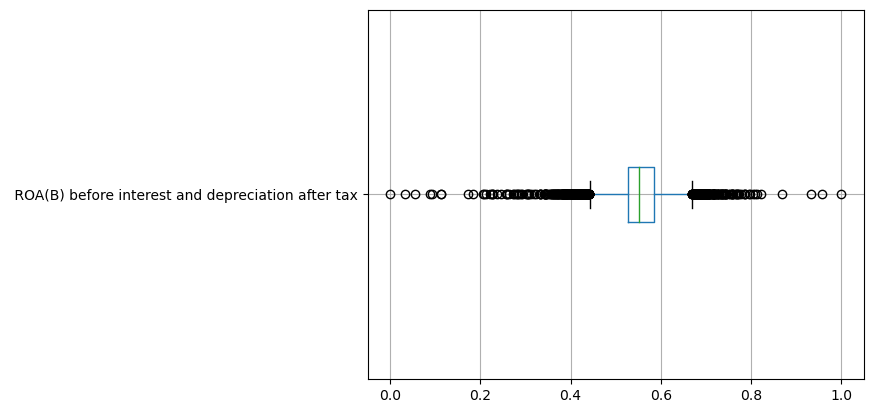

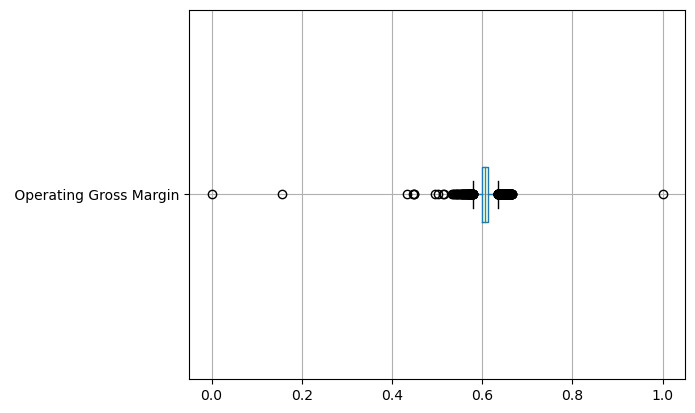

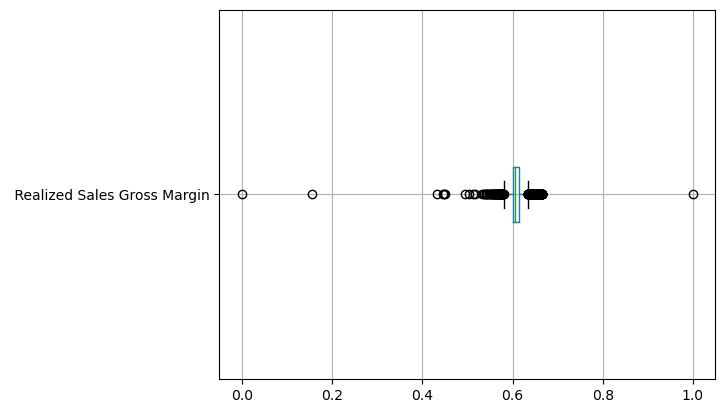

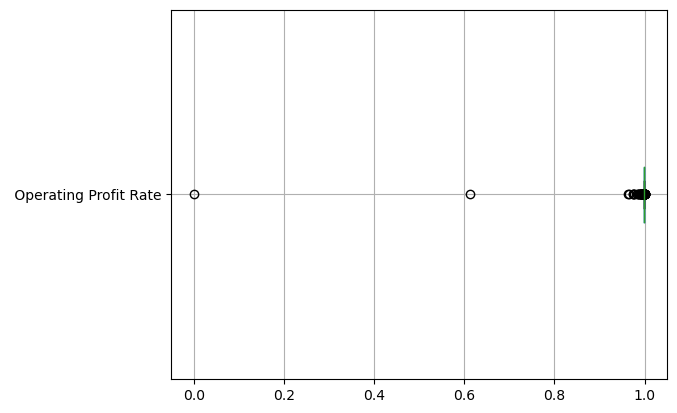

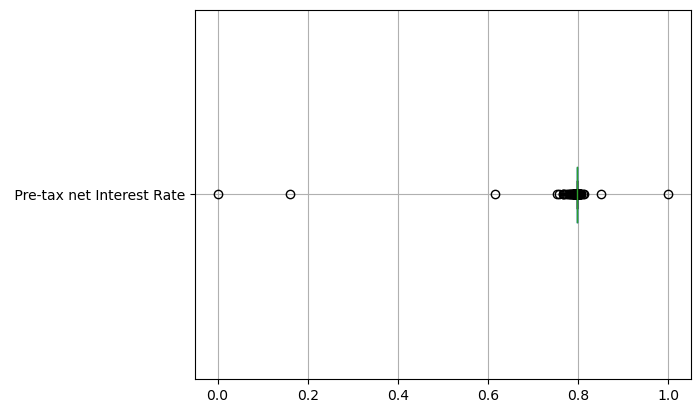

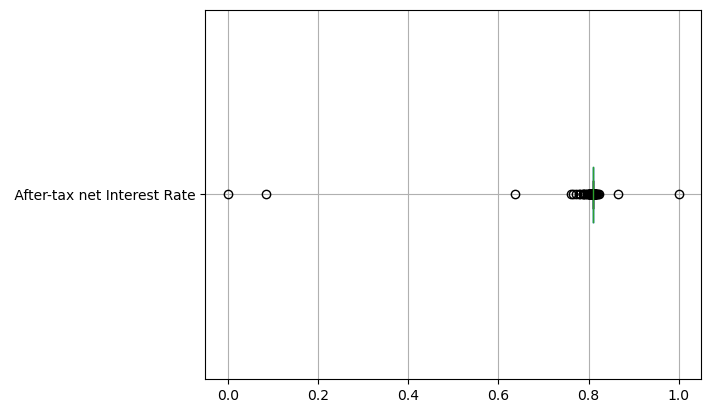

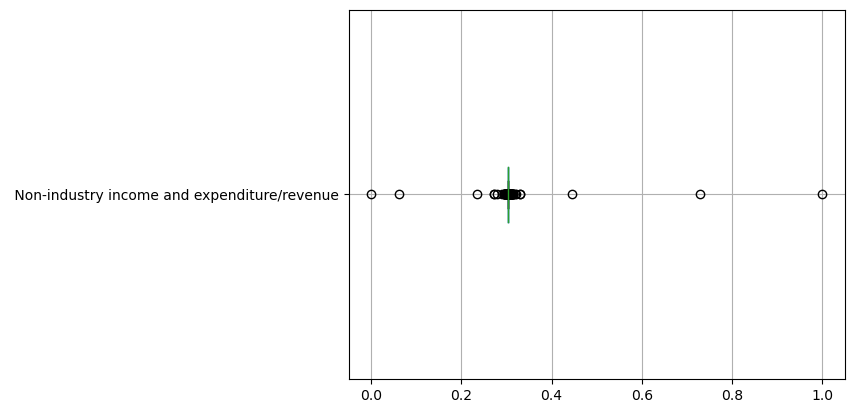

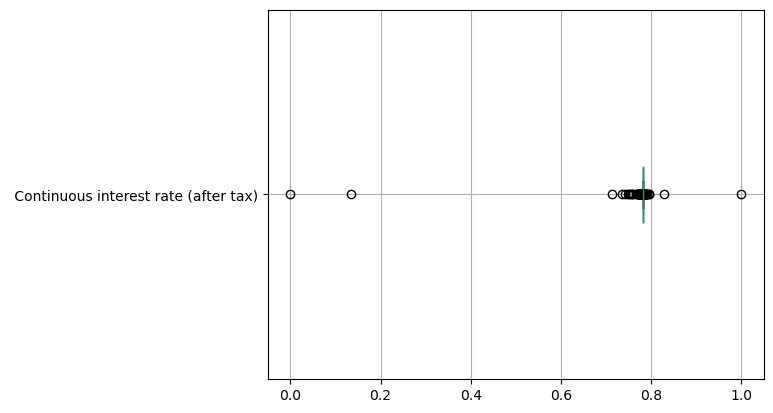

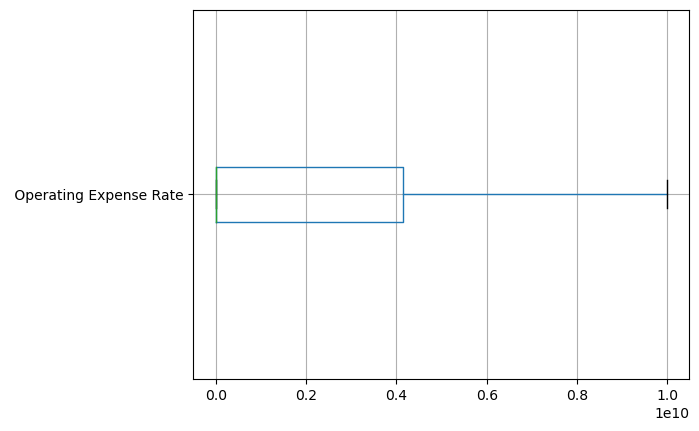

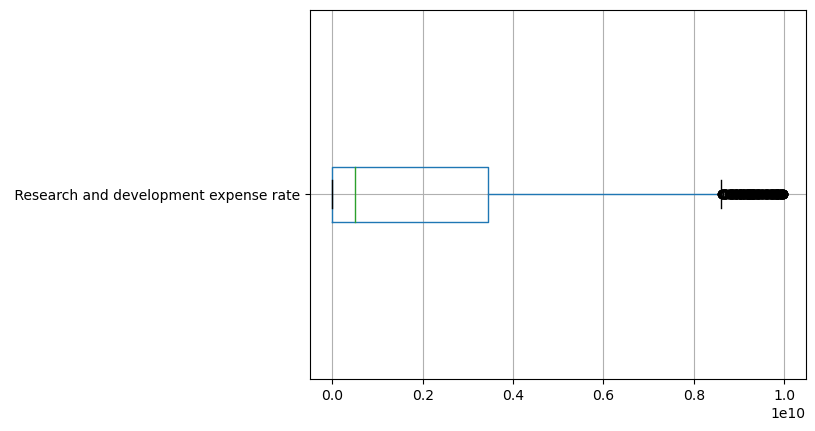

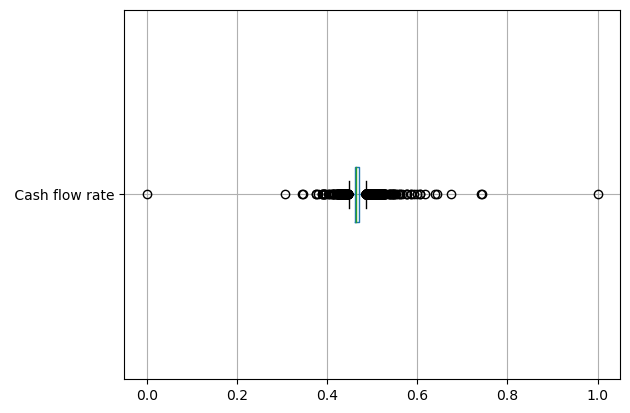

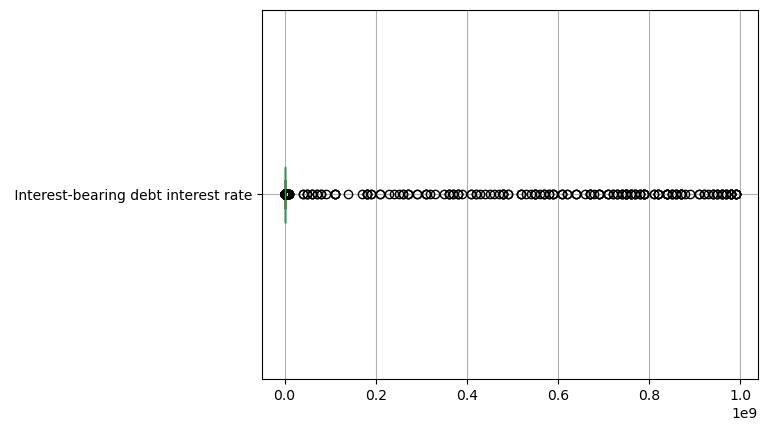

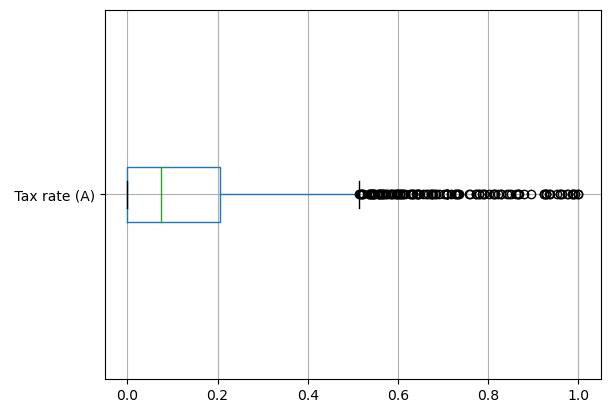

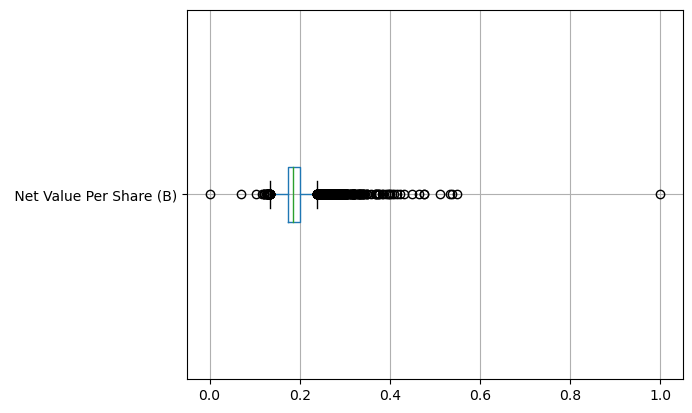

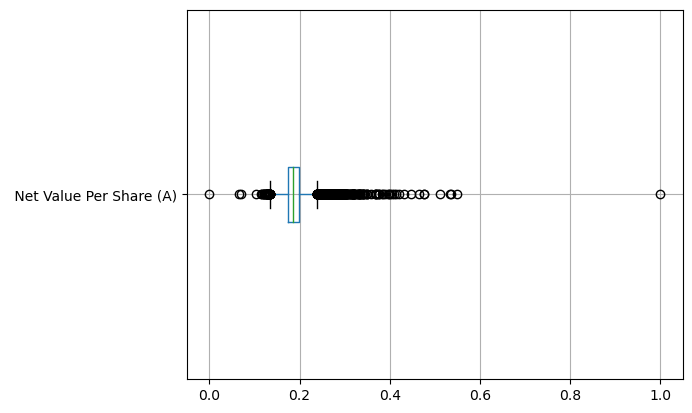

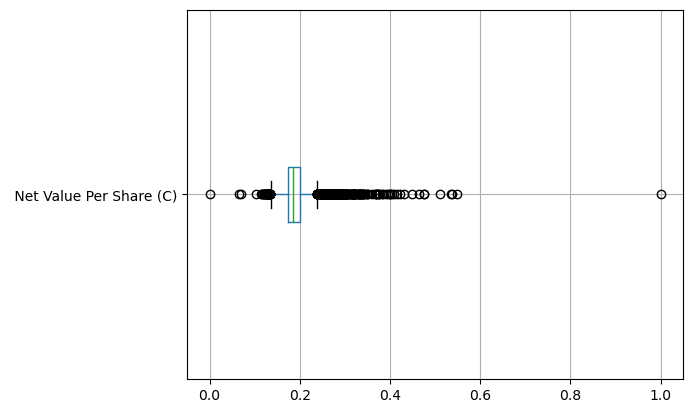

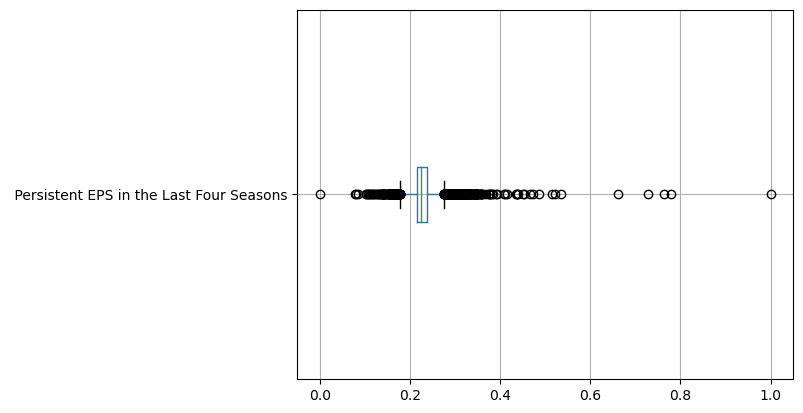

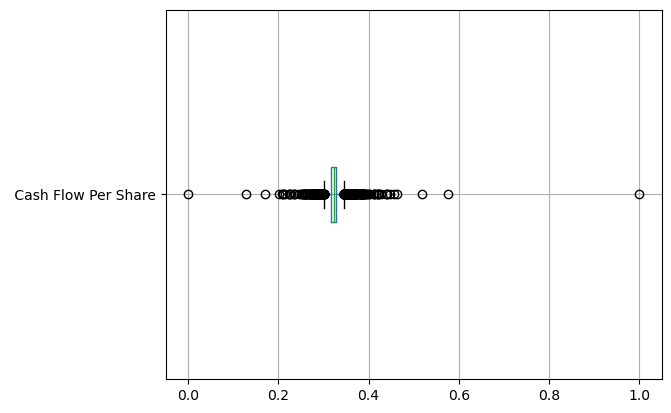

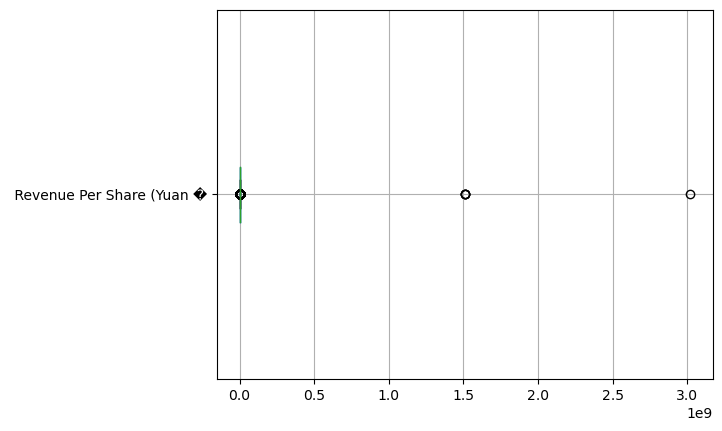

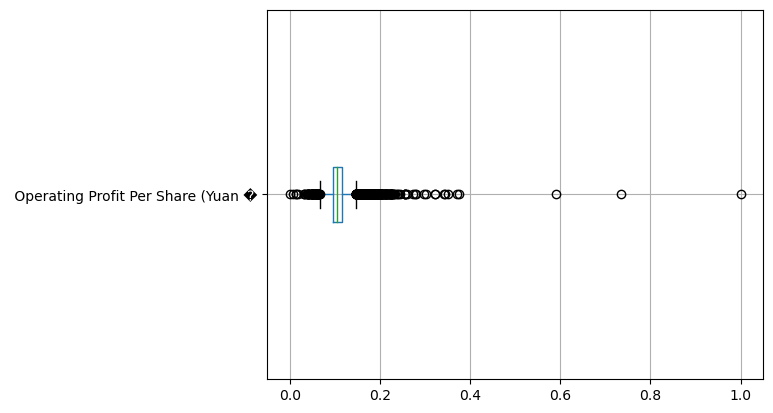

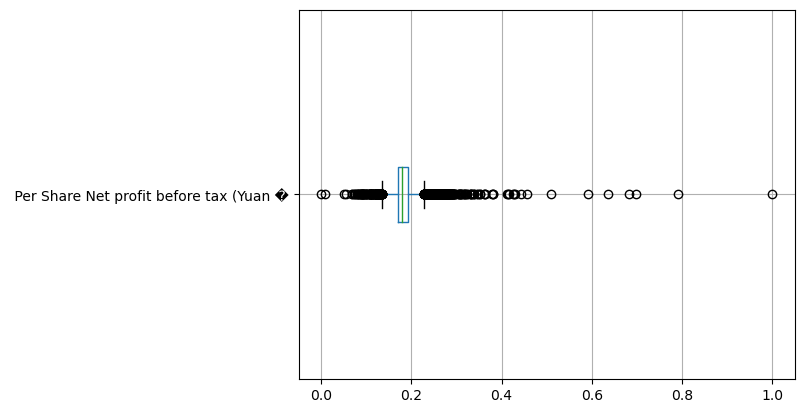

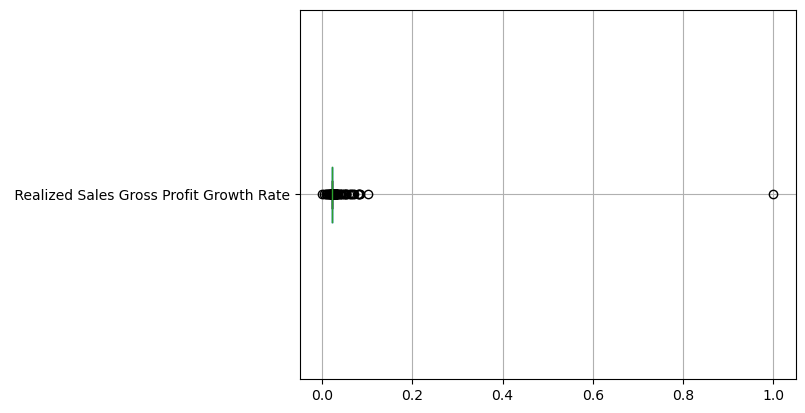

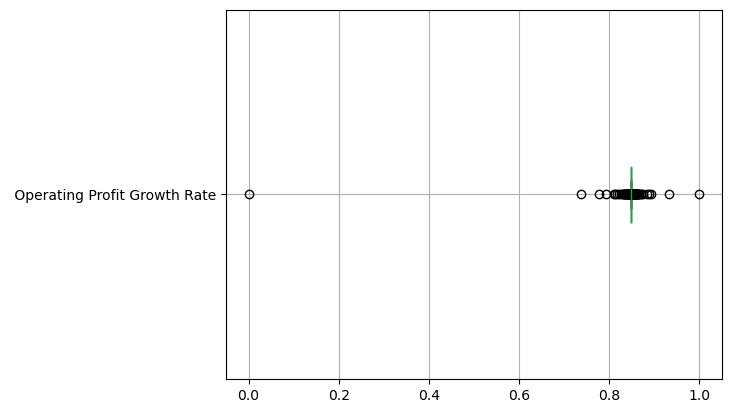

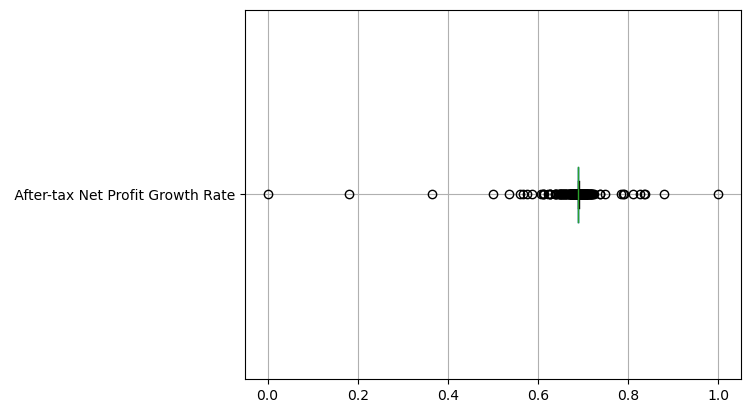

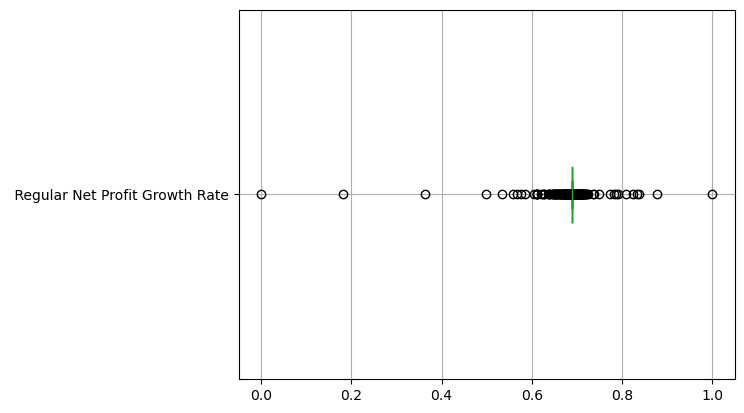

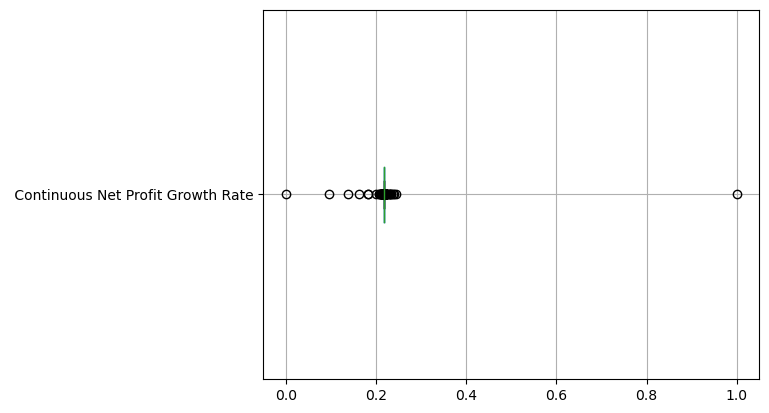

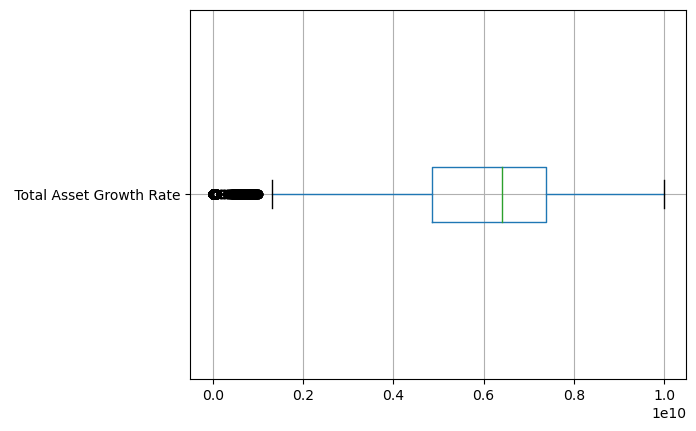

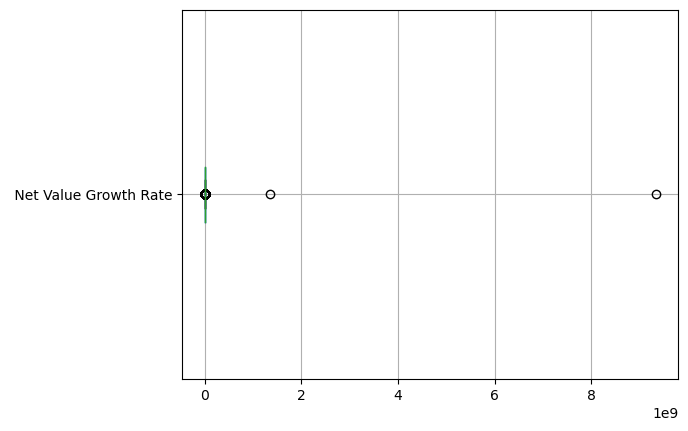

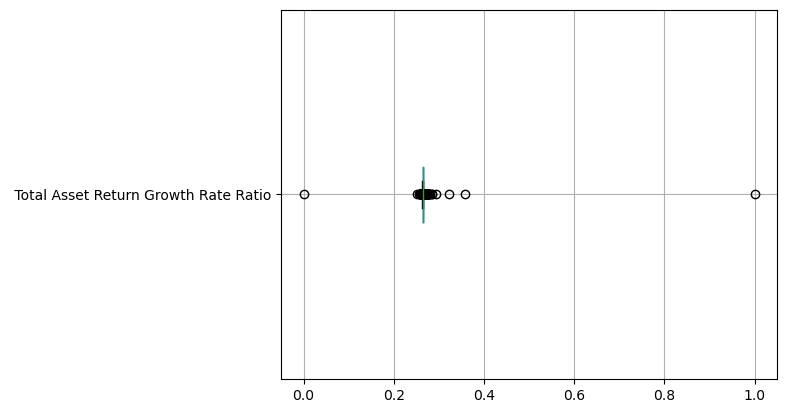

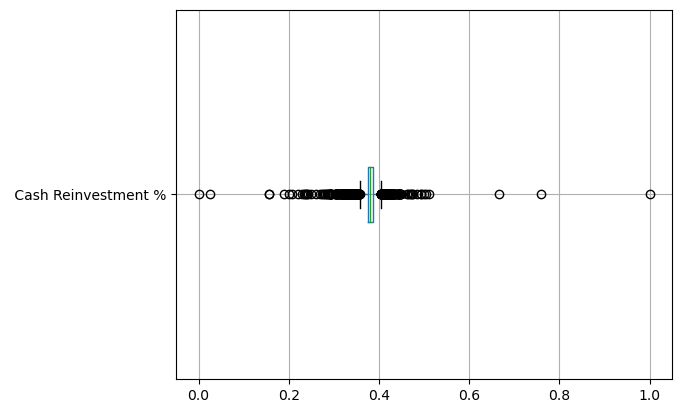

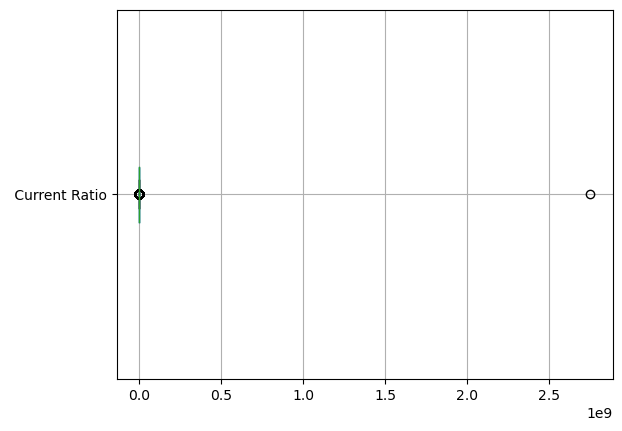

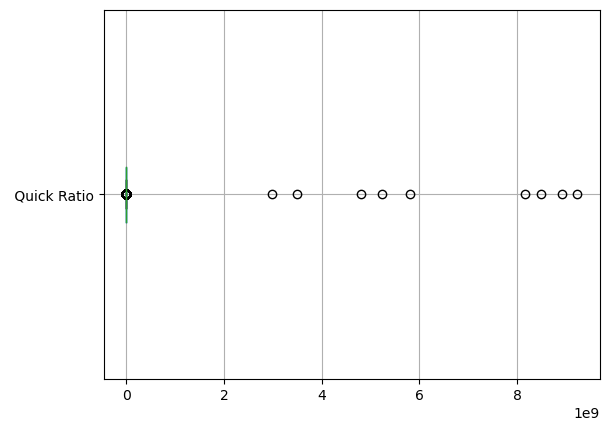

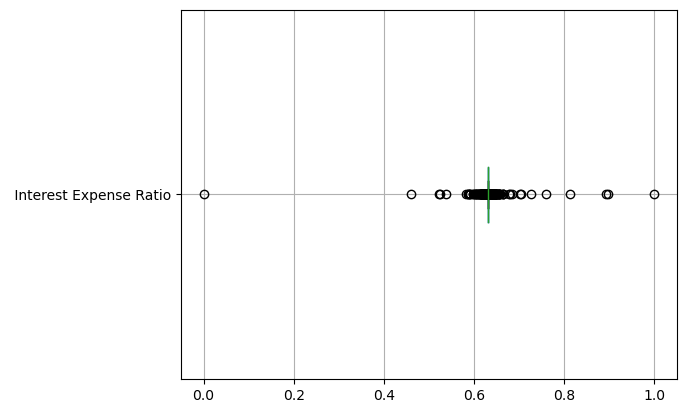

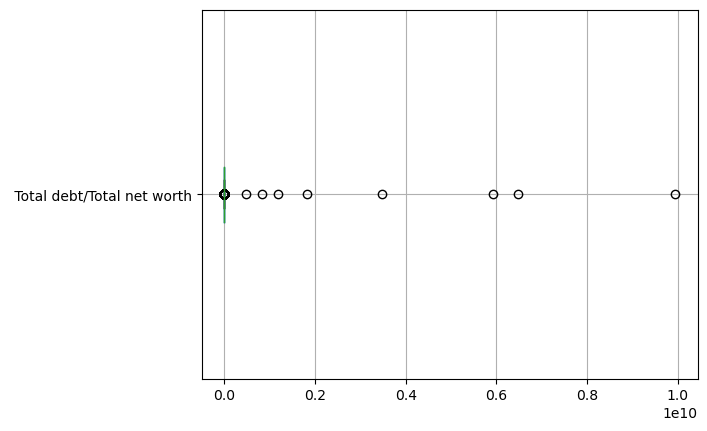

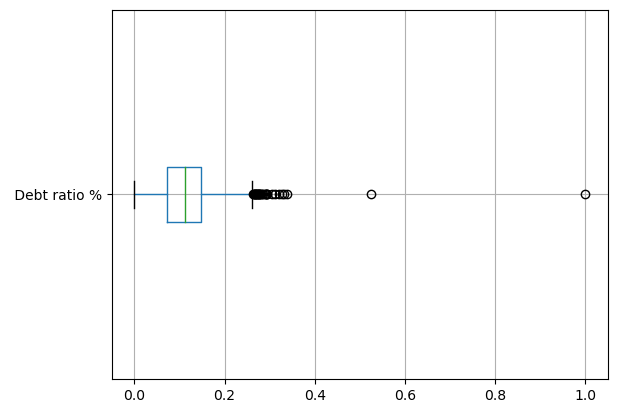

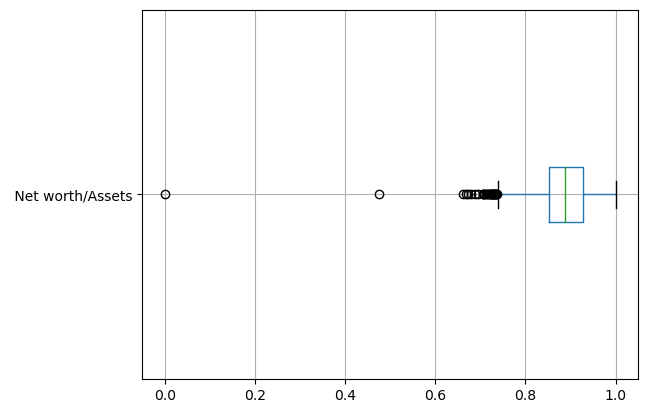

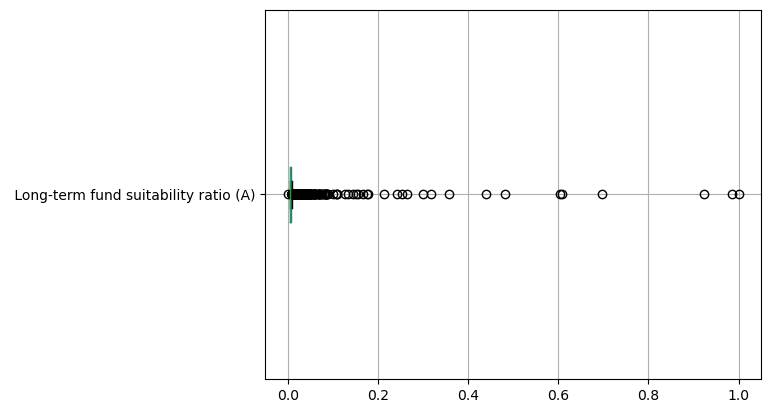

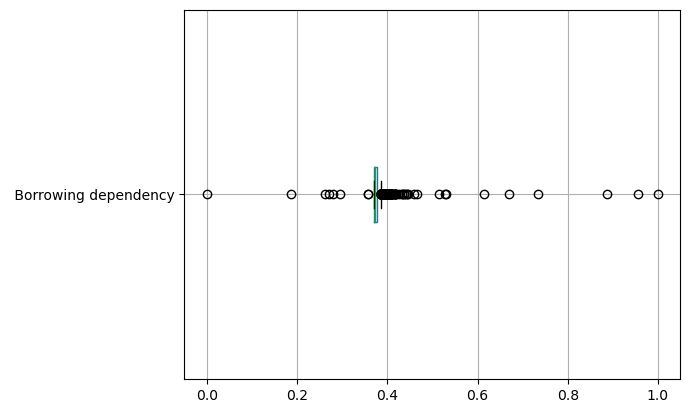

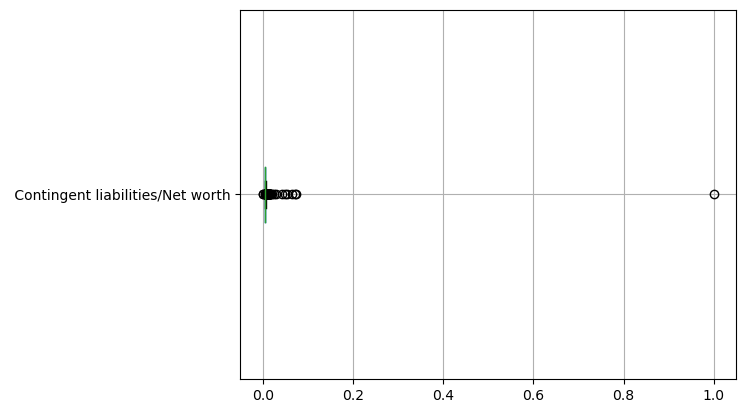

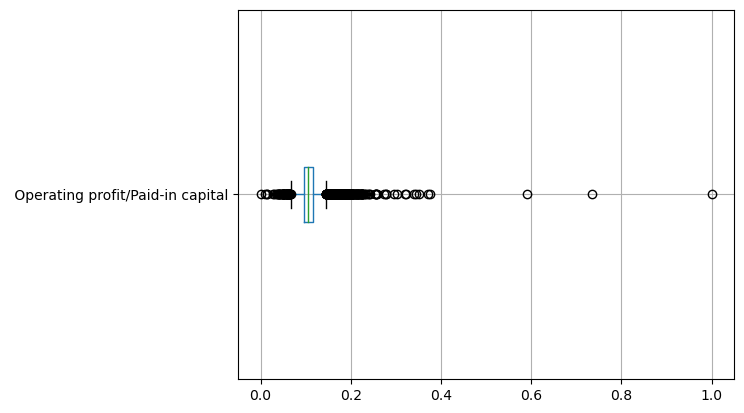

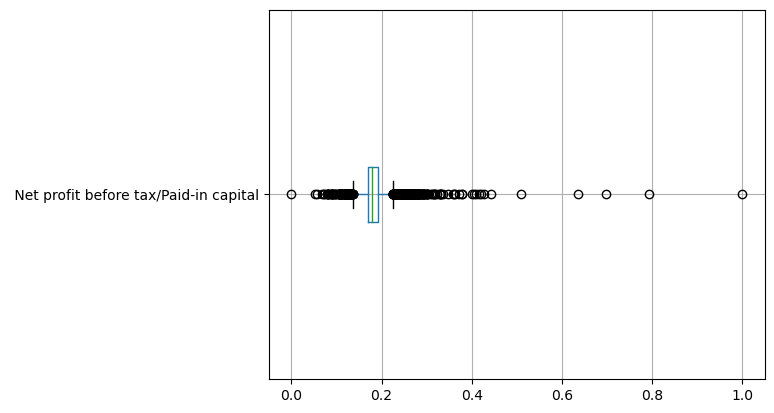

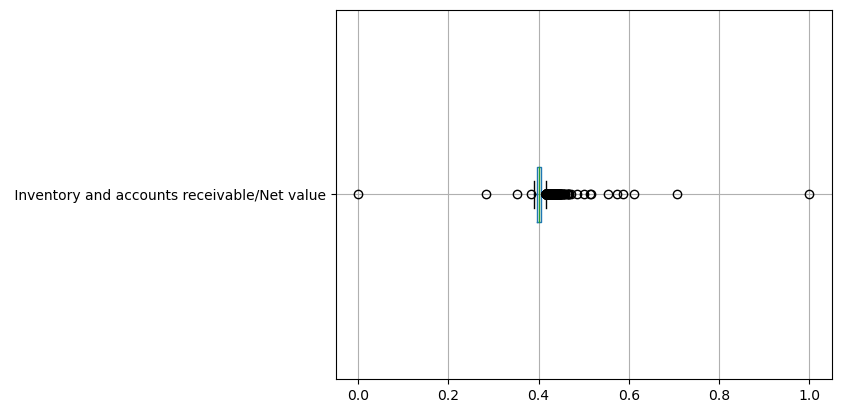

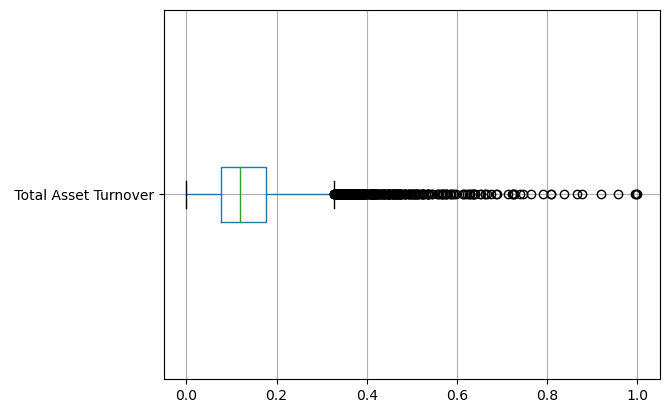

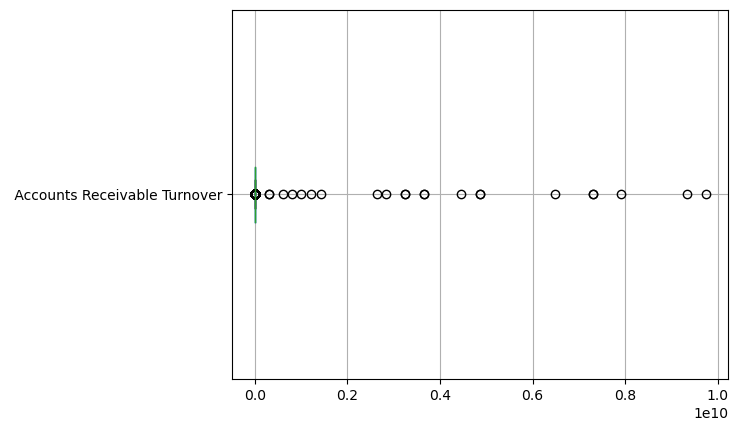

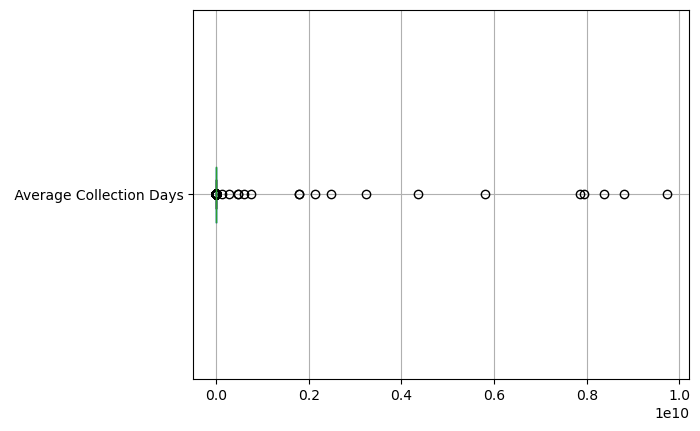

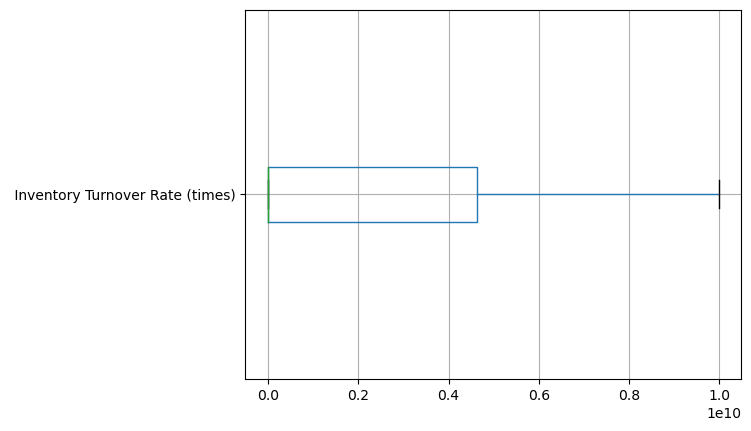

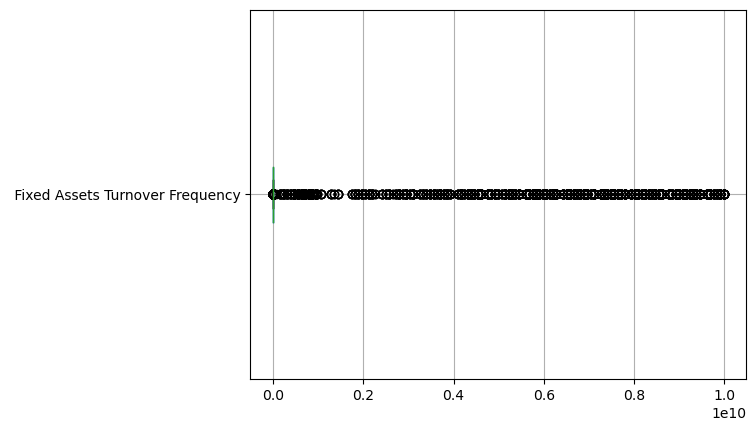

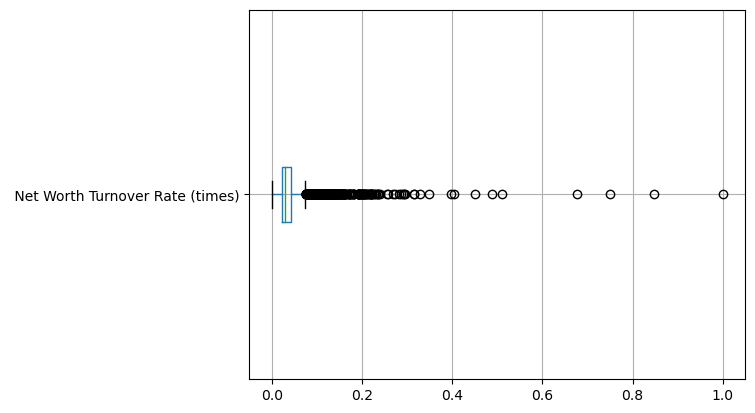

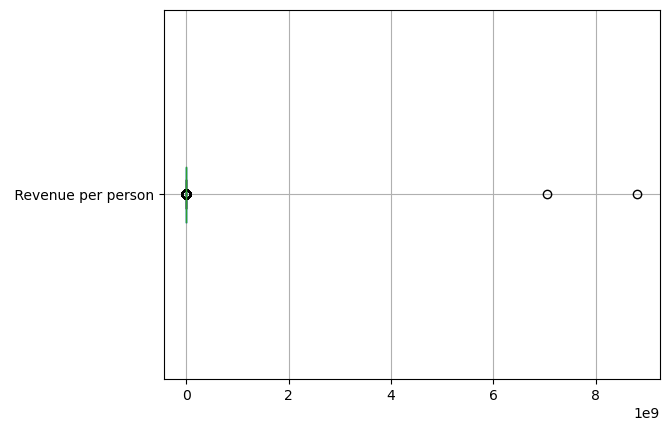

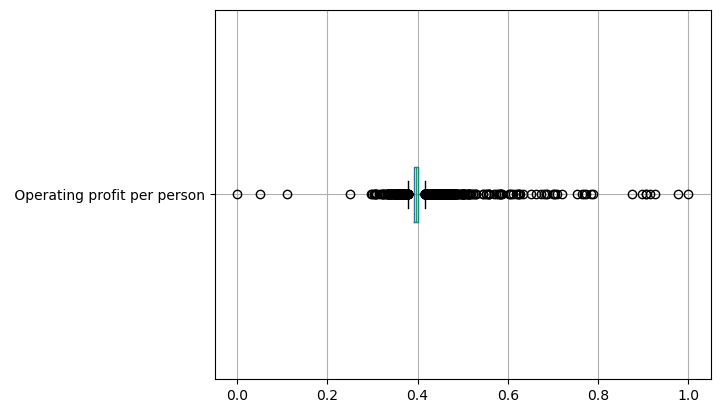

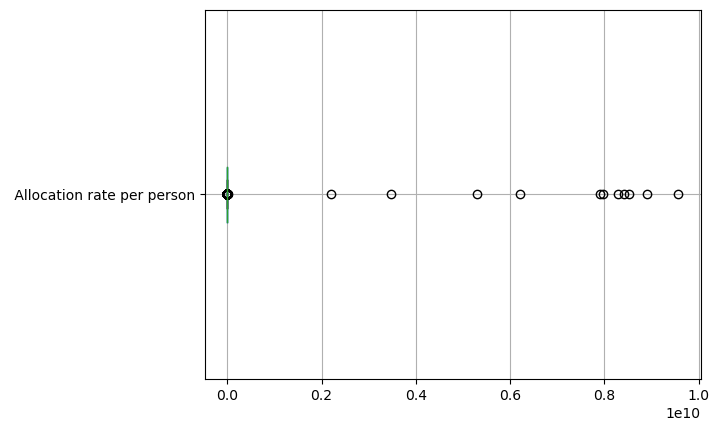

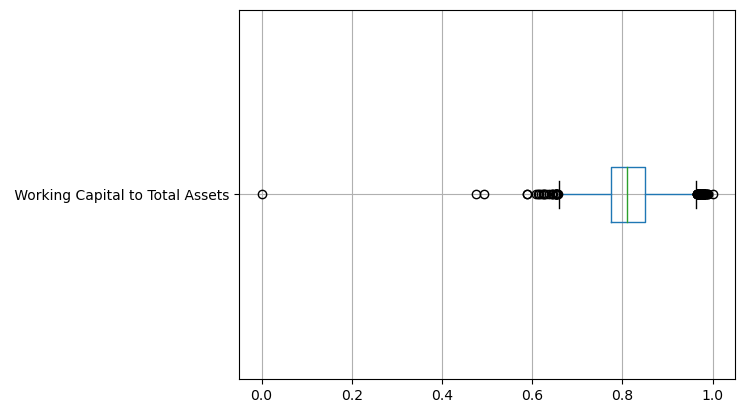

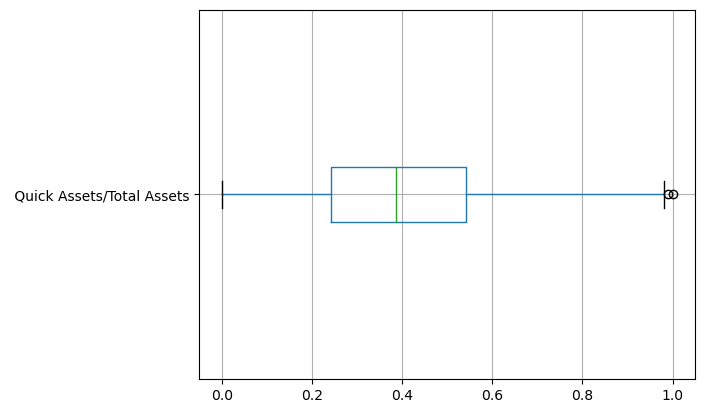

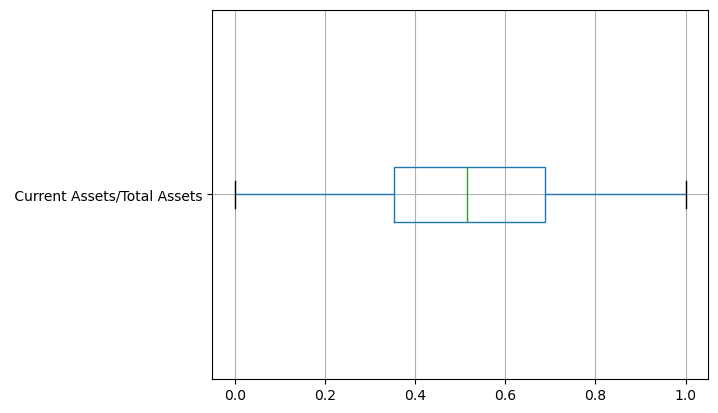

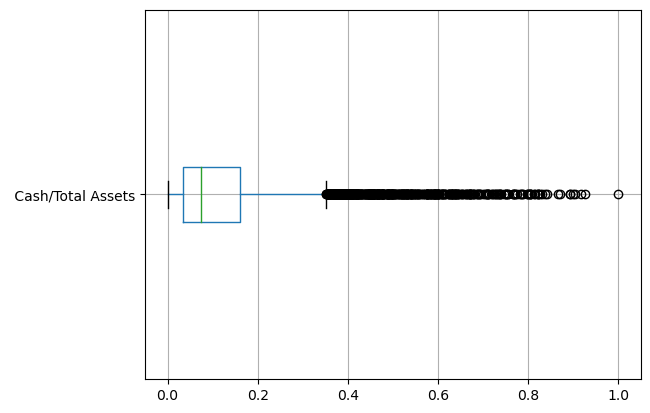

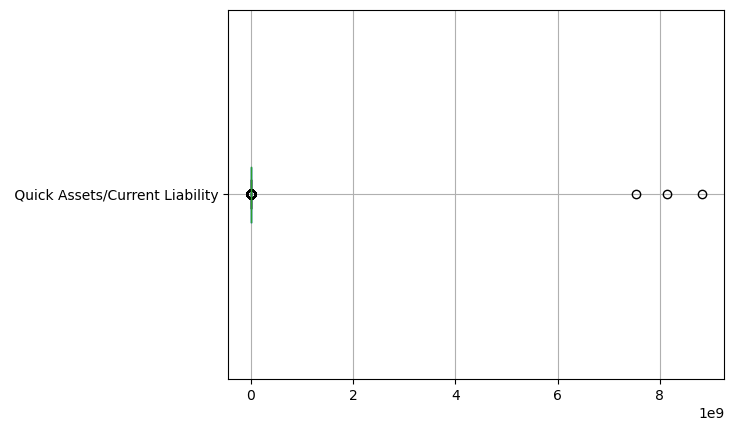

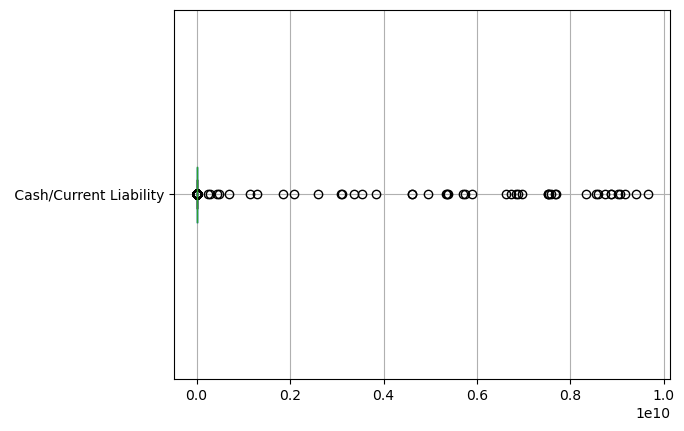

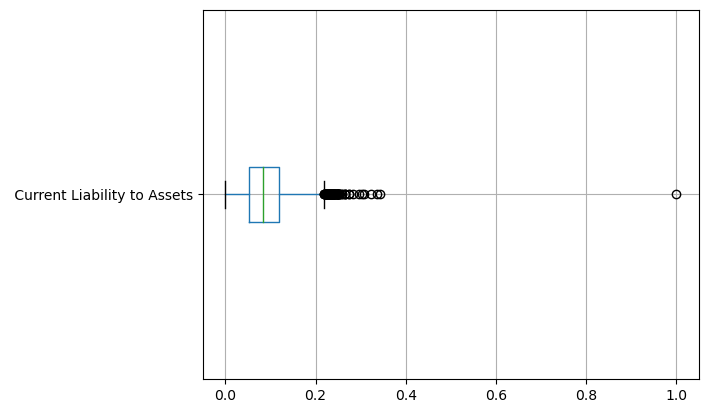

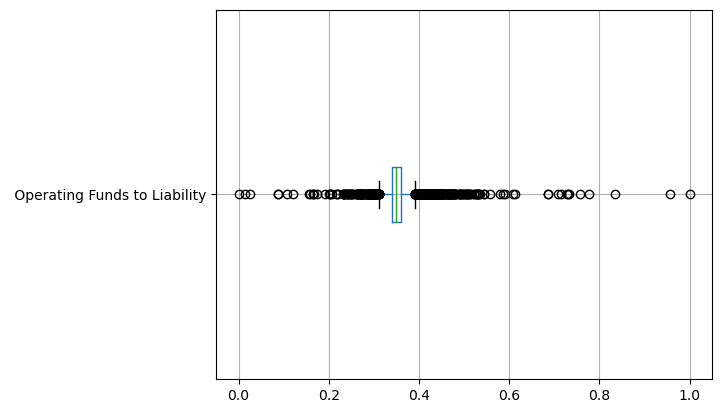

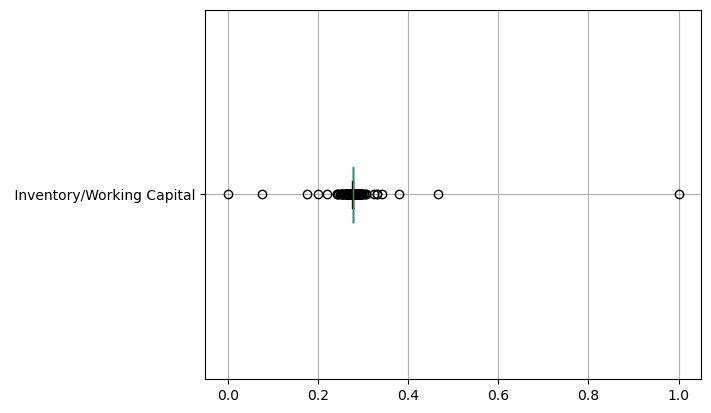

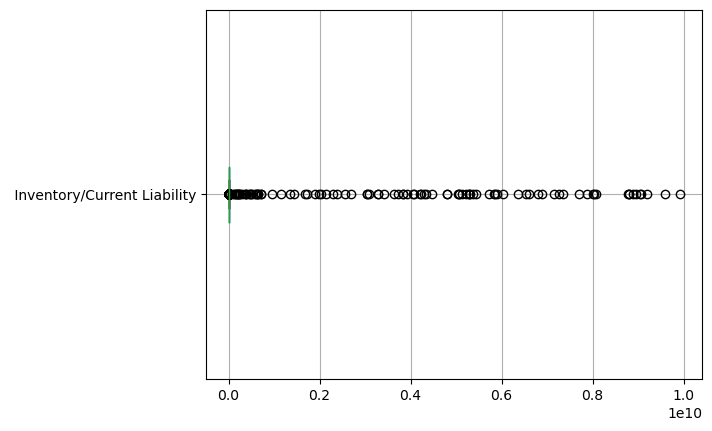

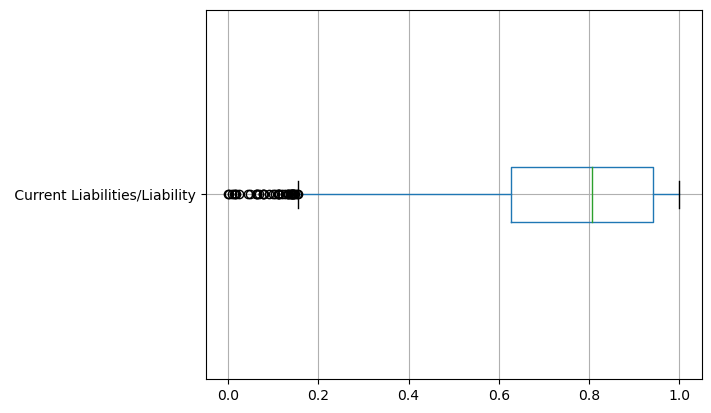

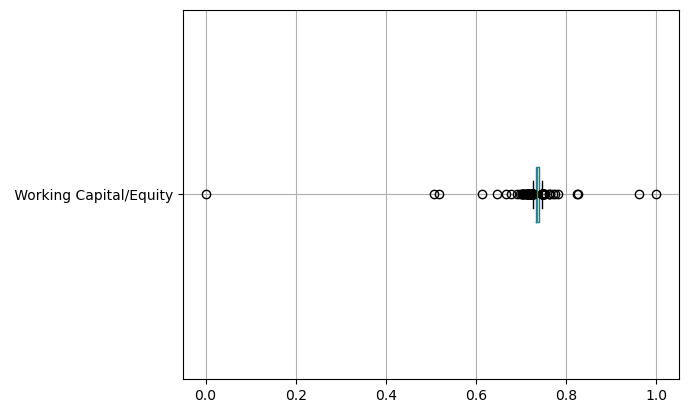

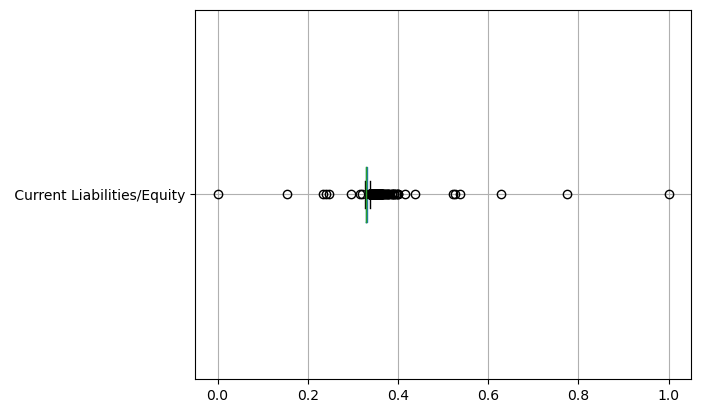

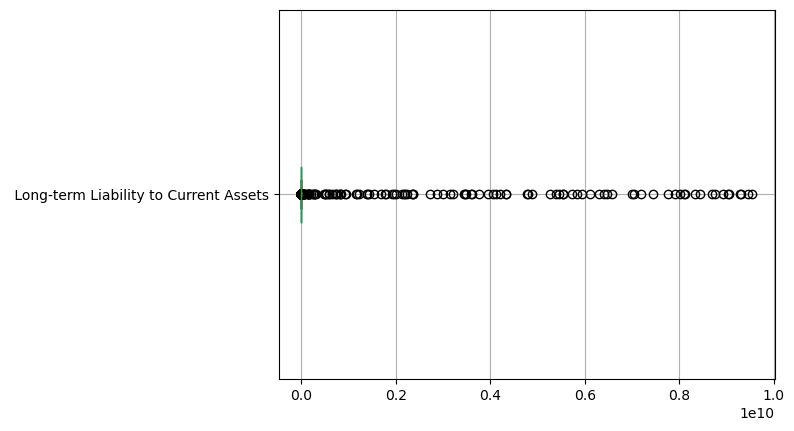

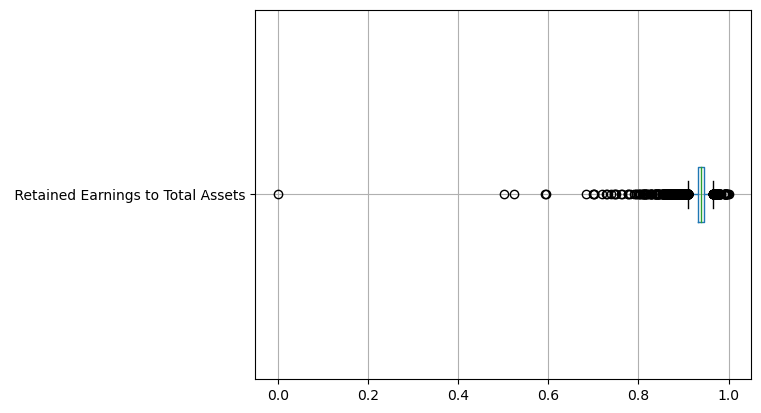

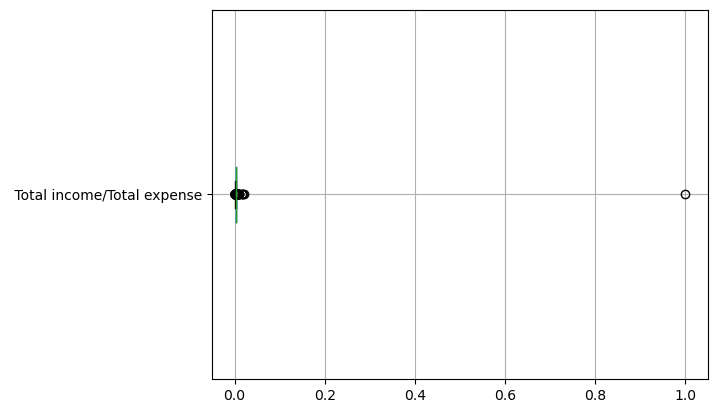

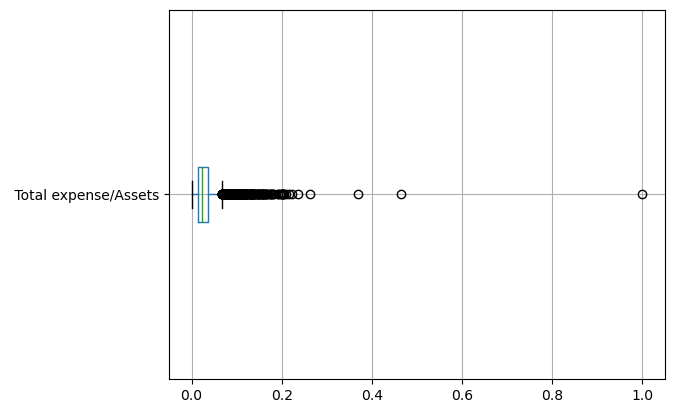

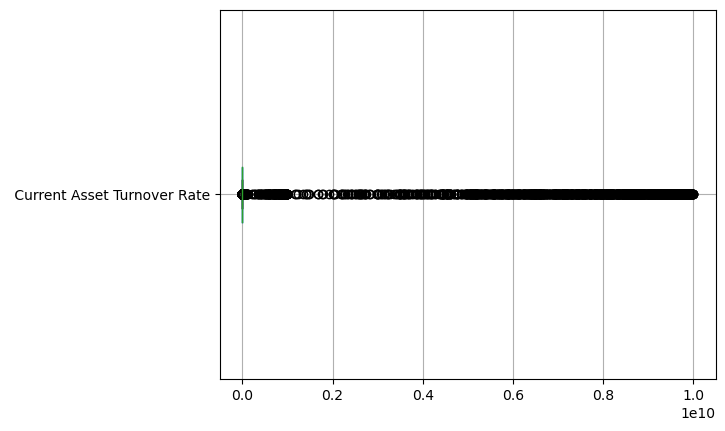

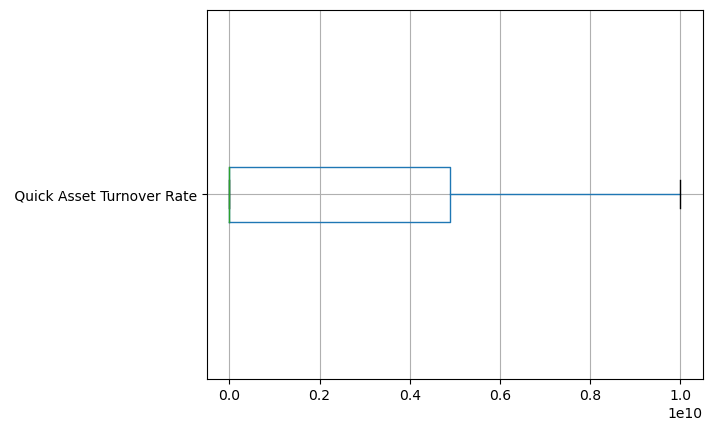

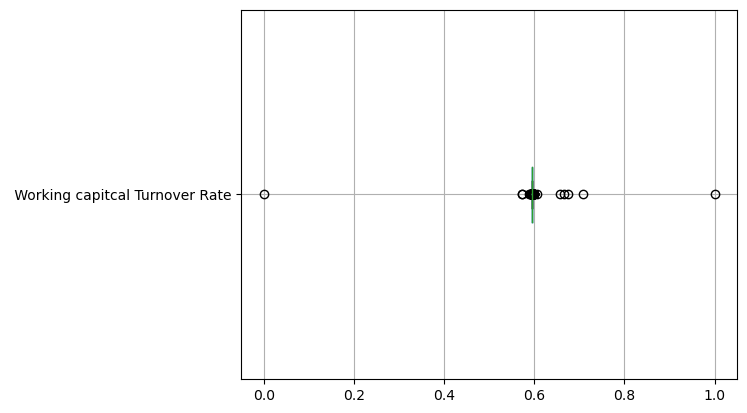

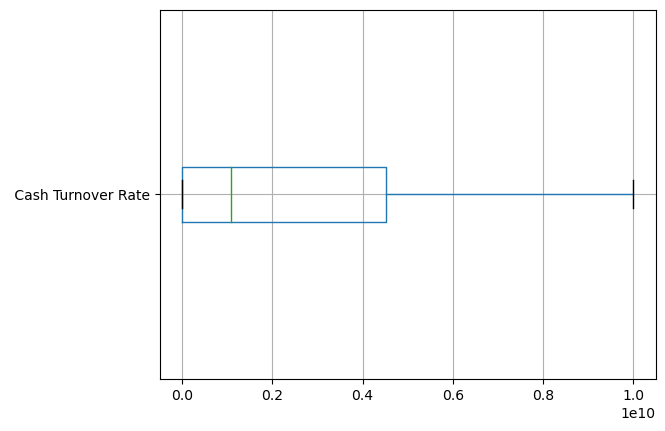

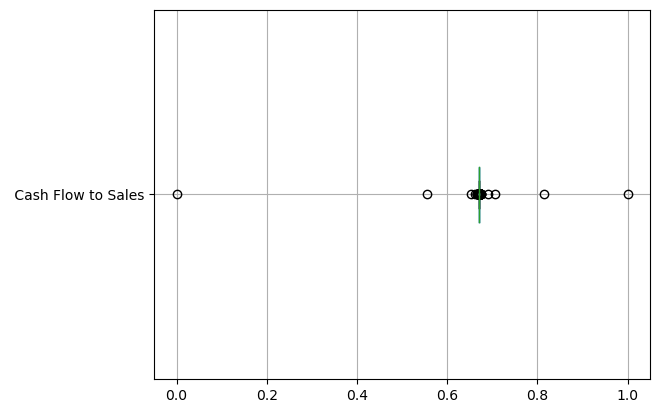

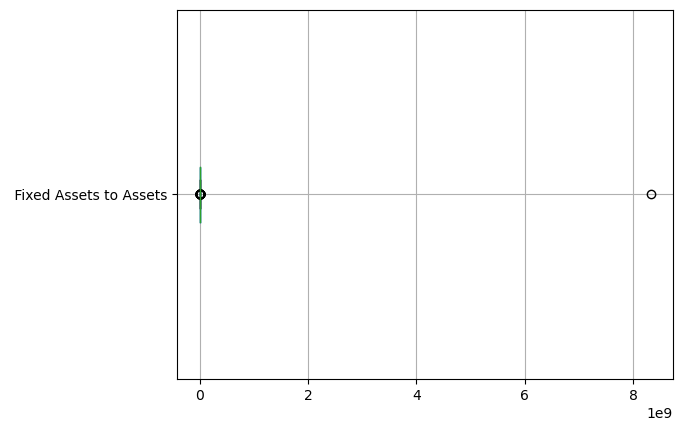

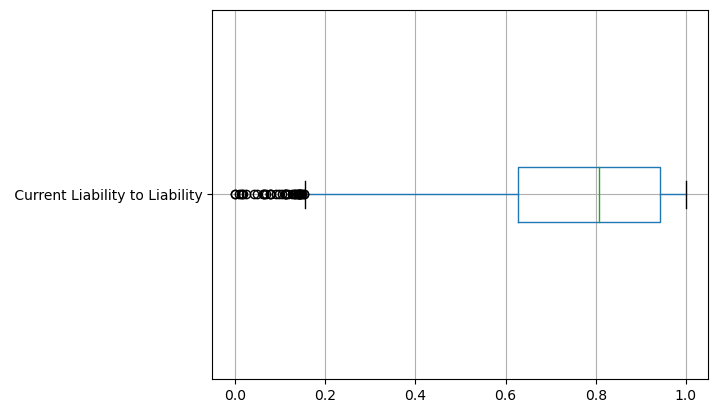

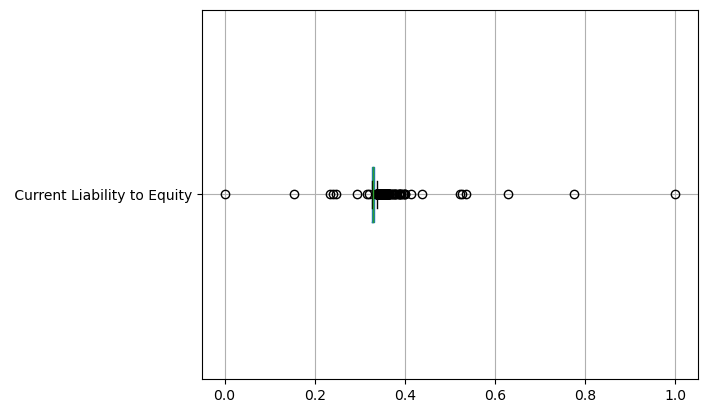

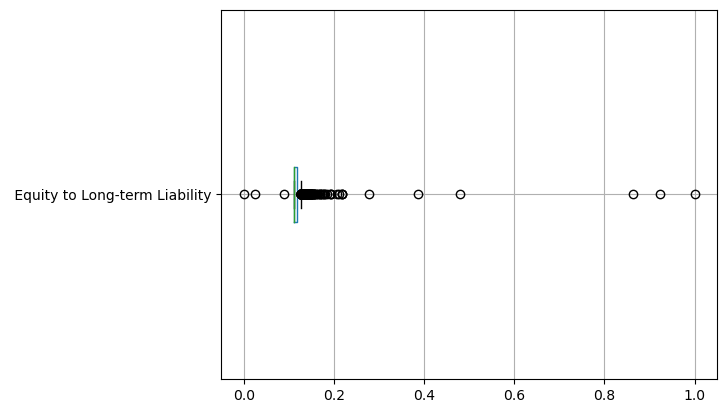

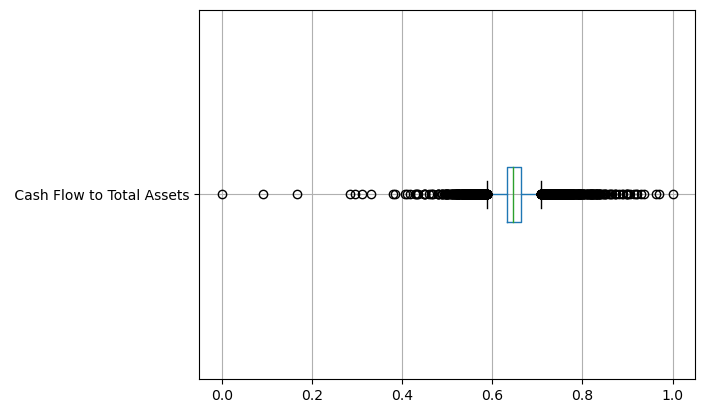

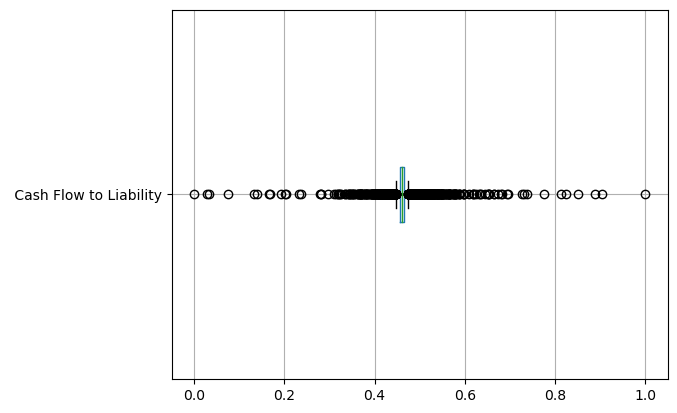

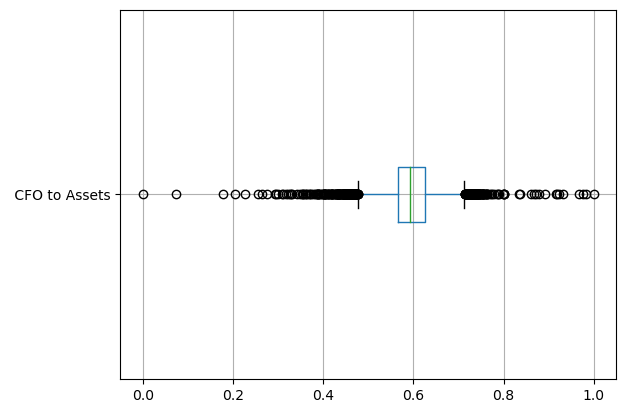

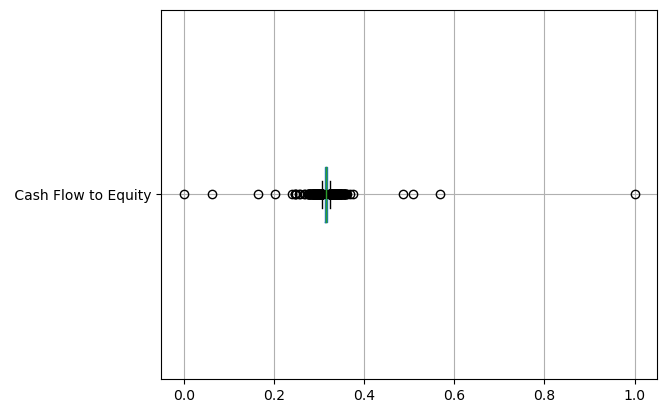

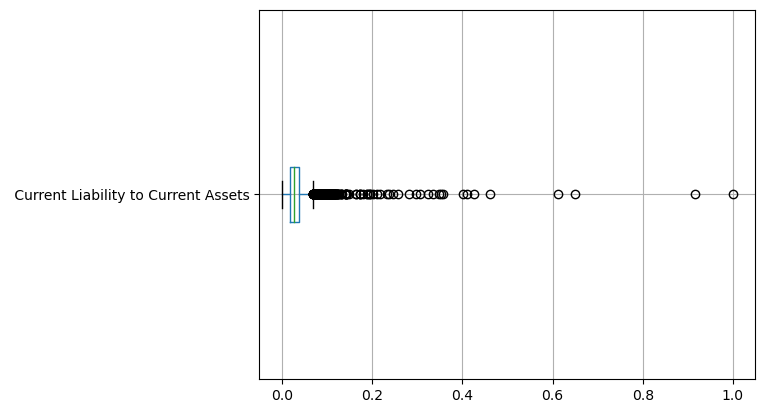

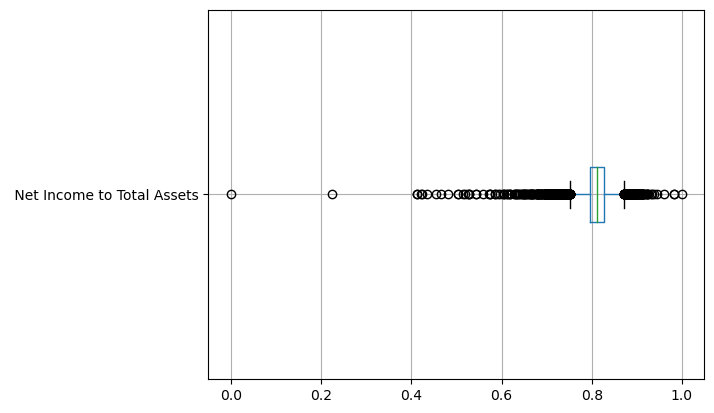

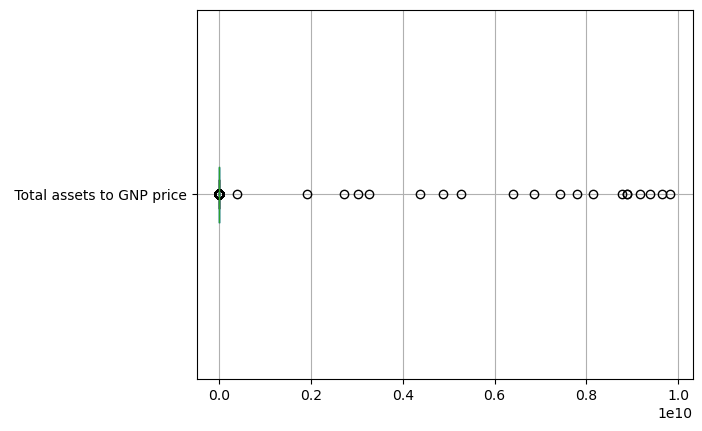

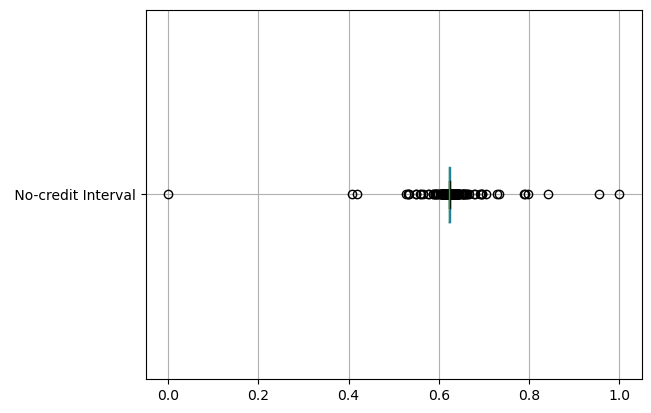

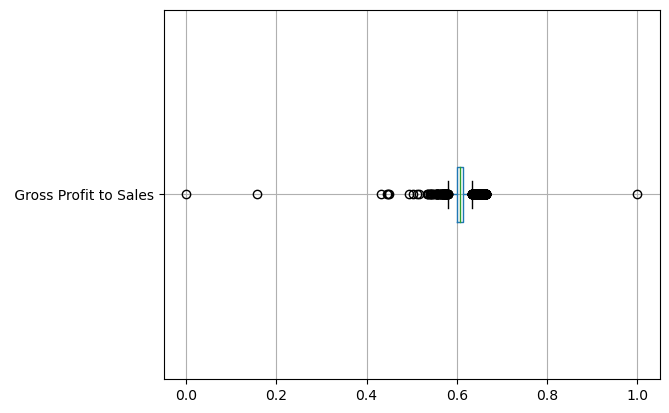

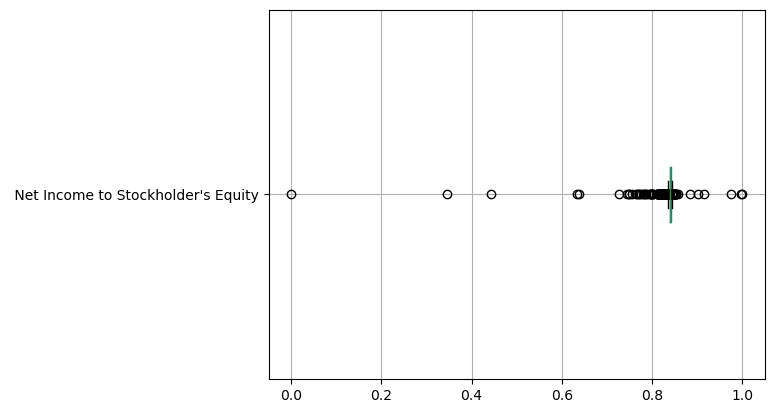

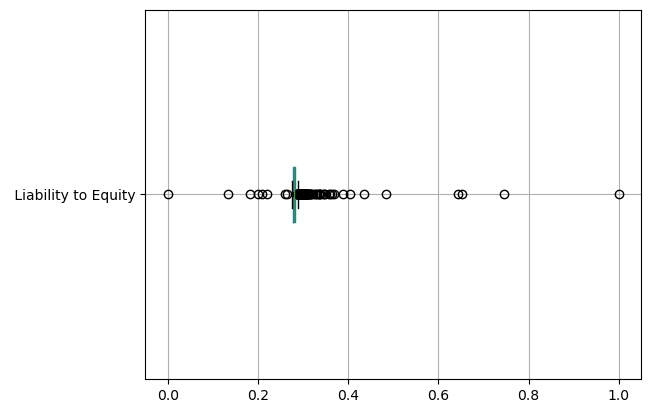

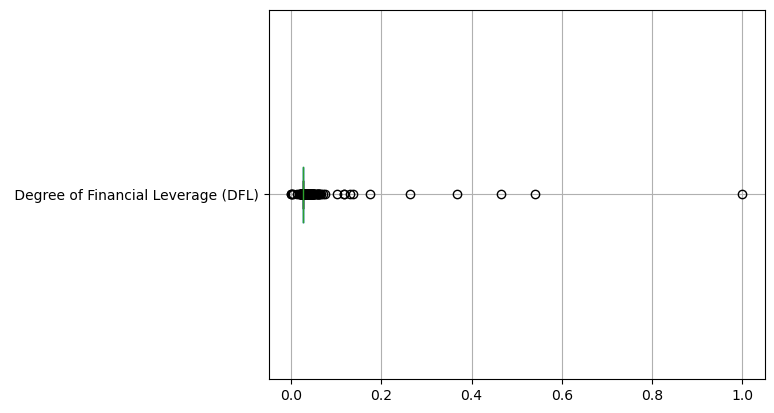

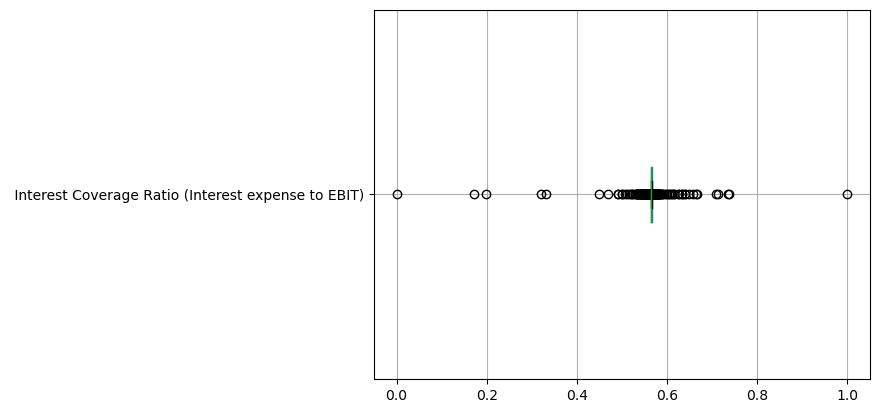

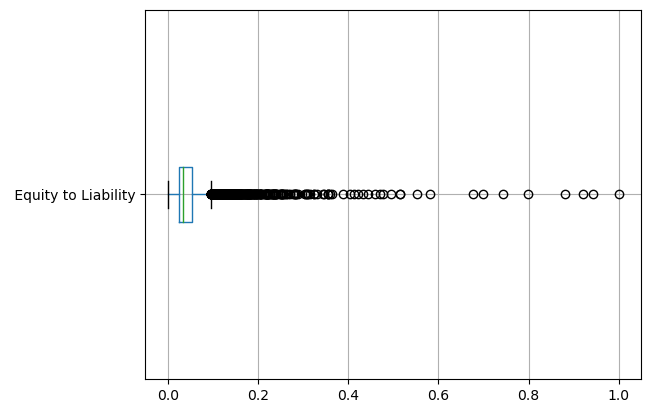

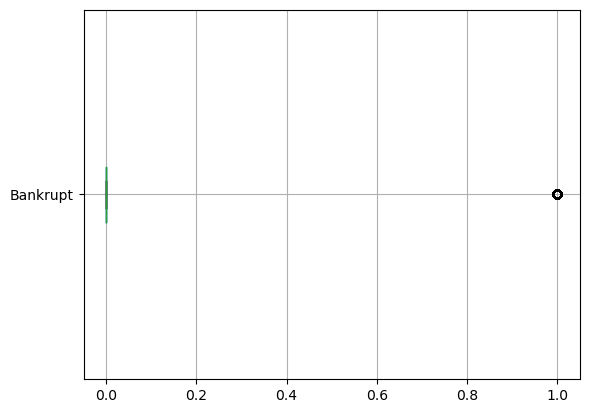

In [19]:
def box_plot(df,feature):
    df.boxplot(column=[feature],vert=0)
    plt.show()
    
for i in range(0,dataset.shape[1]):
    box_plot(dataset,features[i])


## Histogram plot

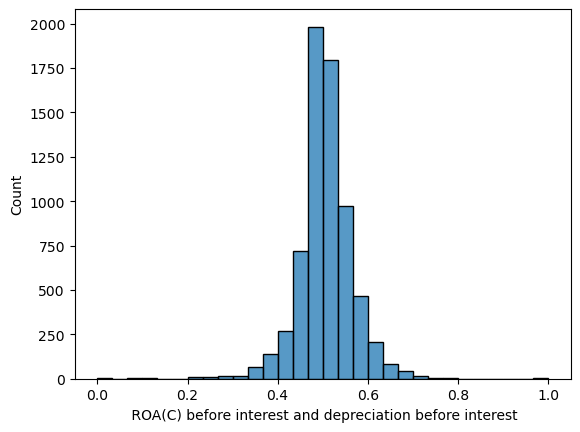

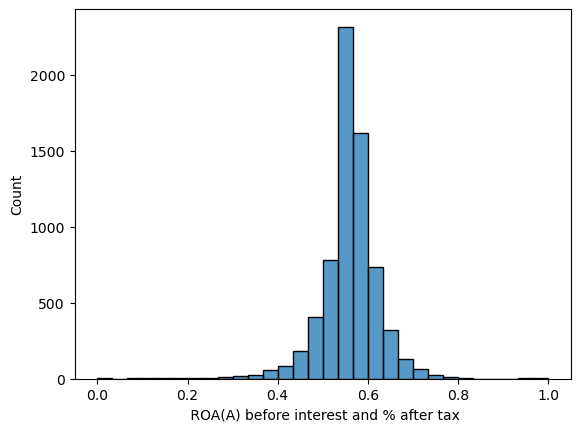

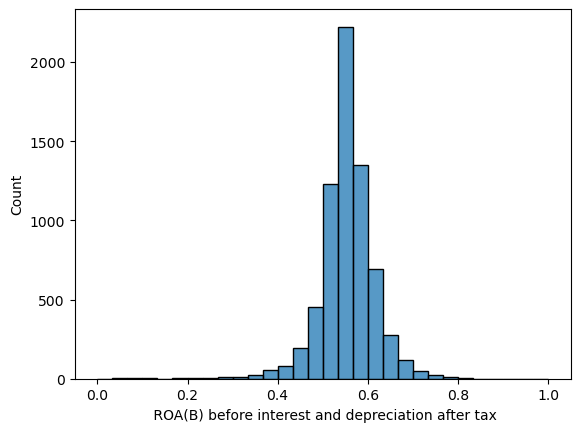

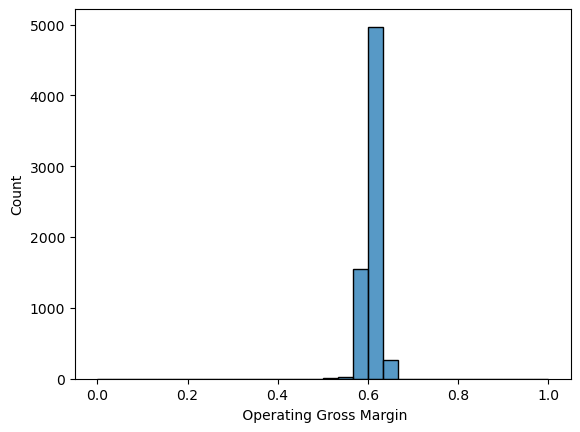

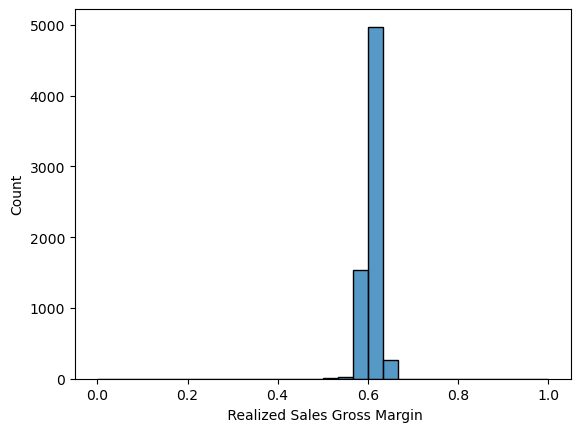

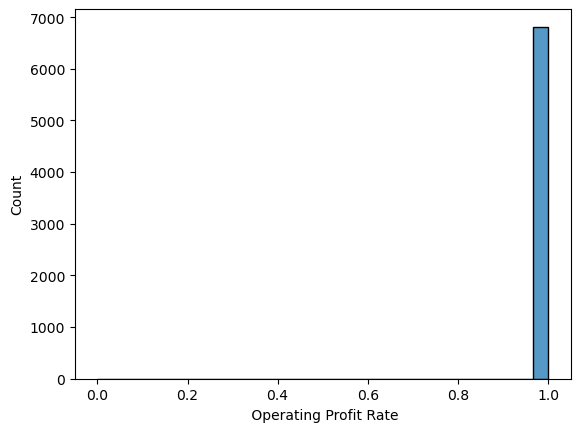

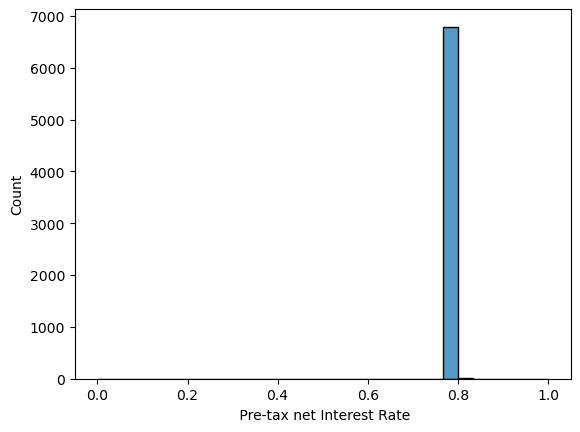

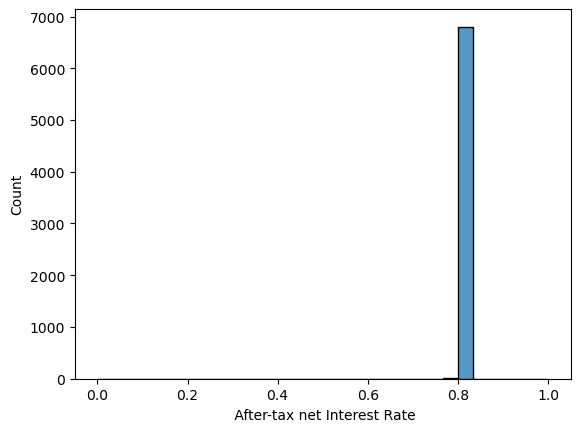

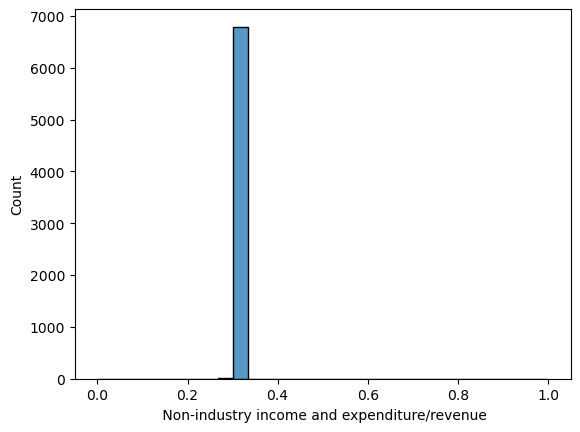

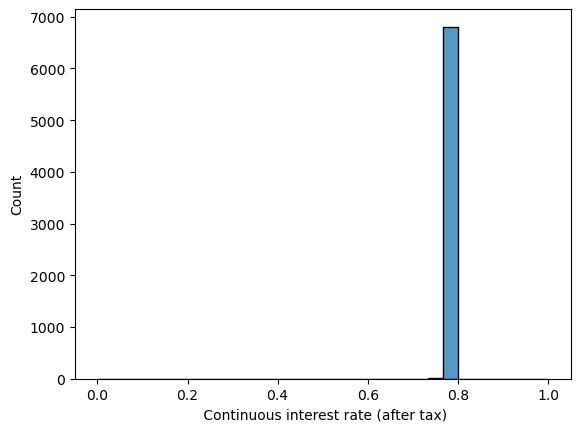

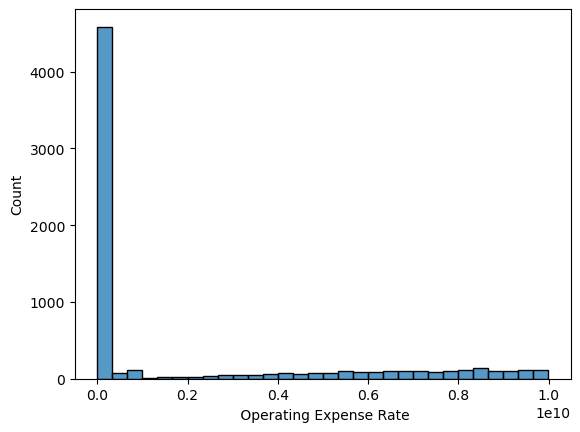

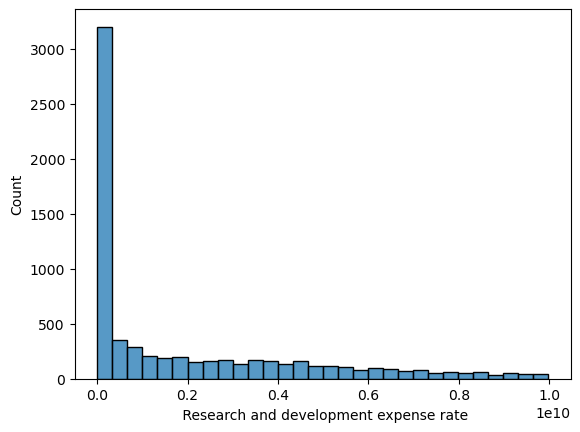

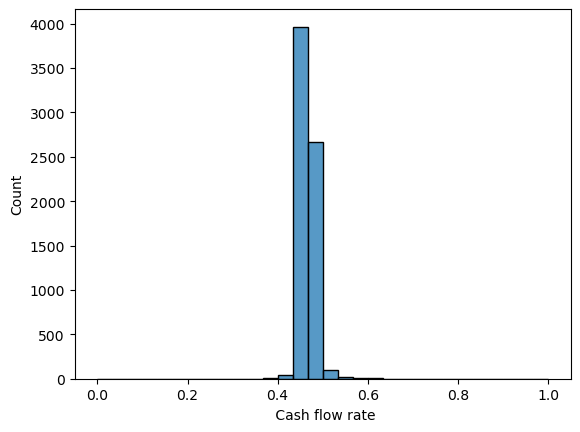

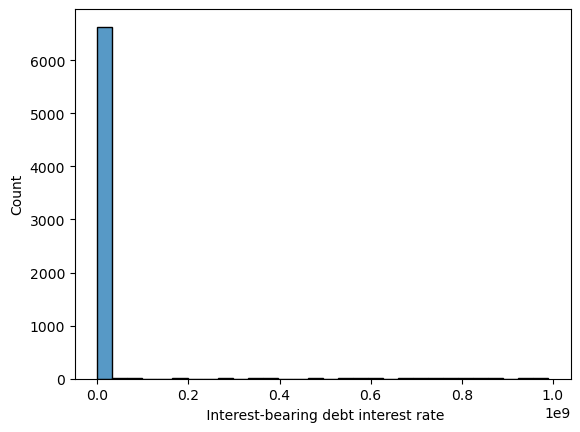

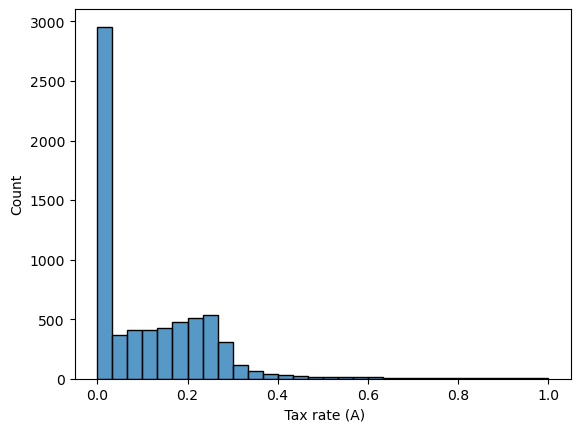

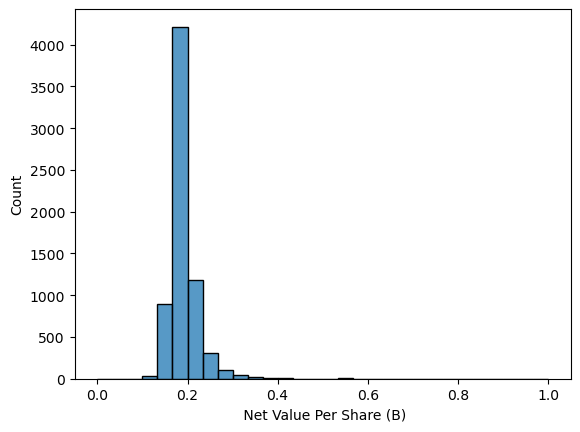

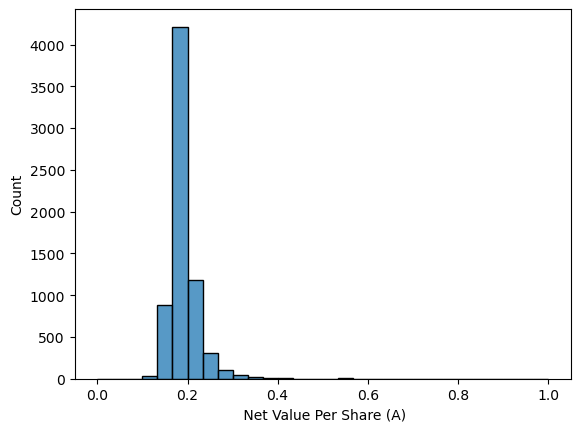

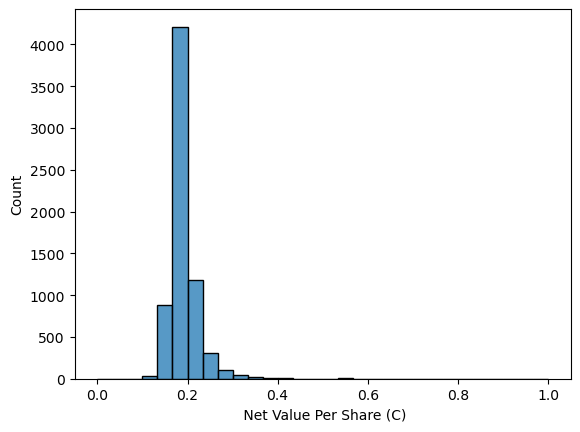

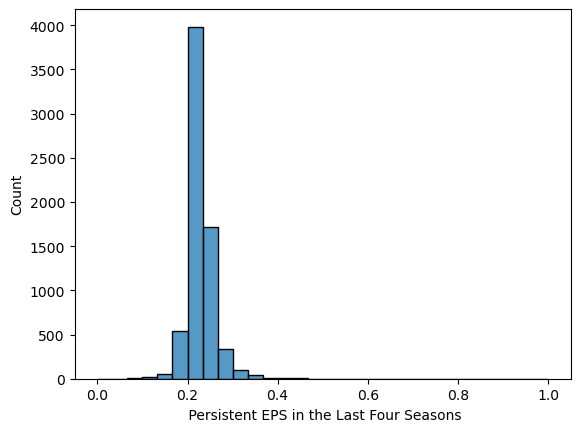

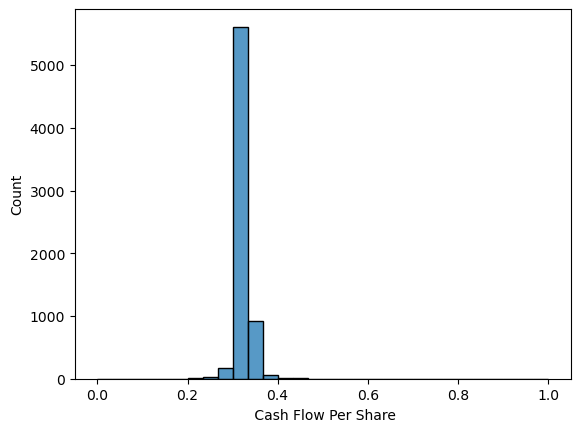

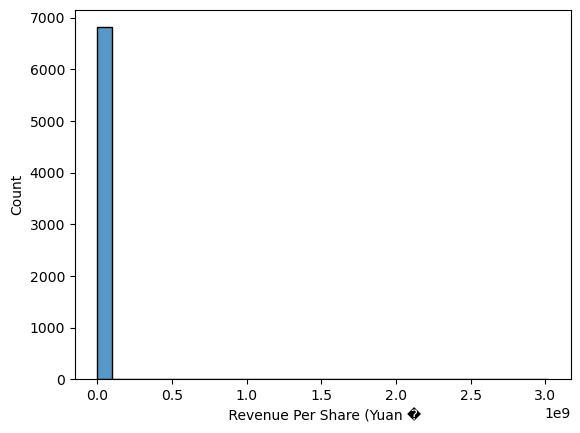

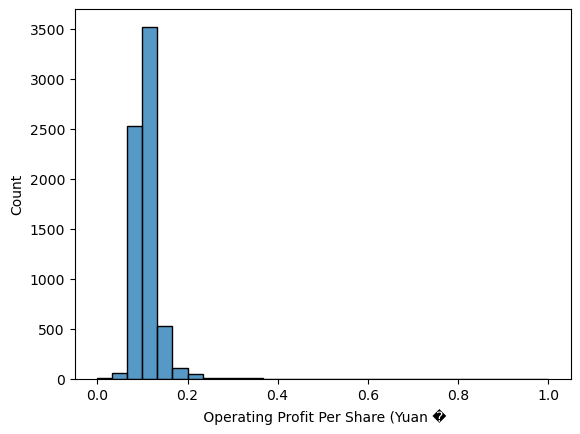

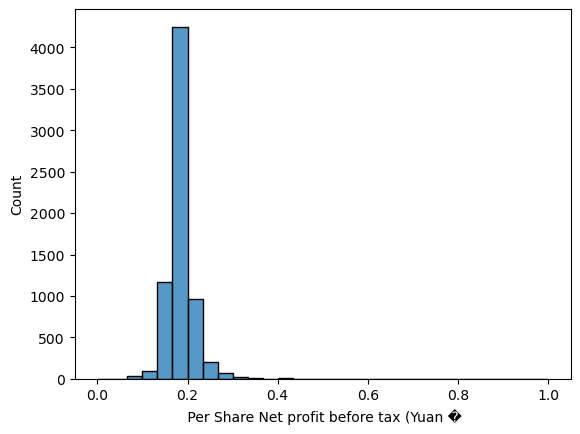

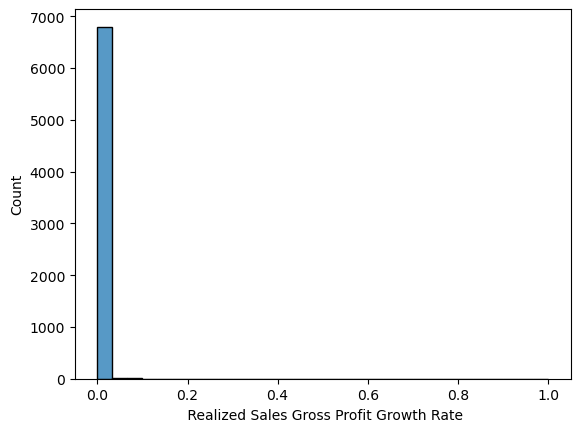

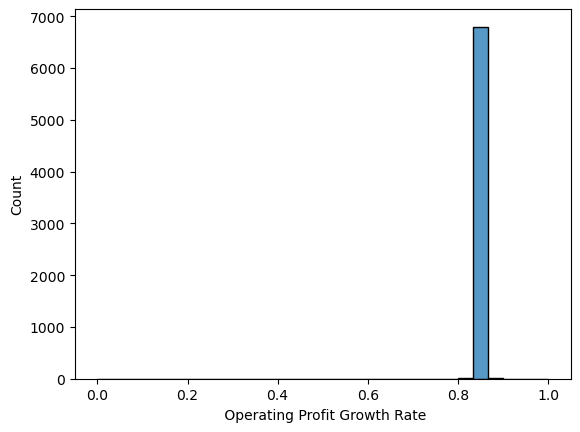

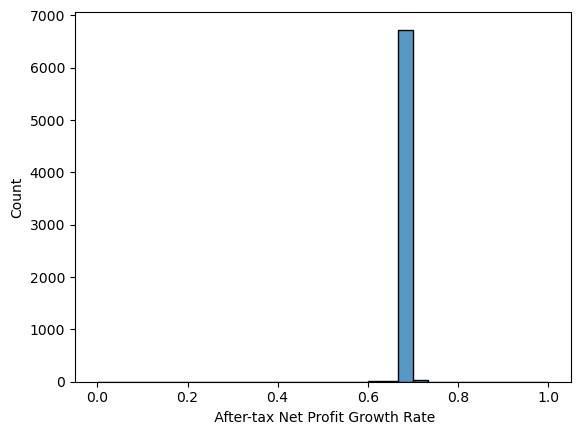

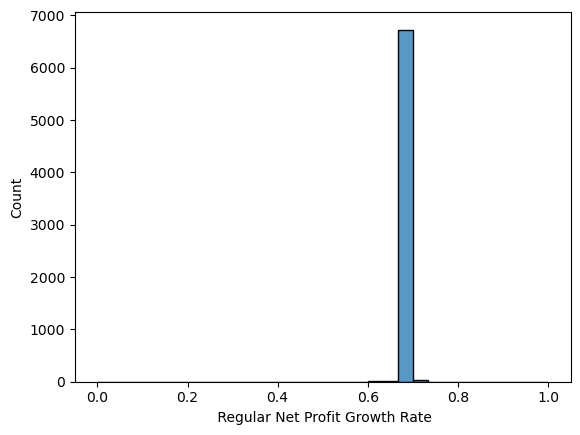

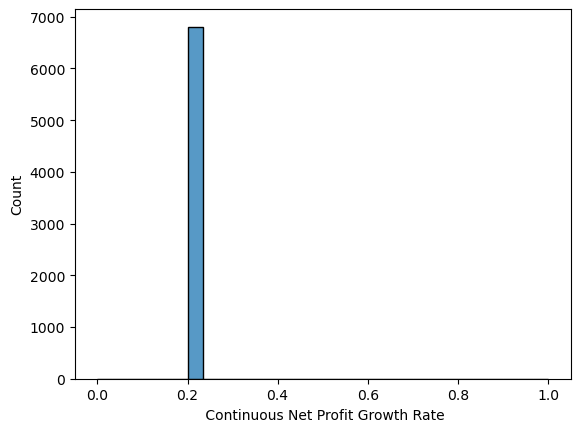

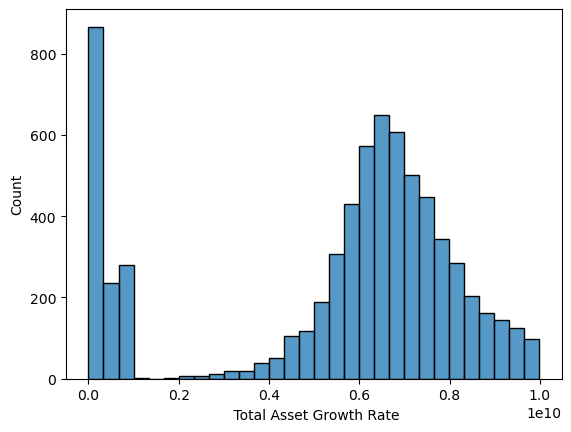

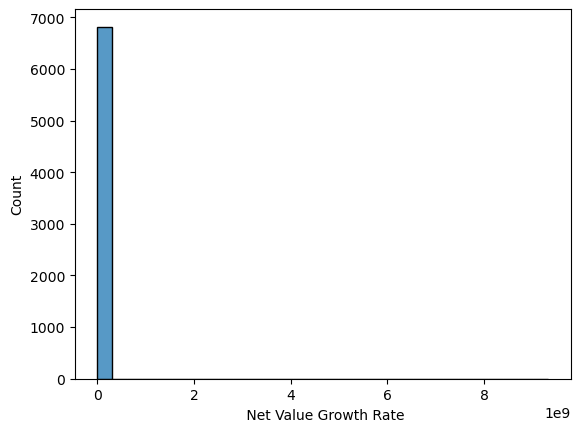

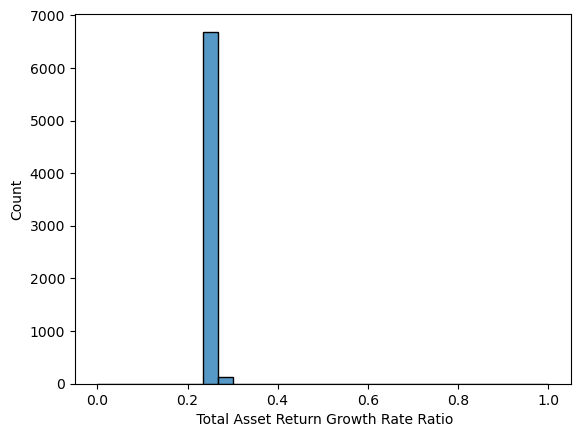

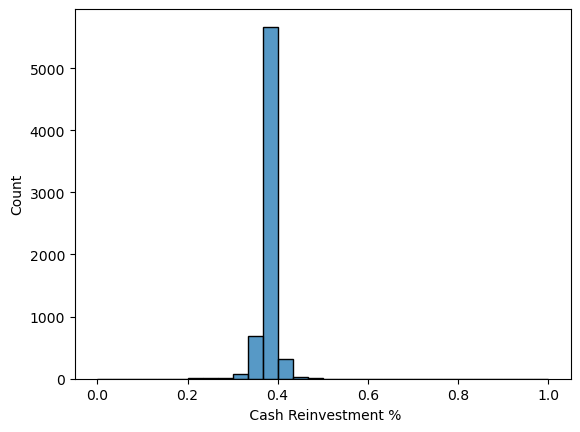

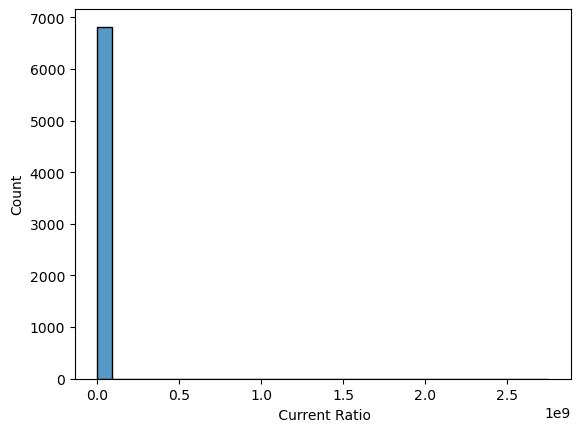

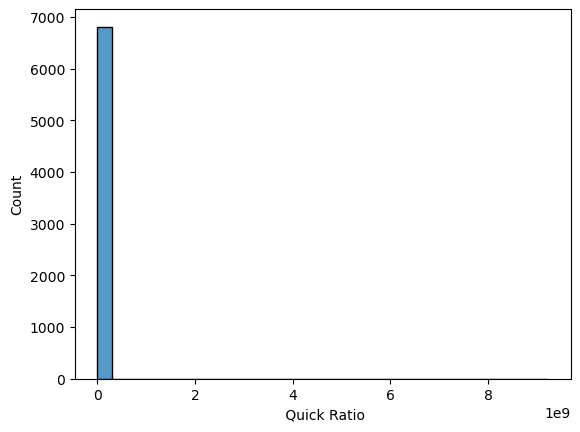

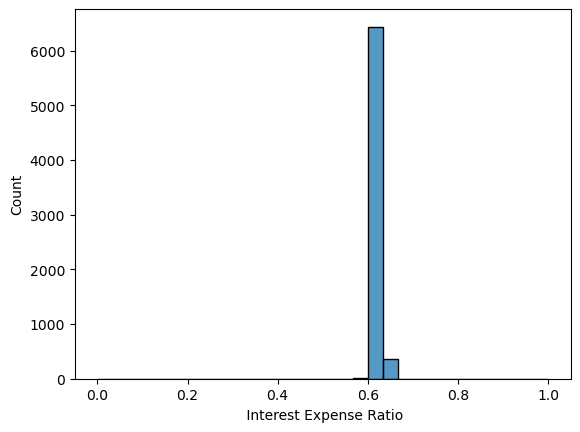

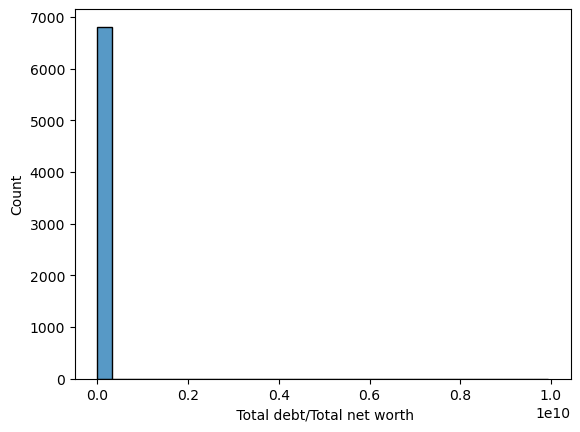

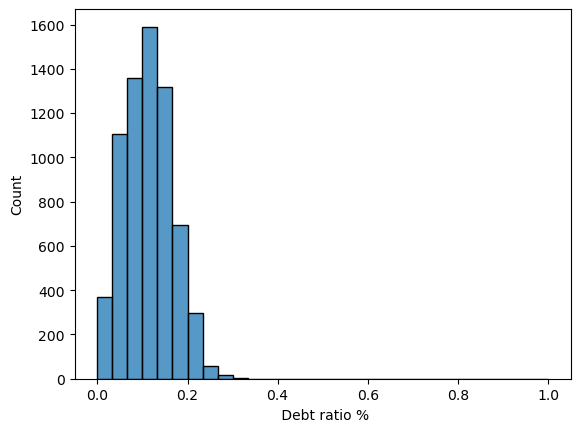

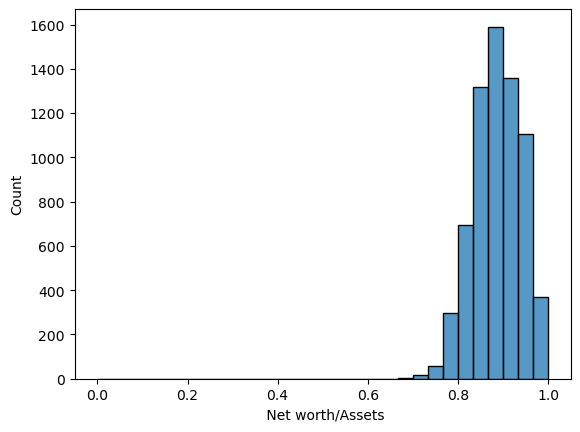

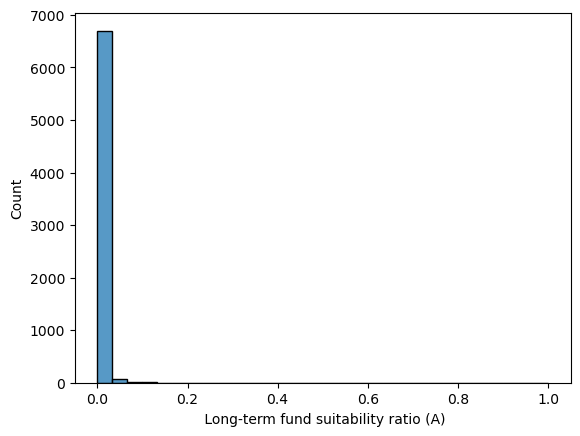

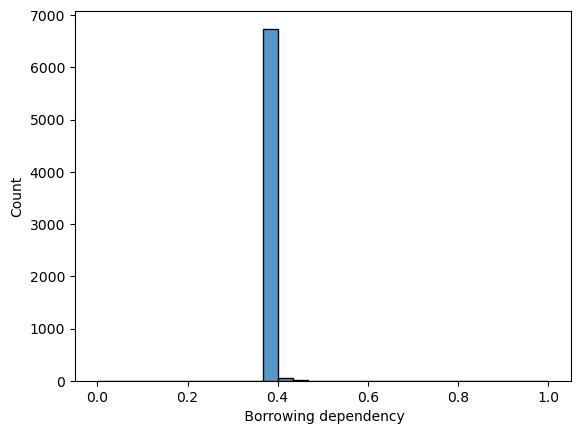

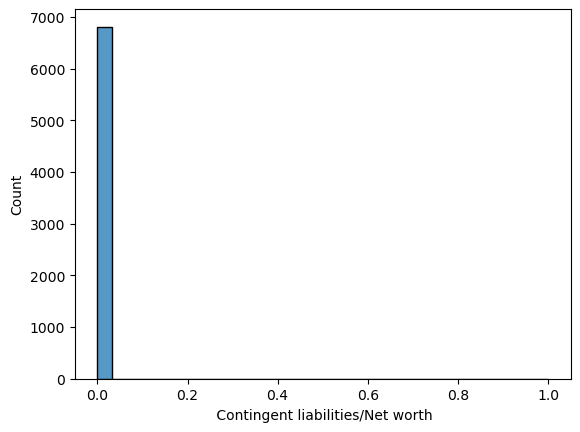

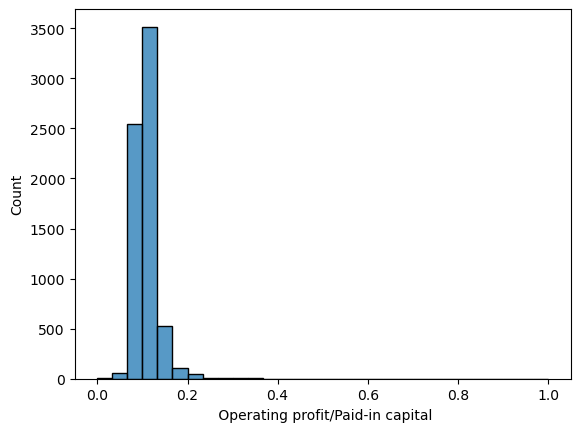

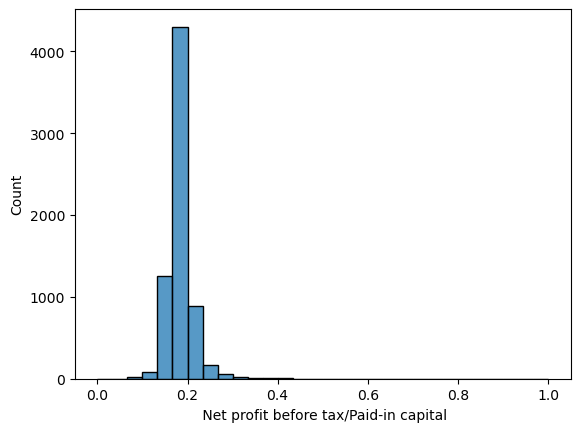

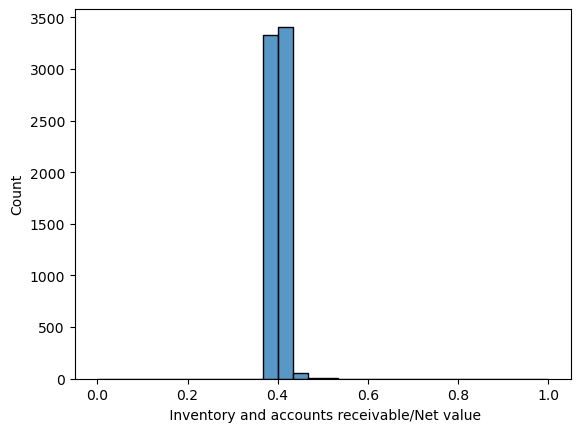

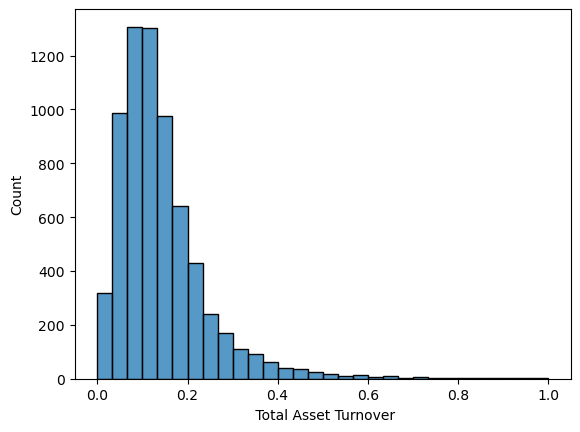

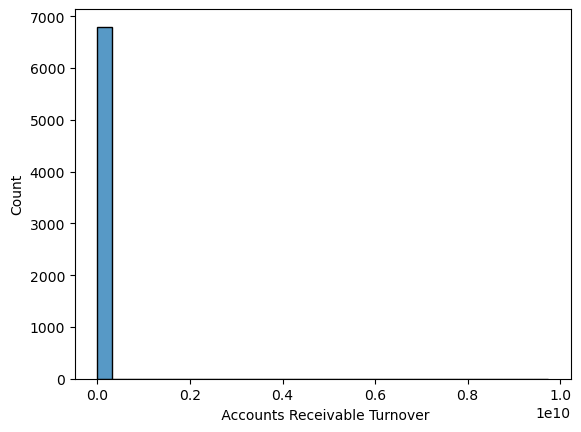

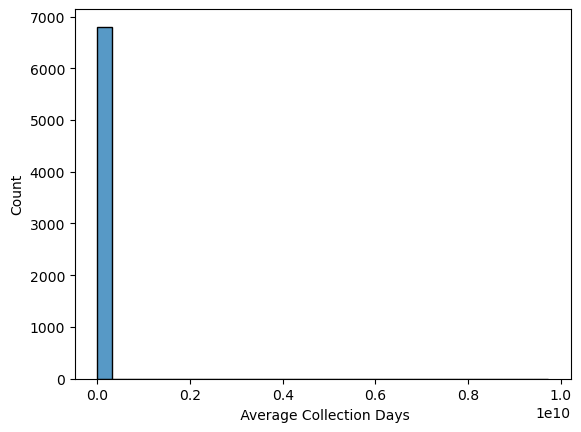

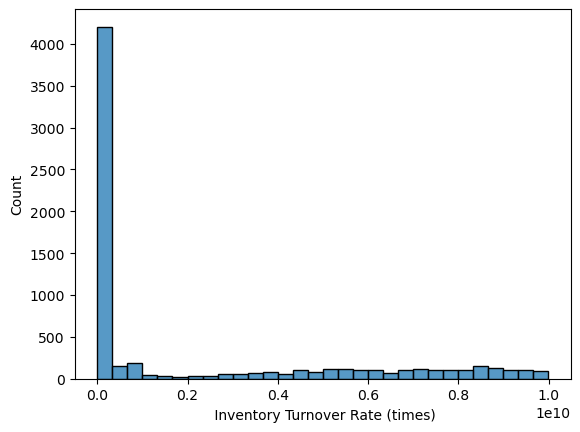

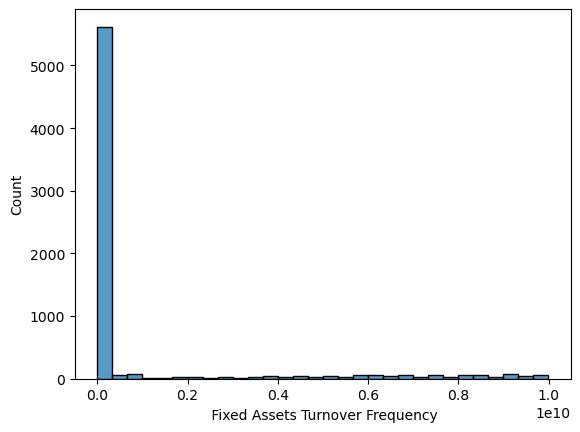

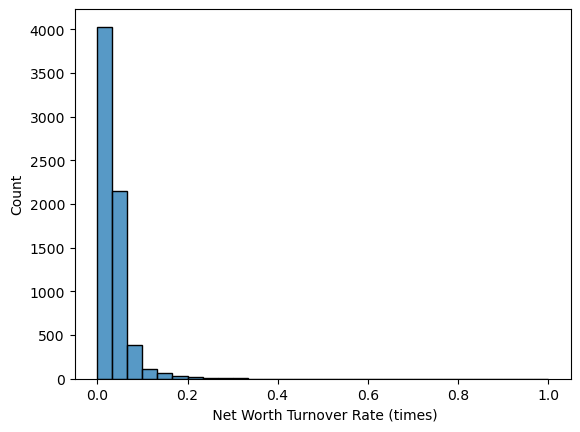

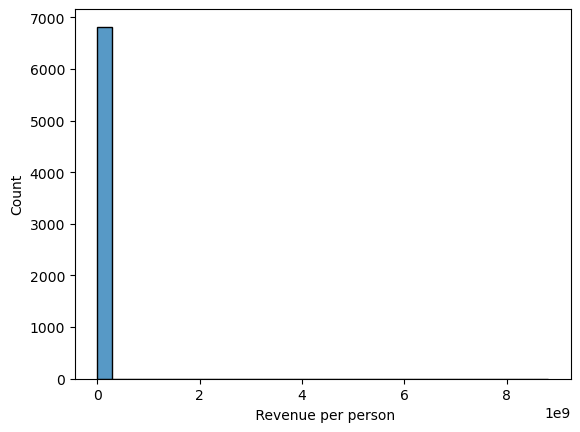

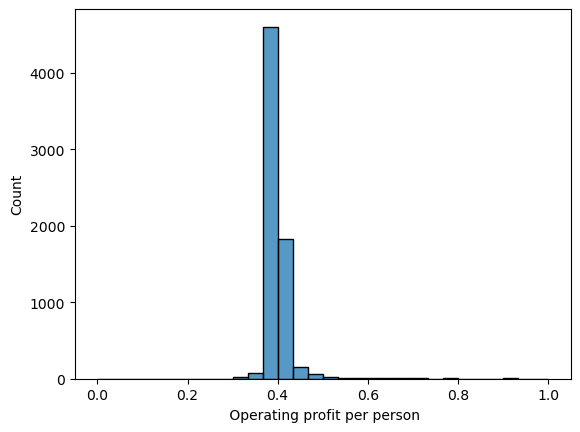

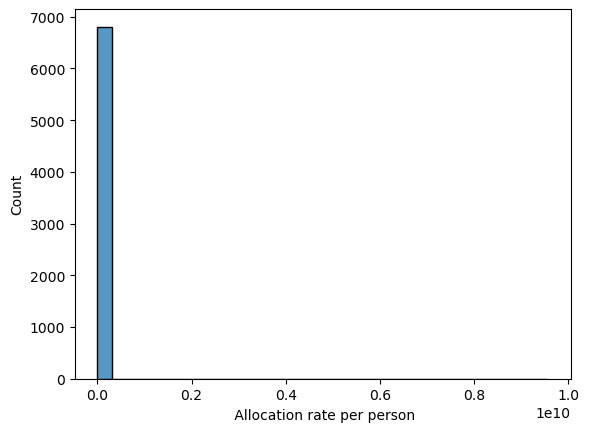

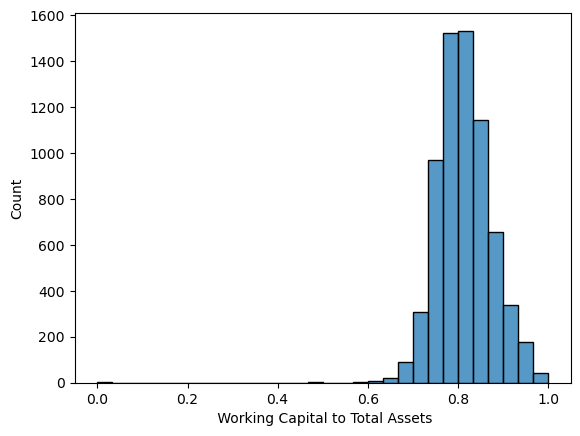

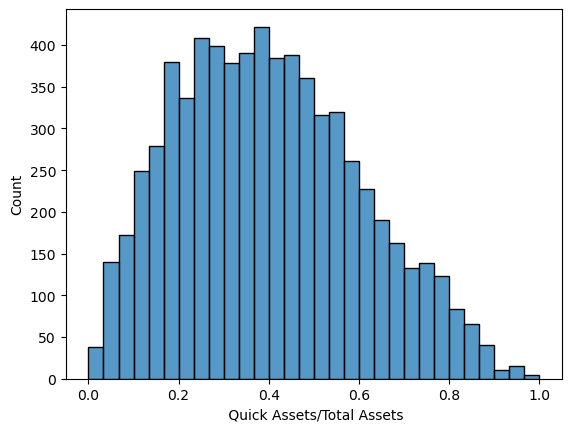

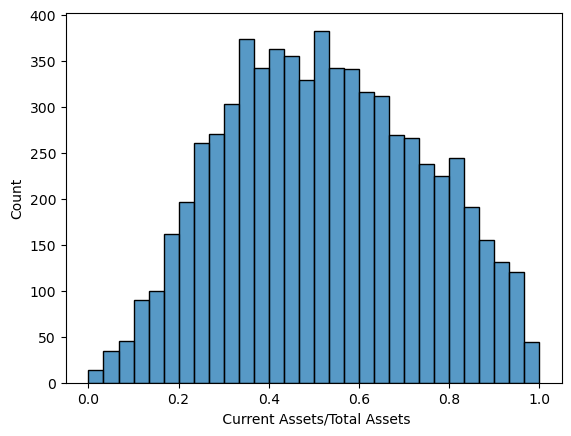

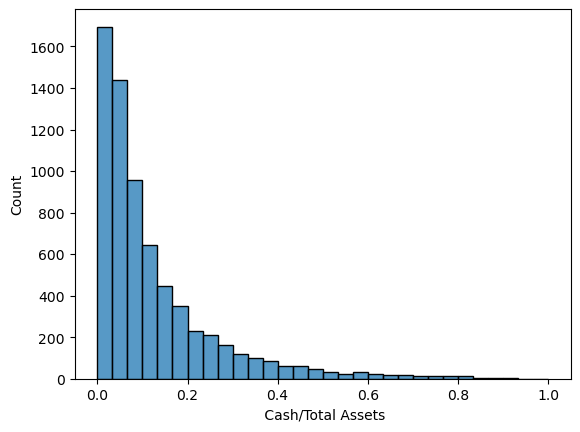

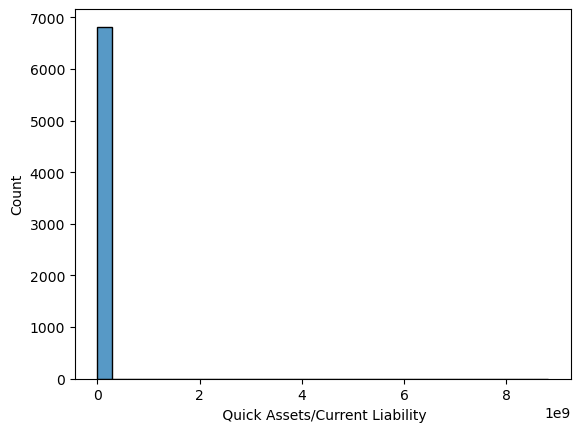

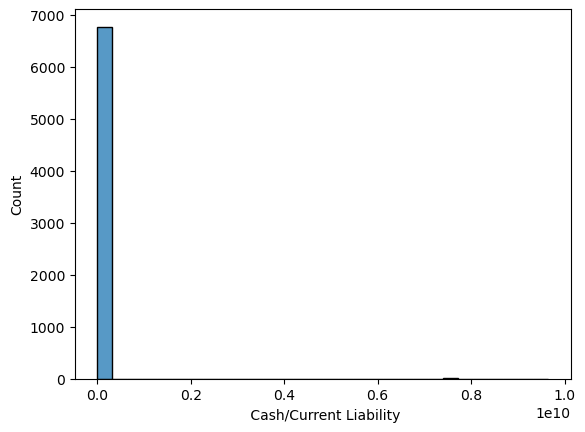

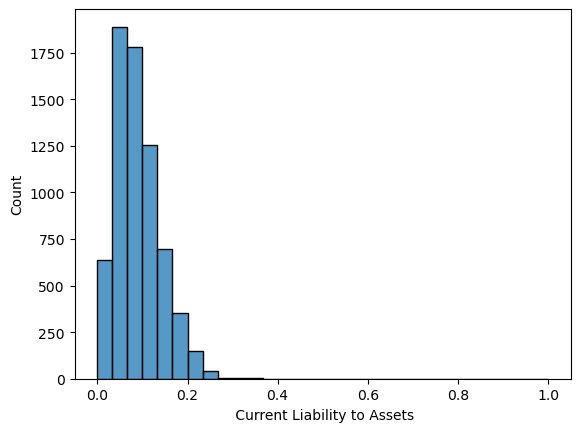

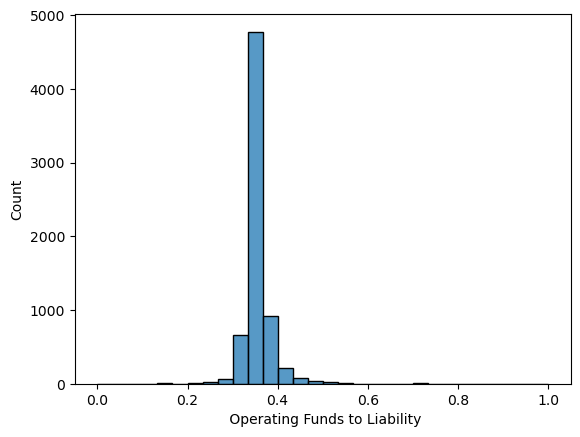

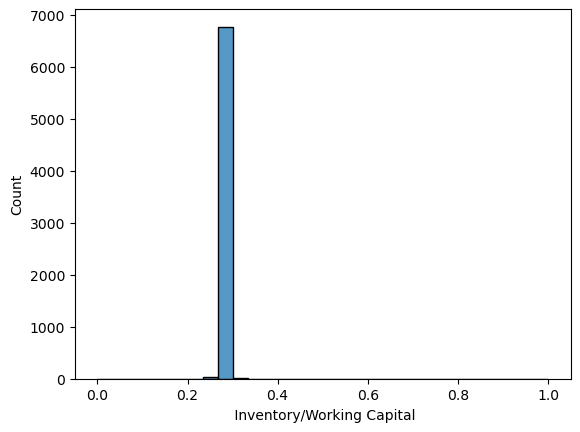

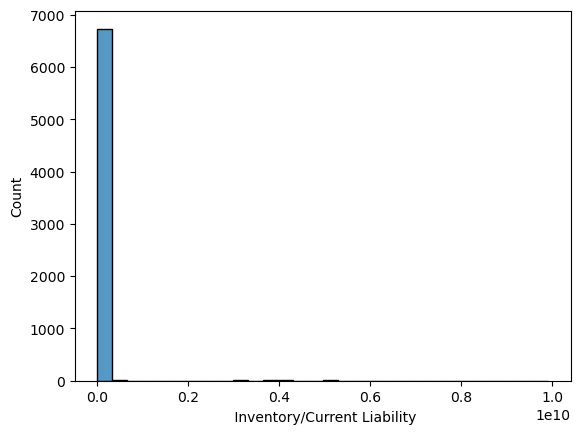

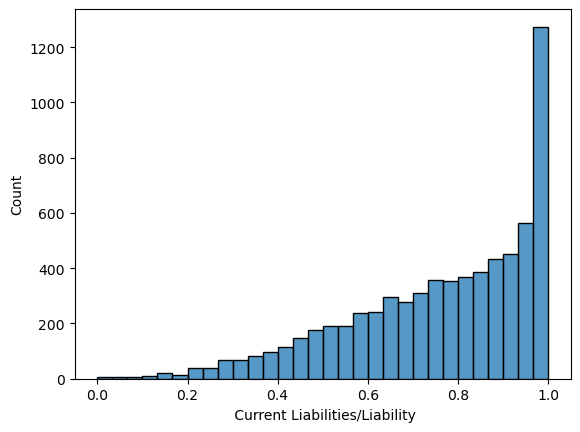

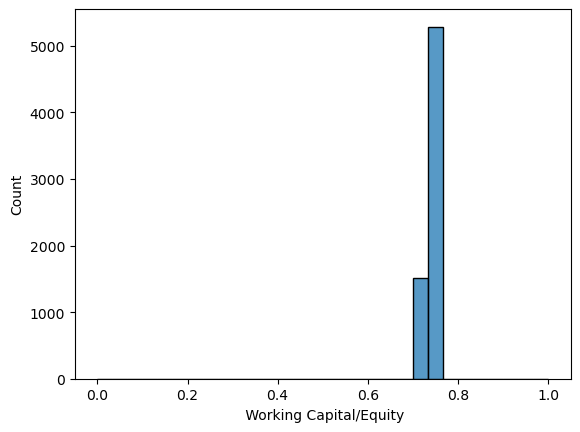

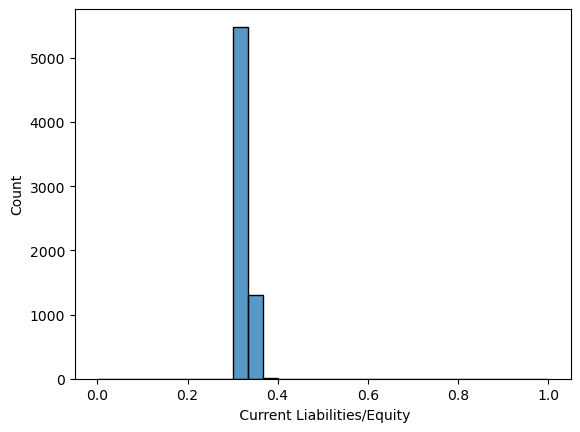

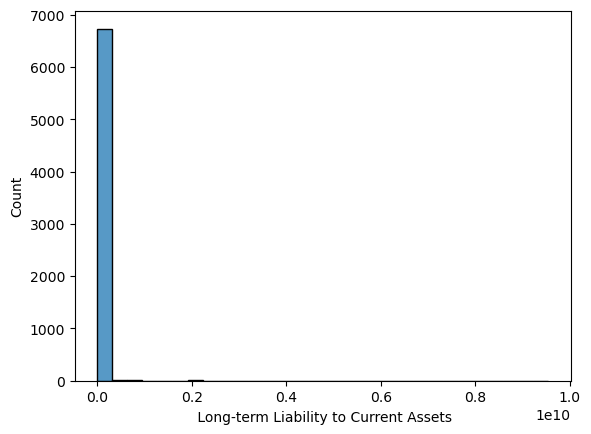

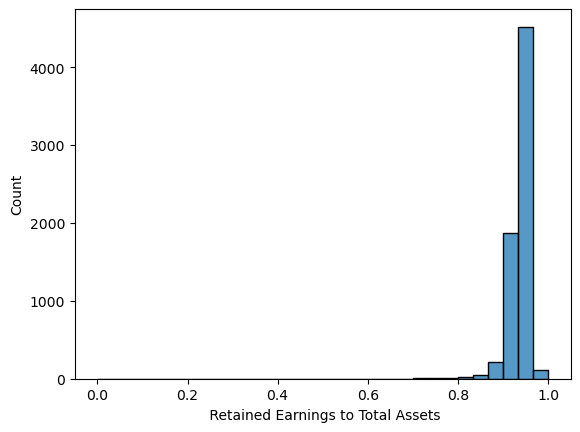

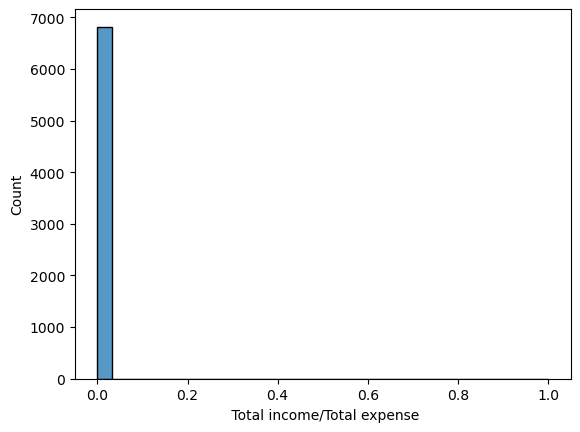

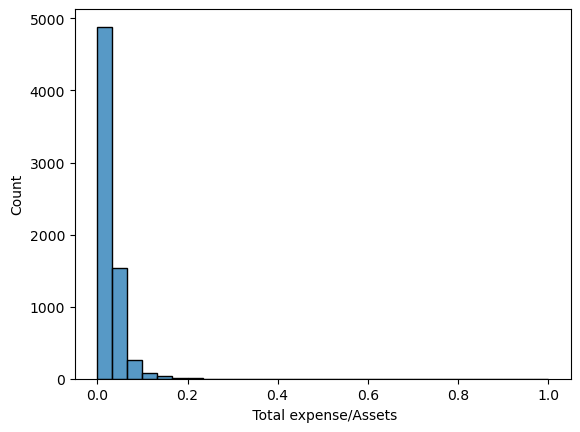

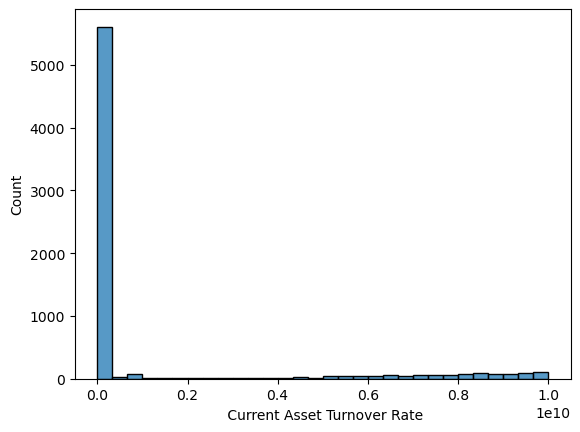

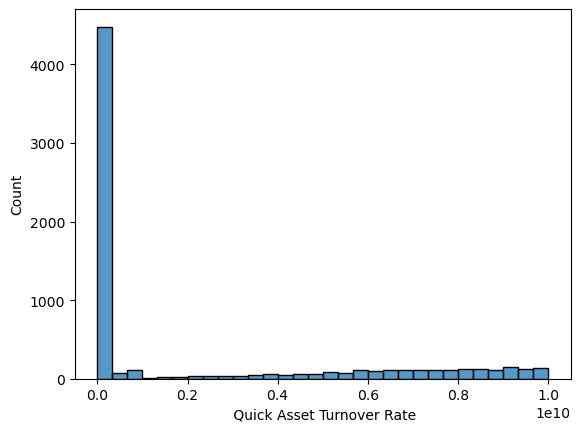

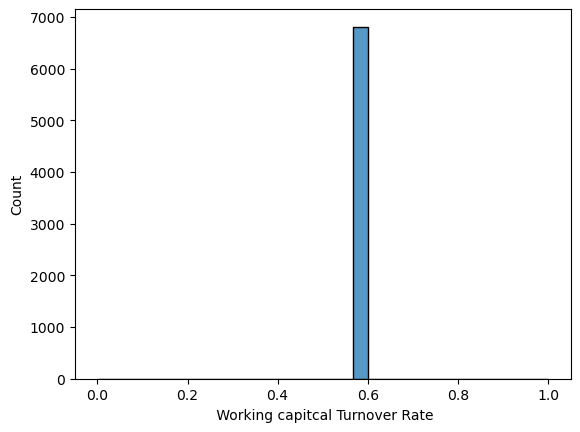

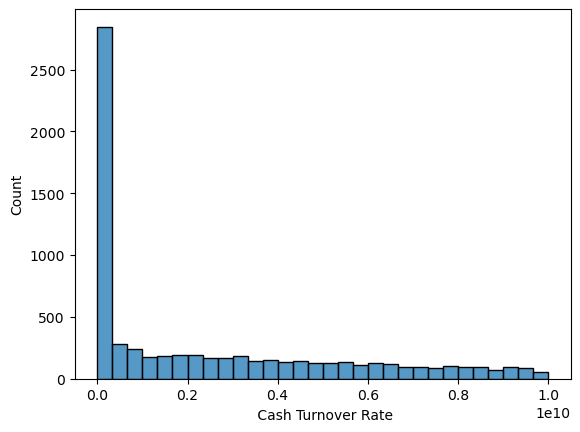

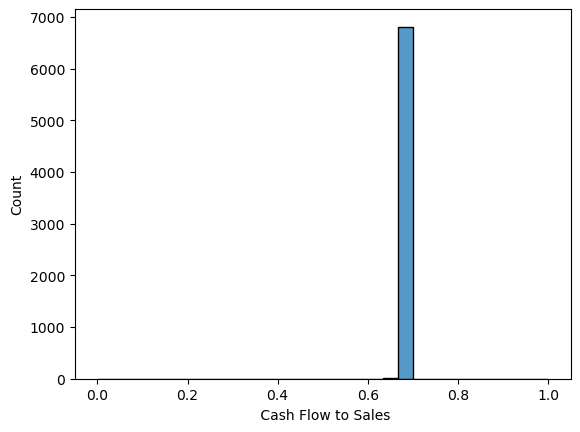

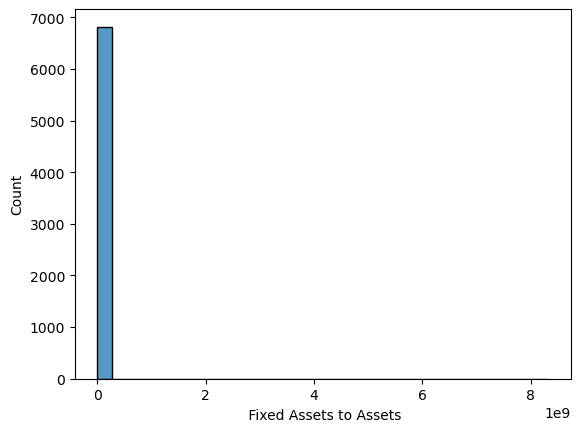

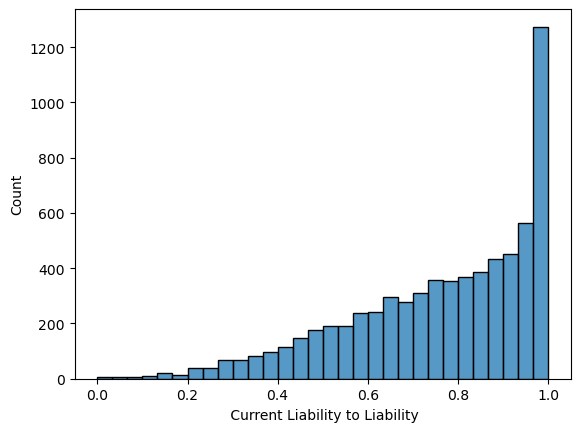

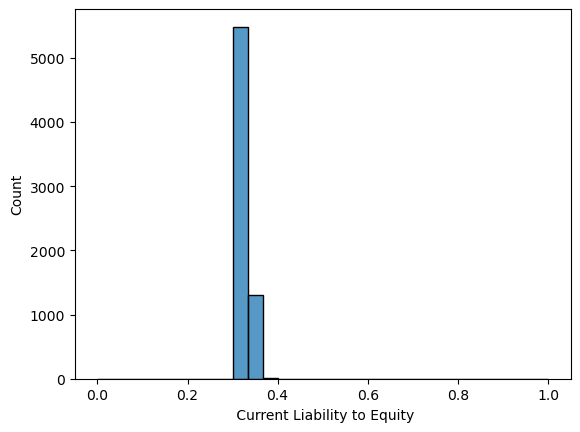

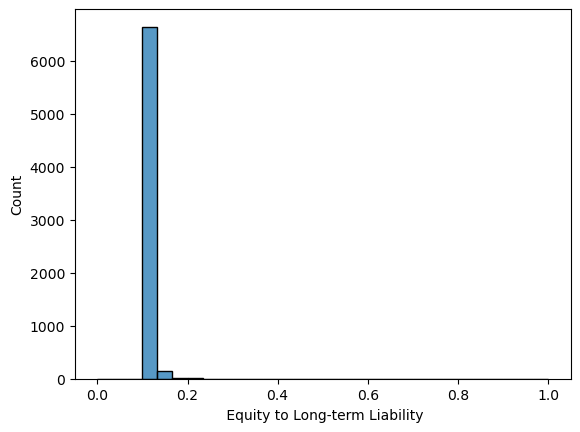

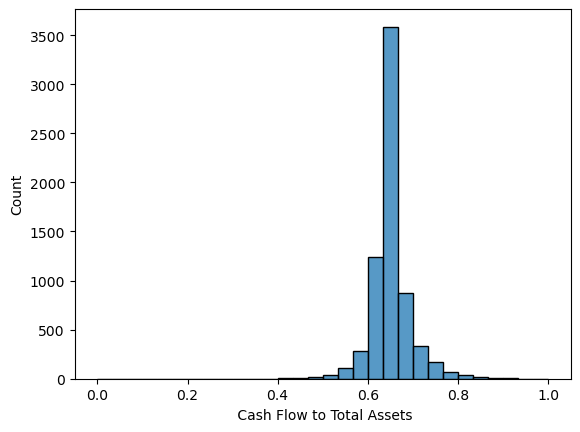

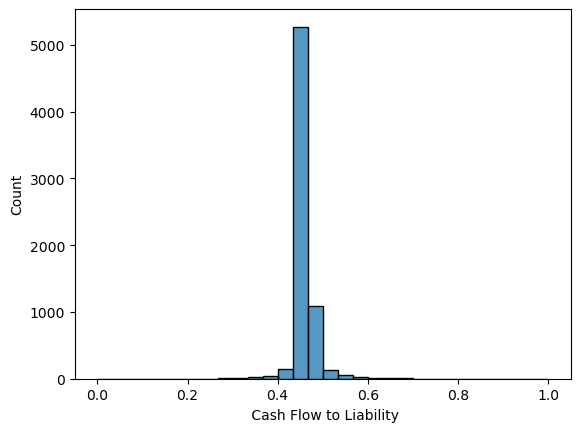

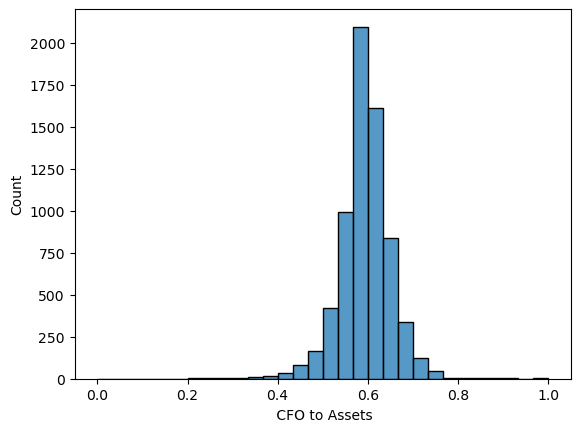

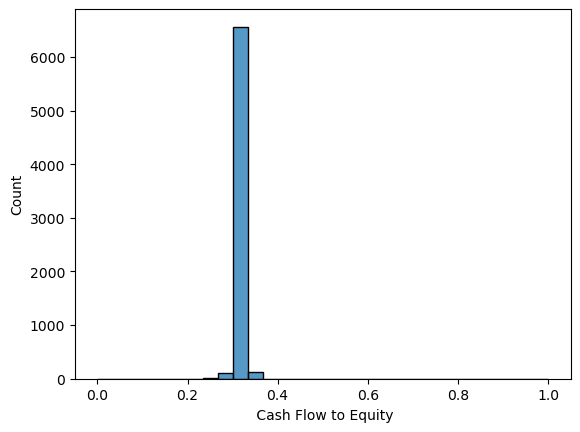

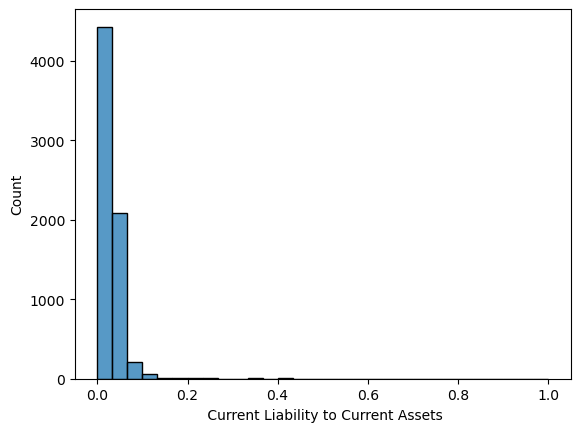

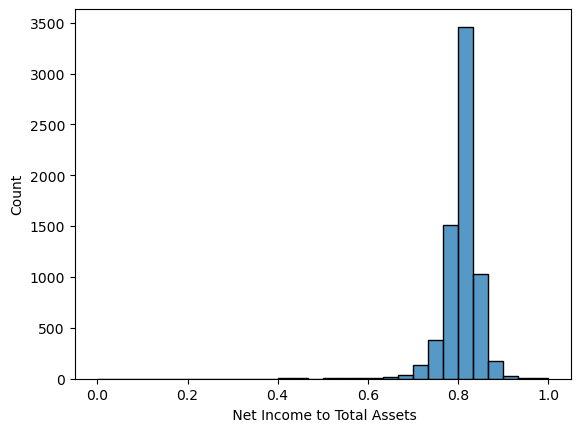

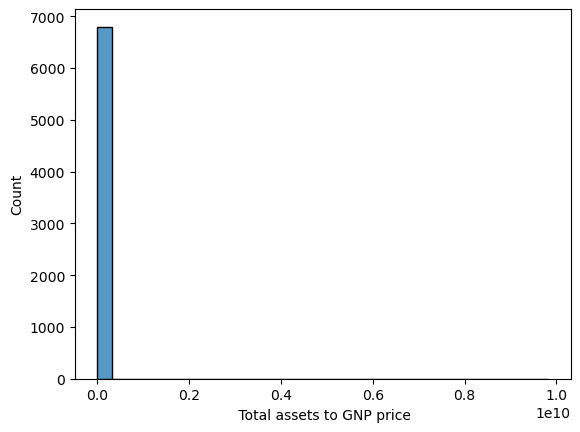

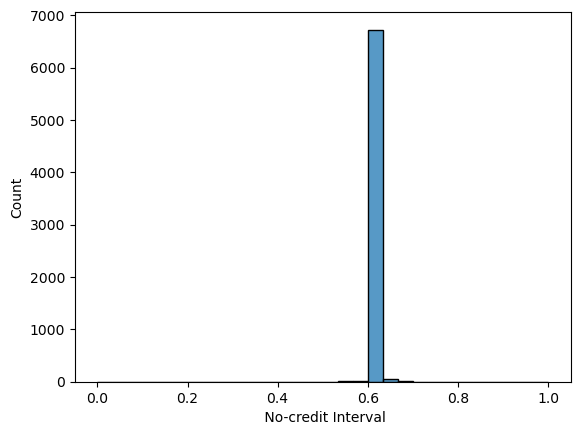

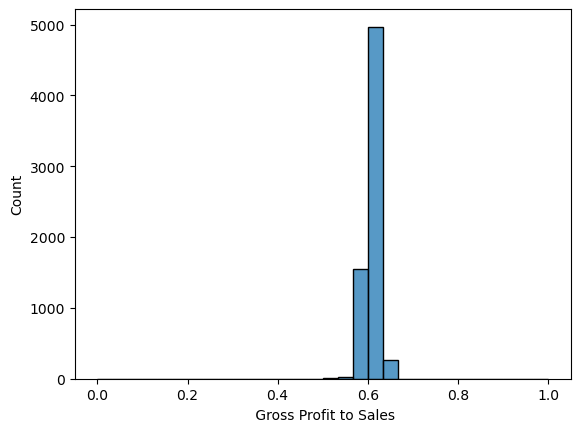

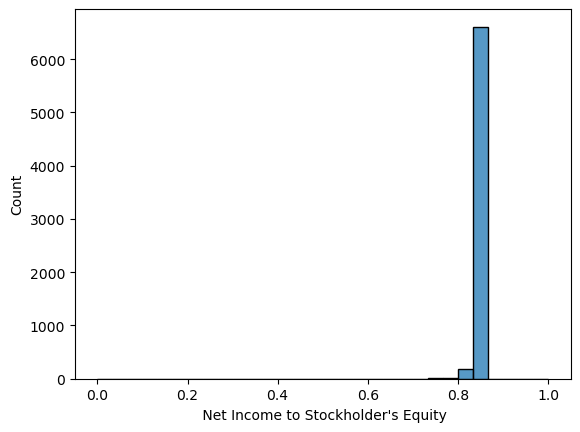

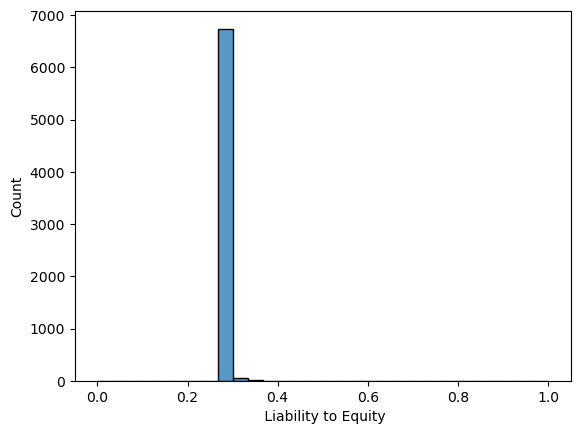

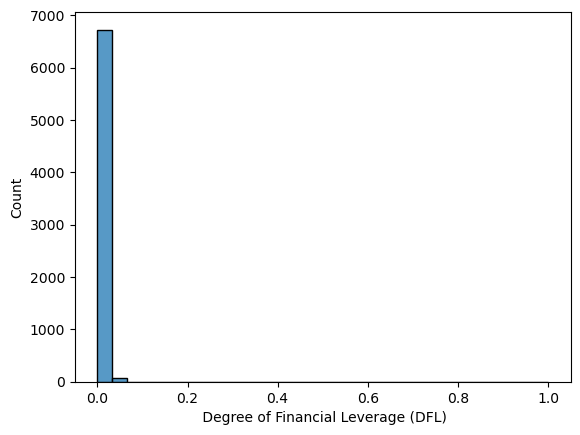

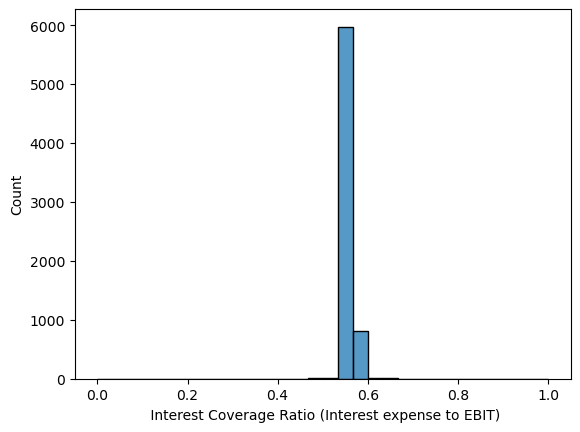

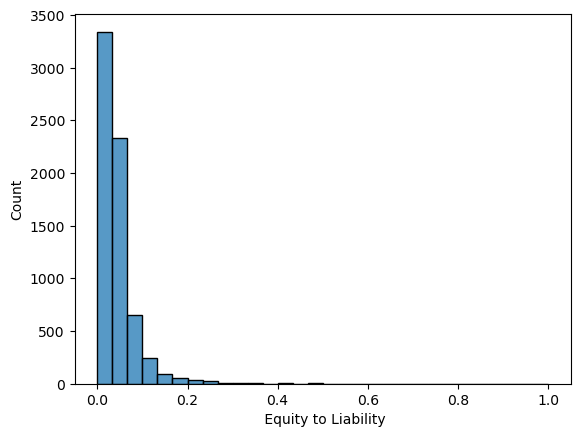

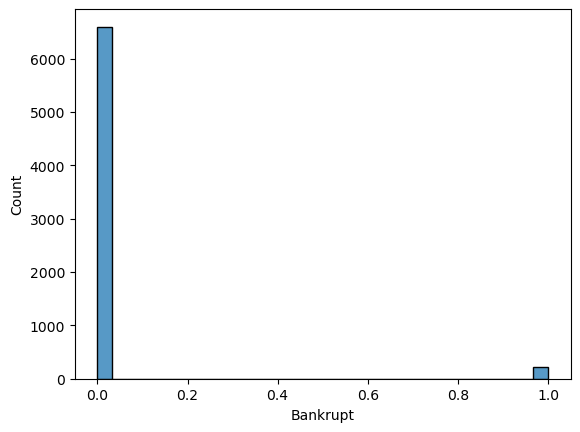

In [20]:
def hist_plot(df,feature):
    sns.histplot(data=dataset,x=feature,bins=30)
    plt.show()
    
for i in range(0,dataset.shape[1]):
    hist_plot(dataset,features[i])

## From the box plot and histogram plot, It can be concluded that there are lot of outliers in the dataset
## Assuming the data is not normally distributed, There are three solutions to deal with outliers


### Case 1) Removing outliers using IQR method 
### Case 2) Ignoring outliers
### Case 3) Imputing outliers using IQR method


### Case 1) Removing outliers using IQR method 

In [21]:
x1 = dataset.iloc[:,0:93]
x1.head()

ROA(C) before interest and depreciation before interest  \
0                                           0.370594          
1                                           0.464291          
2                                           0.426071          
3                                           0.399844          
4                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

    Continuous interest rate (after tax)  ...  \
0                               0.780985  ...   
1                               0.781506  ...   
2                               0.780284  ...   
3                               0.781241  ...   
4                               0.781550  ...   

    Current Liability to Current Assets   Net Income to Total Assets  \
0                              0.118250                     0.716845   
1                              0.047775                     0.795297   
2                              0.025346                     0.774670   
3                              0.067250                     0.739555   
4                              0.047725                     0.795016   

    Total assets to GNP price   No-credit Interval   Gross Profit to Sales  \
0                    0.009219             0.622879                0.601453   
1                    0.008323             0.623652                0.610237   
2                    0.040003             0.623841                0.601449   
3                    0.003252             0.622929                0.583538   
4                    0.003878             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                     

In [22]:
features_x = dataset.columns[0:93]

In [23]:
for feature in features_x:
    Q1 = x1[feature].quantile(0.25)
    Q3 = x1[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3+1.5*IQR
    lower_bound = Q1-1.5*IQR
    index_names= x1[(x1[feature]>=upper_bound) | (x1[feature]<=lower_bound)].index

In [24]:
x1.drop(index_names,inplace=True)
x1.head(30)

ROA(C) before interest and depreciation before interest  \
0                                            0.370594          
1                                            0.464291          
2                                            0.426071          
3                                            0.399844          
4                                            0.465022          
5                                            0.388680          
6                                            0.390923          
7                                            0.508361          
8                                            0.488519          
9                                            0.495686          
10                                           0.482475          
11                                           0.444401          
12                                           0.491152          
13                                           0.474041          
14                                           0.506703          
15                                           0.513821          
16                                           0.488909          
17                                           0.535953          
18                                           0.504071          
19                                           0.487398          
20                                           0.485253          
21                                           0.504558          
22                                           0.512017          
23                                           0.494857          
24                                           0.509969          
25                                           0.444986          
26                                           0.519280          
28                                           0.500853          
29                                           0.416126          
30                                           0.462195          

     ROA(A) before interest and % after tax  \
0                                  0.424389   
1                                  0.538214   
2                                  0.499019   
3                                  0.451265   
4                                  0.538432   
5                                  0.415177   
6                                  0.445704   
7                                  0.570922   
8                                  0.545137   
9                                  0.550916   
10                                 0.567543   
11                                 0.549717   
12                                 0.551570   
13                                 0.533308   
14                                 0.575829   
15                                 0.571086   
16                                 0.560238   
17                                 0.590438   
18                                 0.559802   
19                                 0.543720   
20                                 0.545573   
21                                 0.564490   
22                                 0.563672   
23                                 0.548136   
24                                 0.561382   
25                                 0.503652   
26                                 0.563618   
28                                 0.563945   
29                                 0.470235   
30                                 0.536034   

     ROA(B) before interest and depreciation after tax  \
0                                            0.405750    
1                                            0.516730    
2                                            0.472295    
3                                            0.457733    
4                                            0.522298    
5                                            0.419134    
6                                            0.436158    
7                                            0.559077    
8                                       

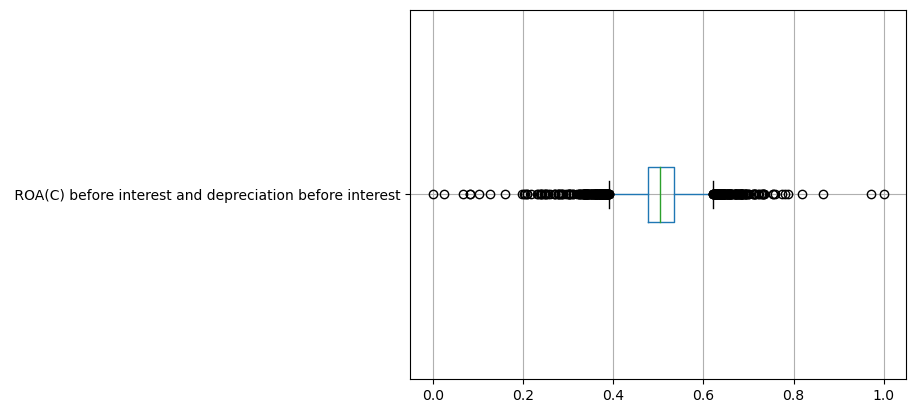

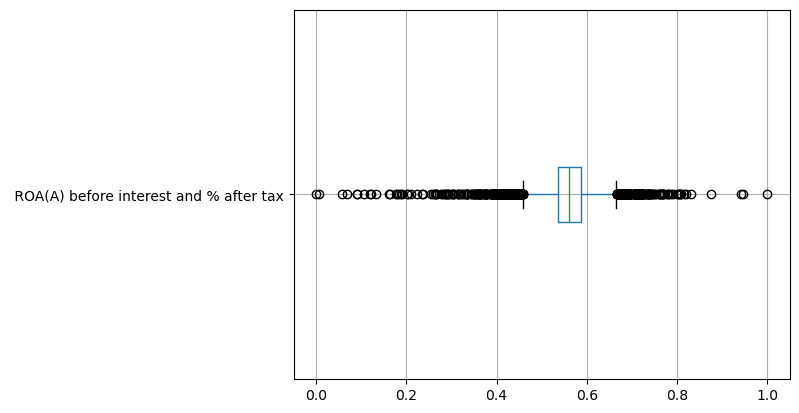

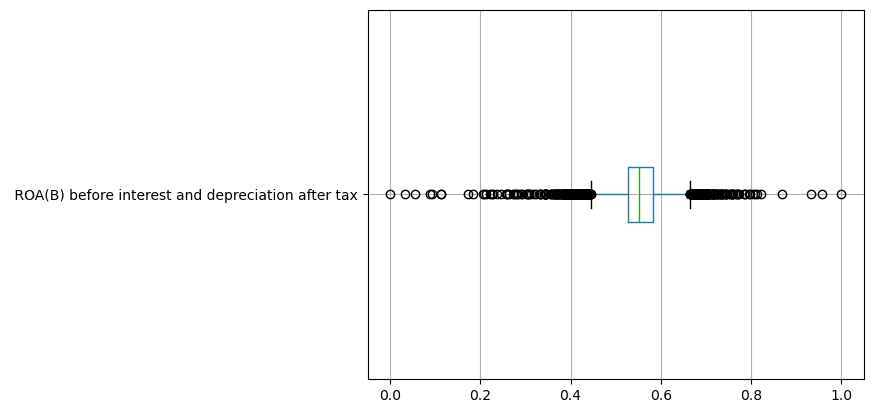

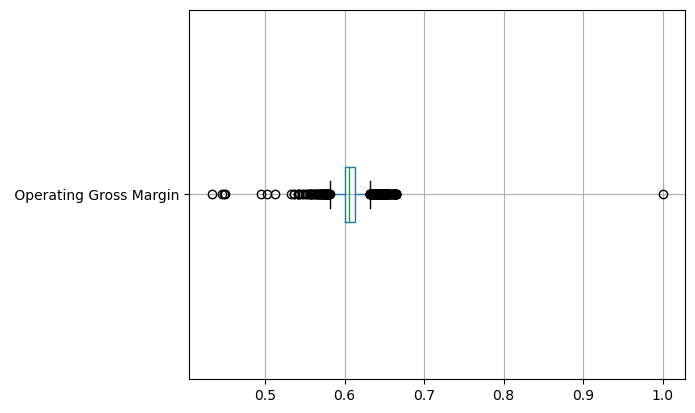

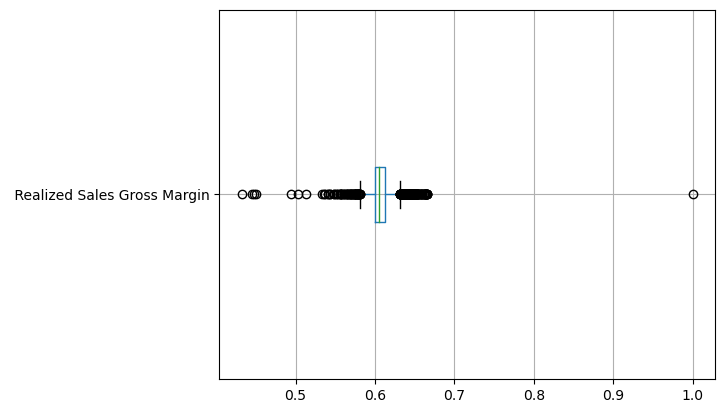

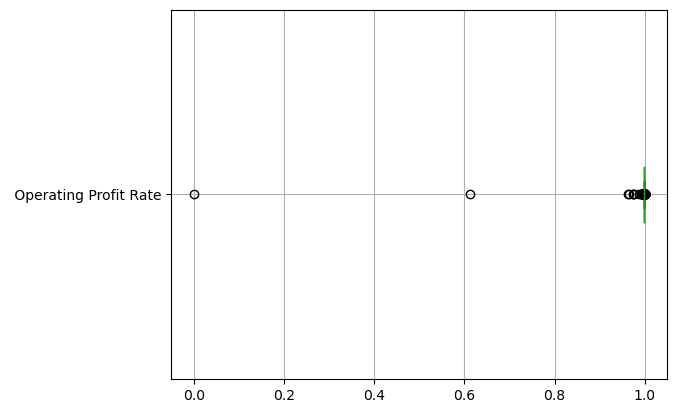

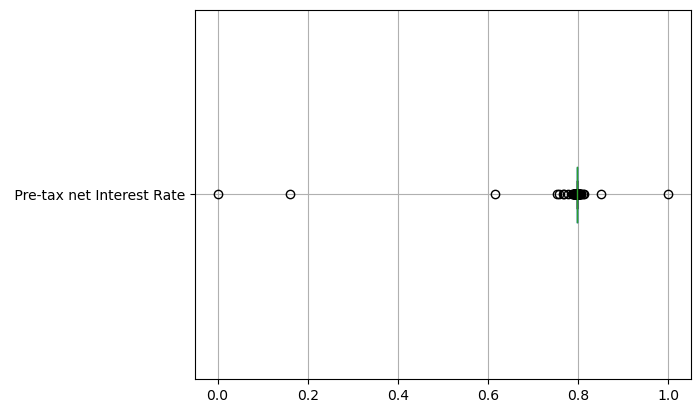

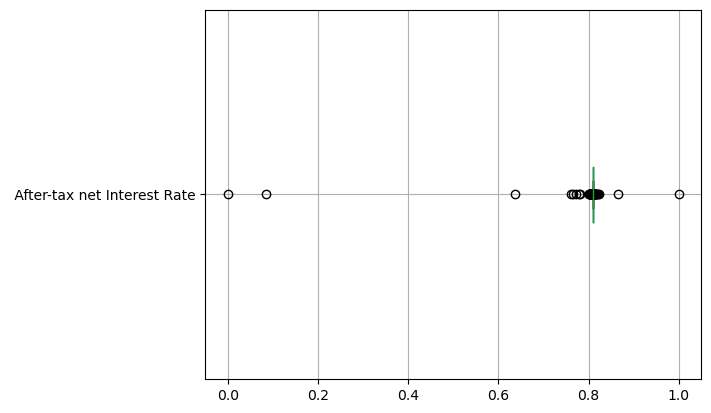

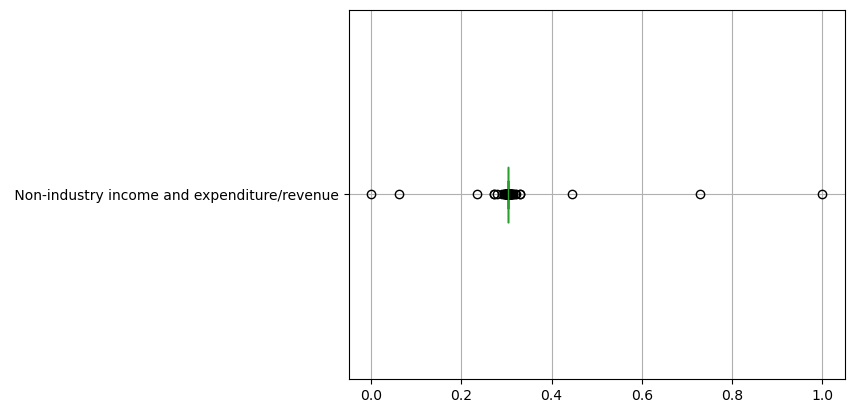

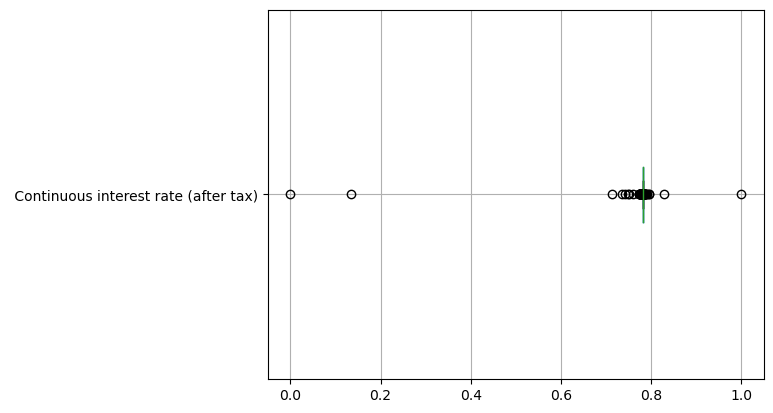

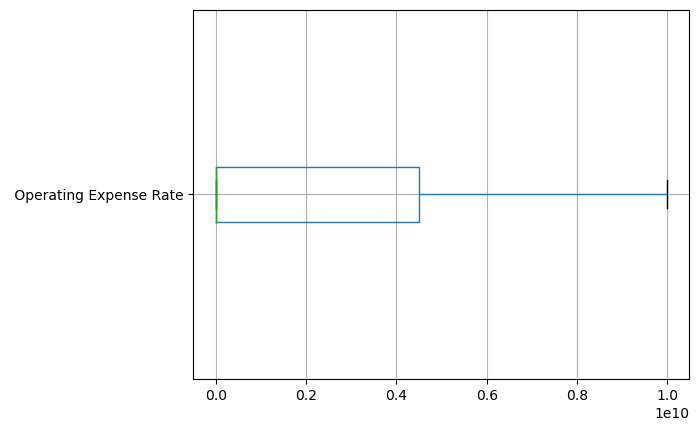

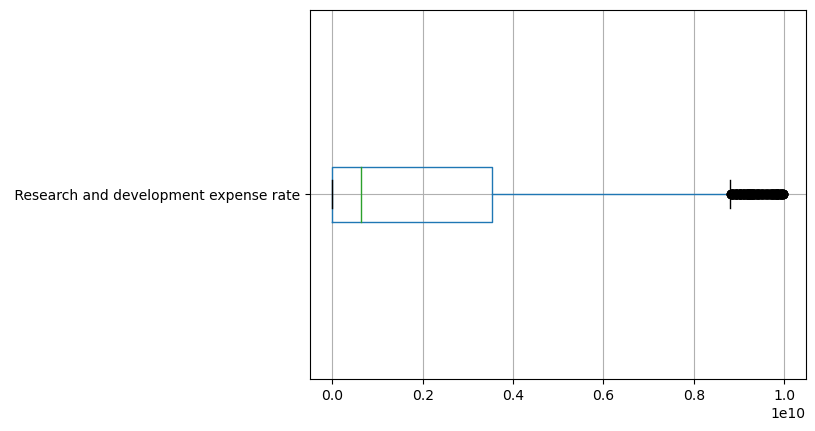

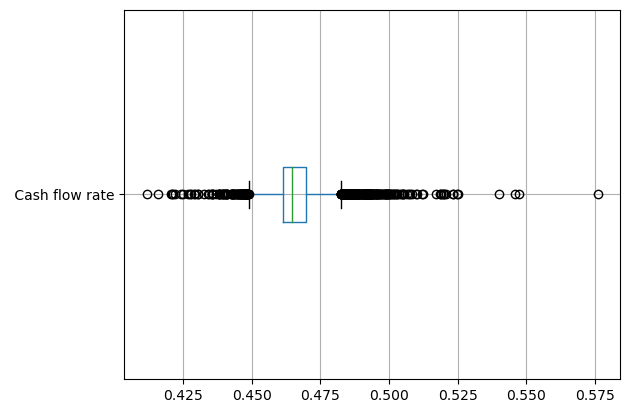

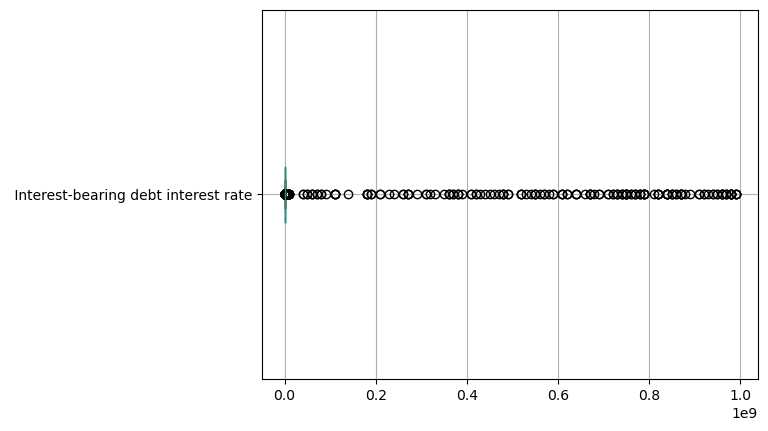

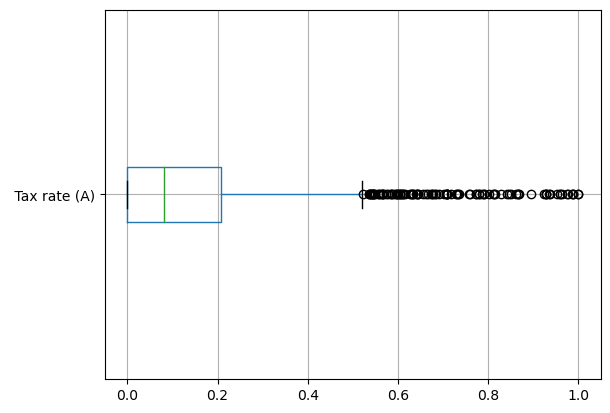

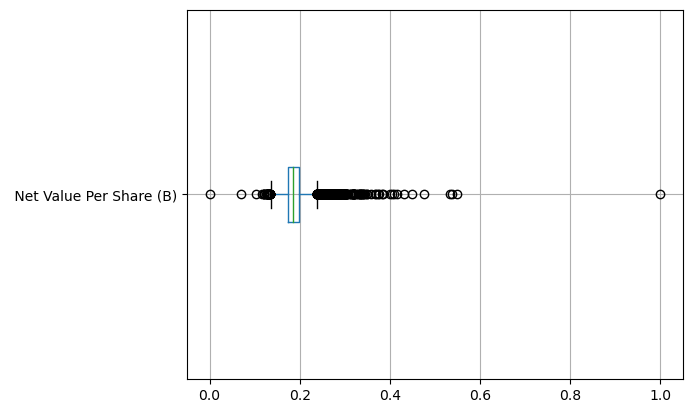

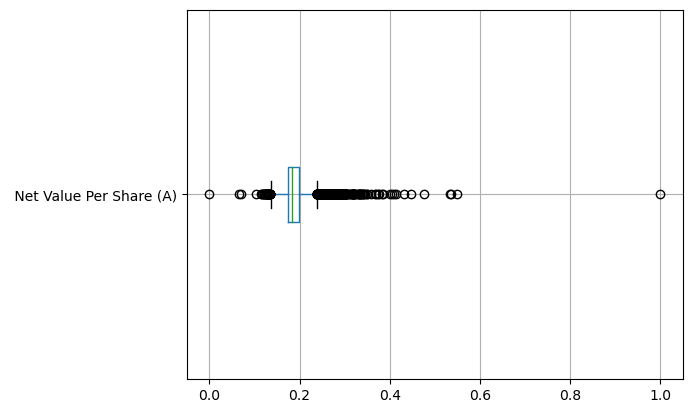

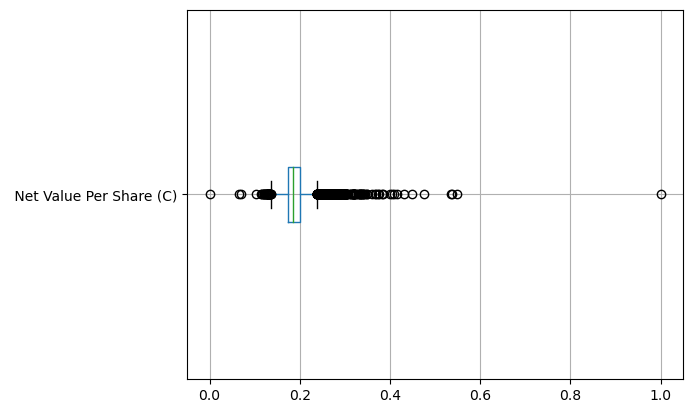

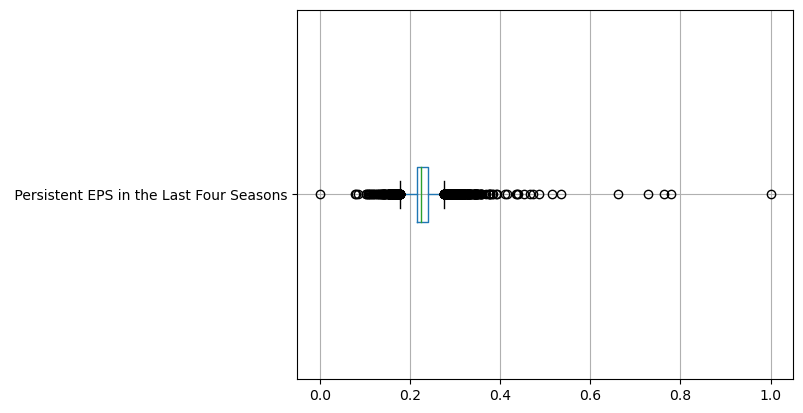

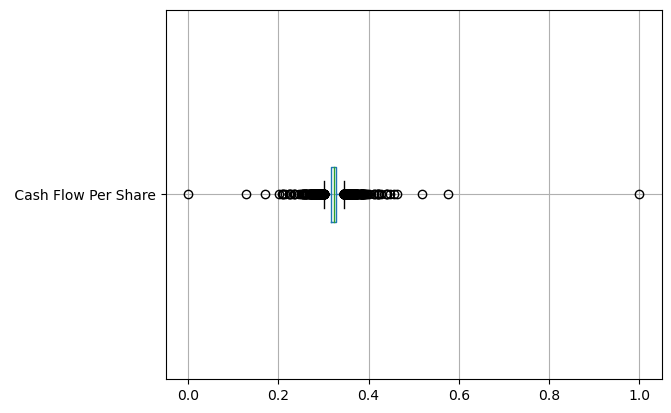

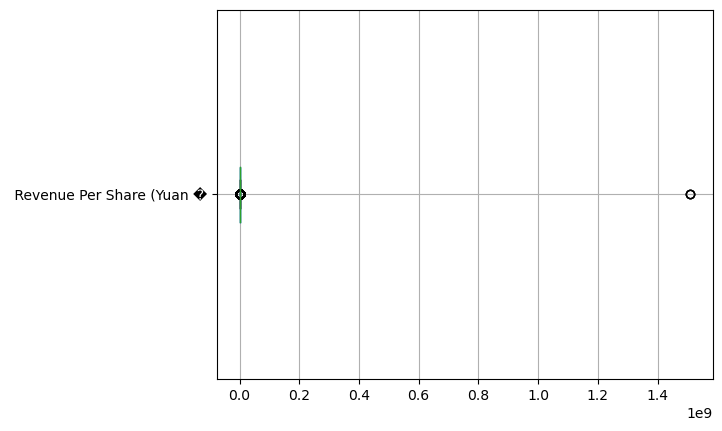

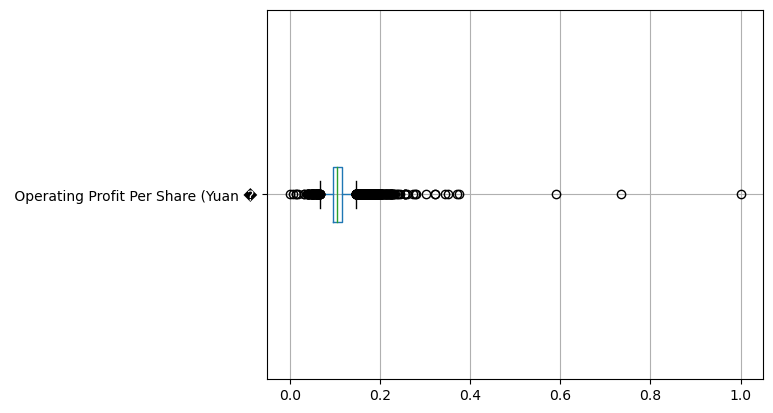

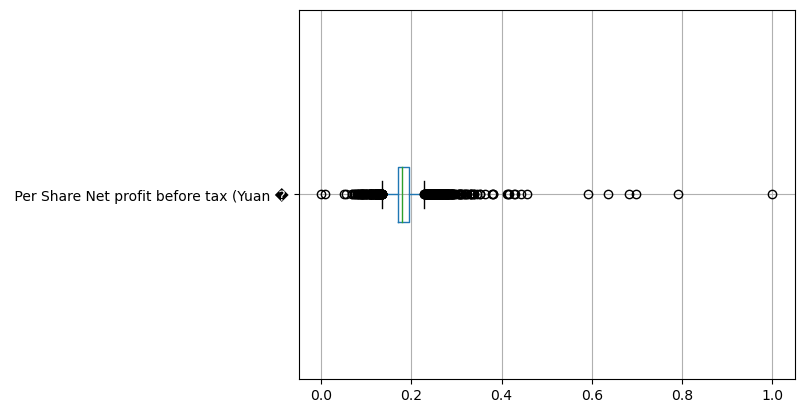

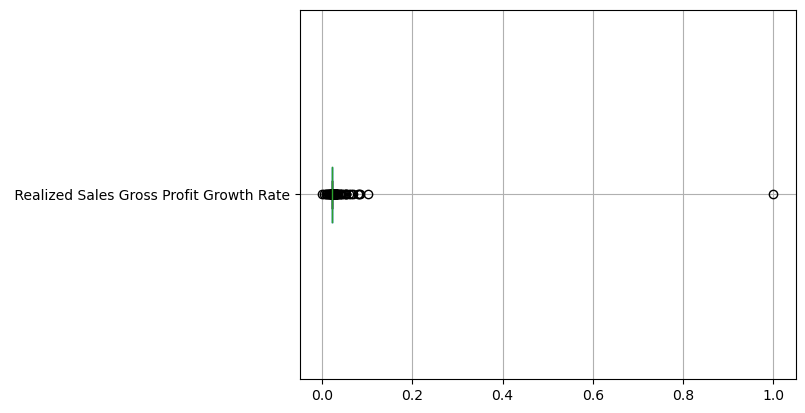

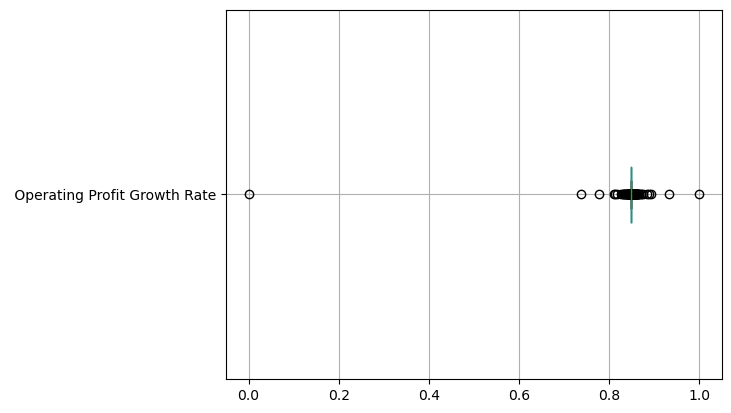

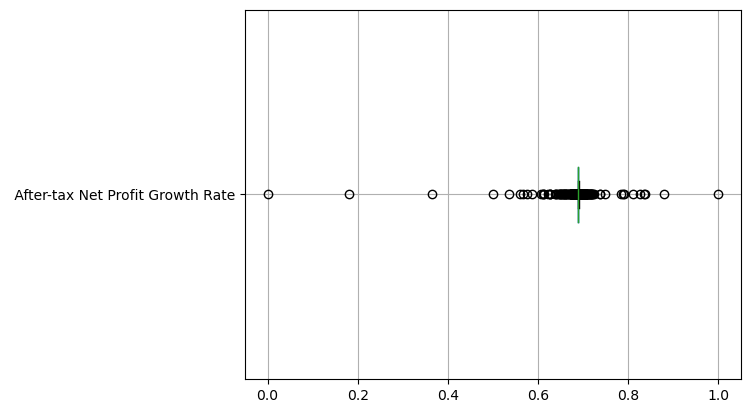

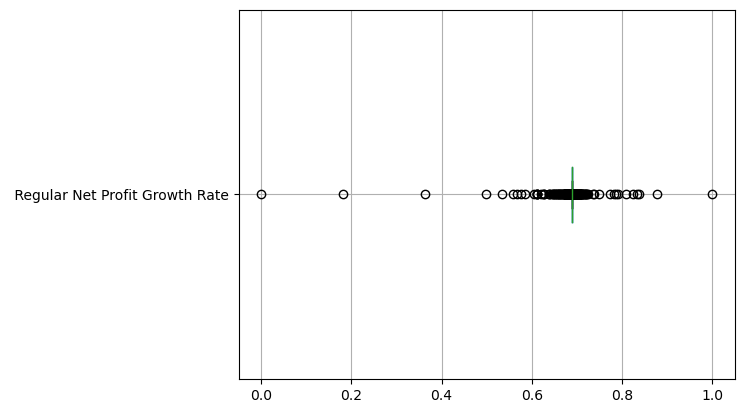

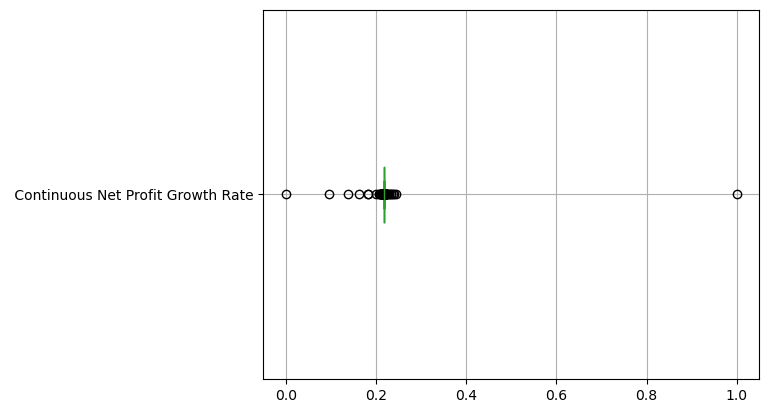

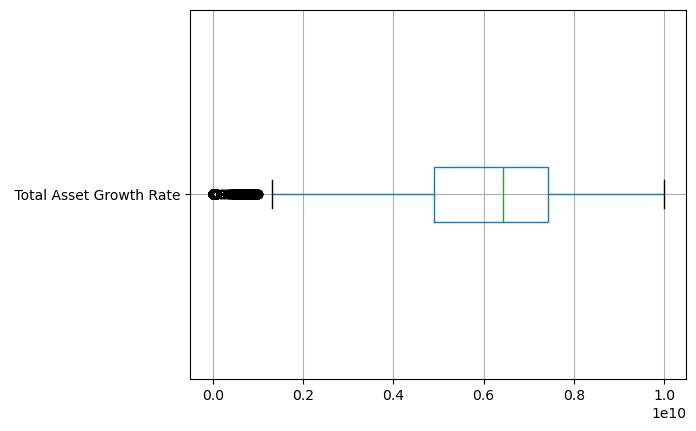

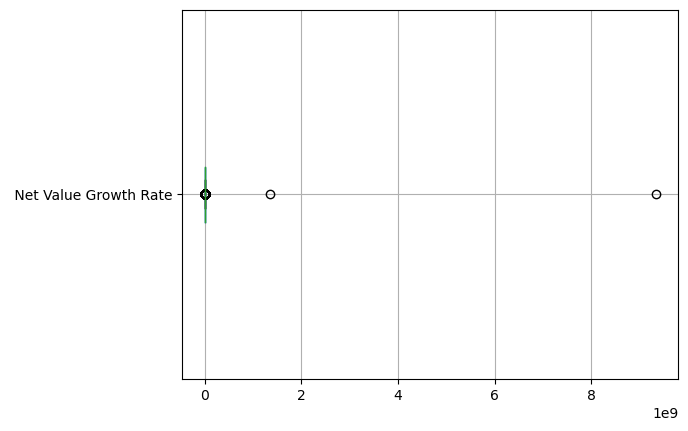

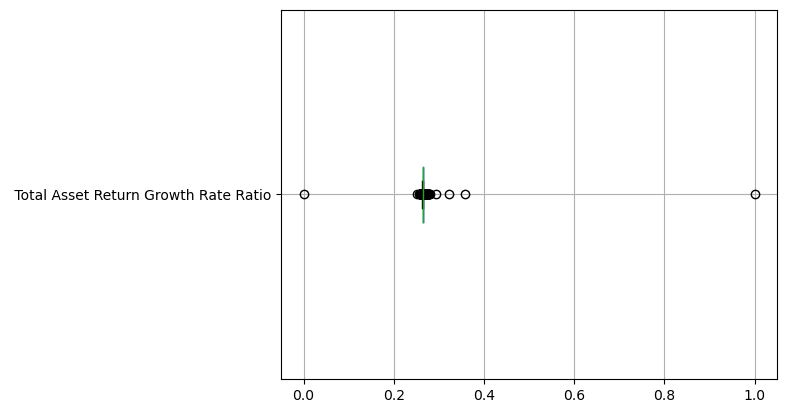

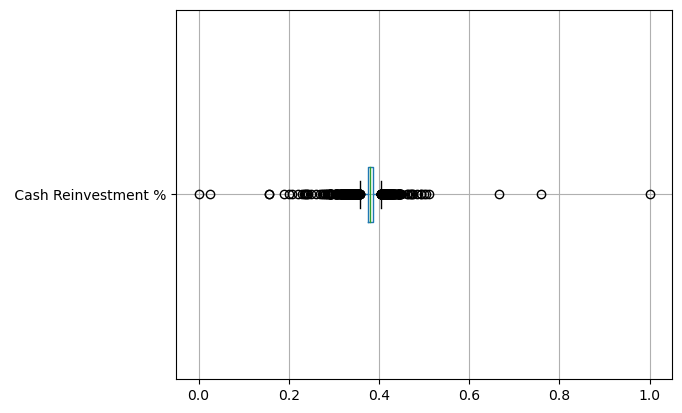

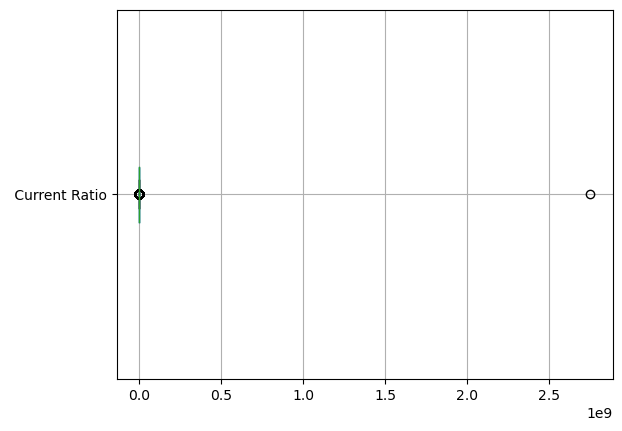

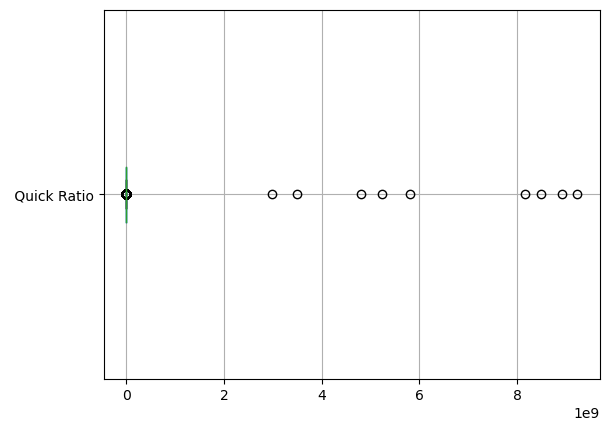

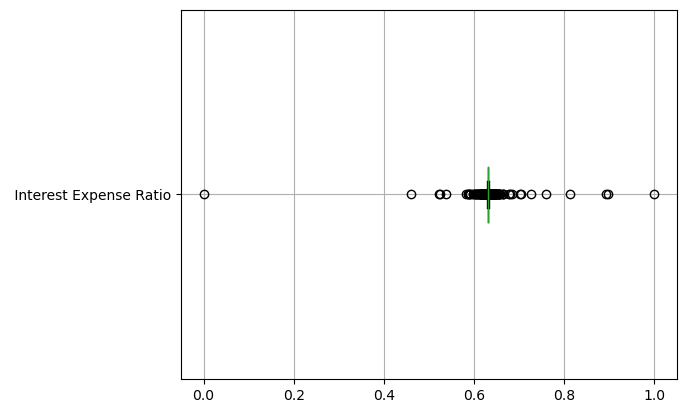

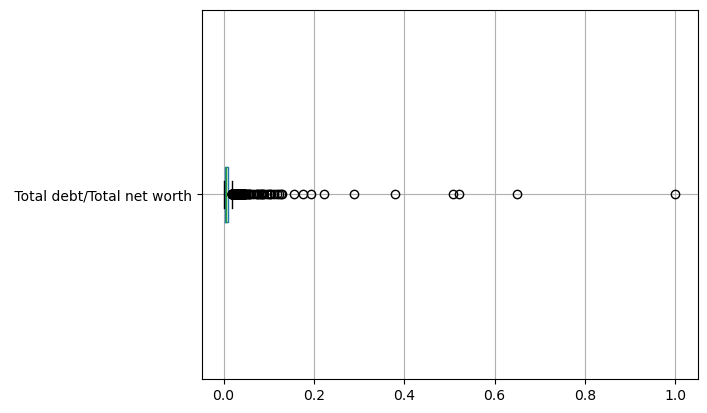

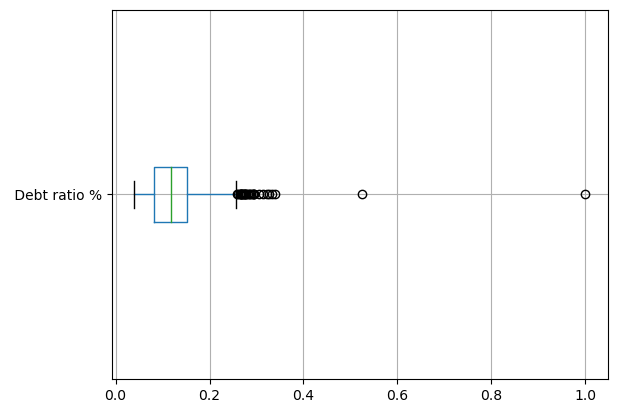

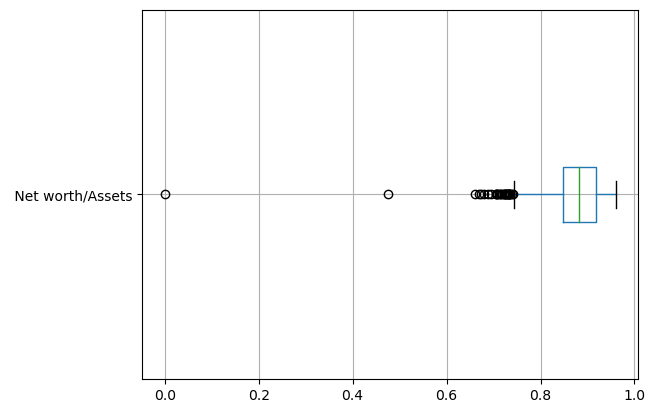

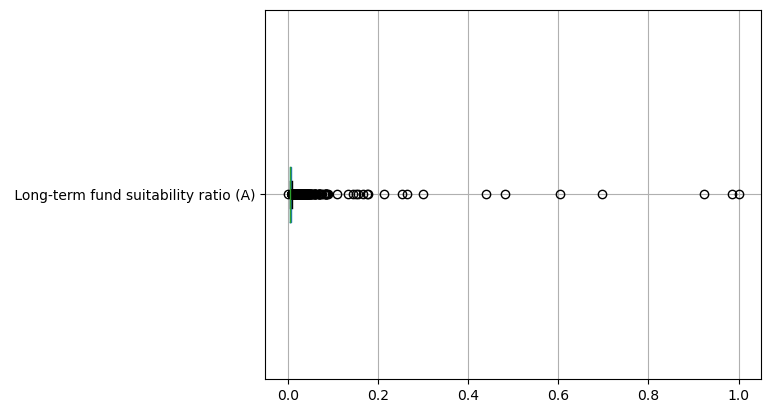

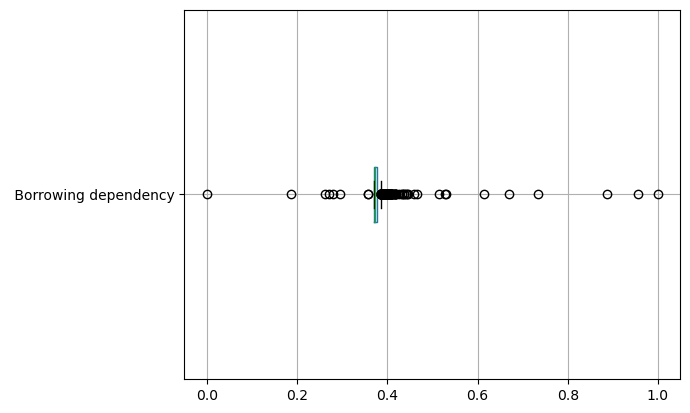

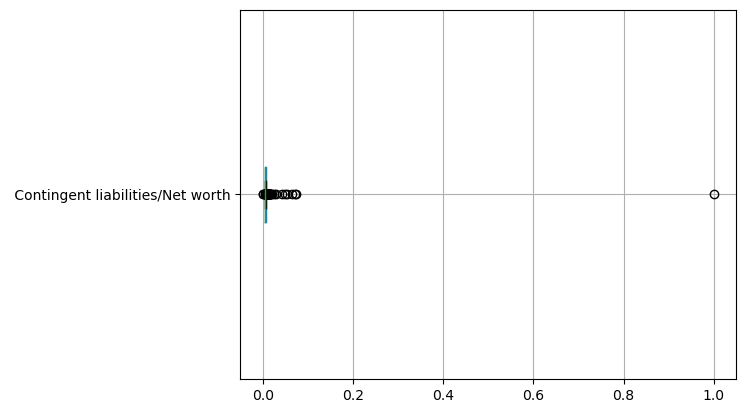

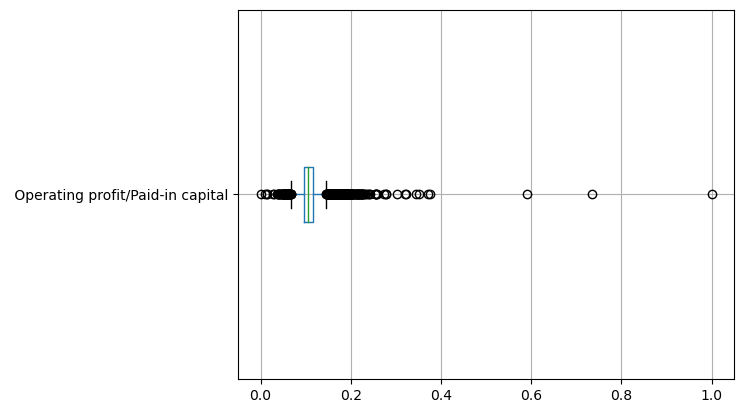

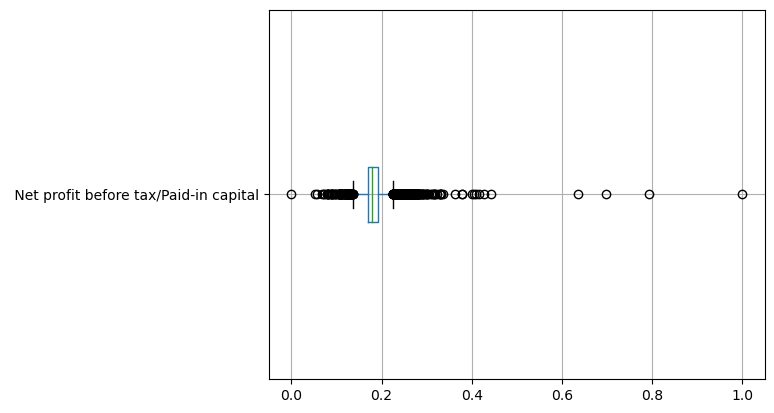

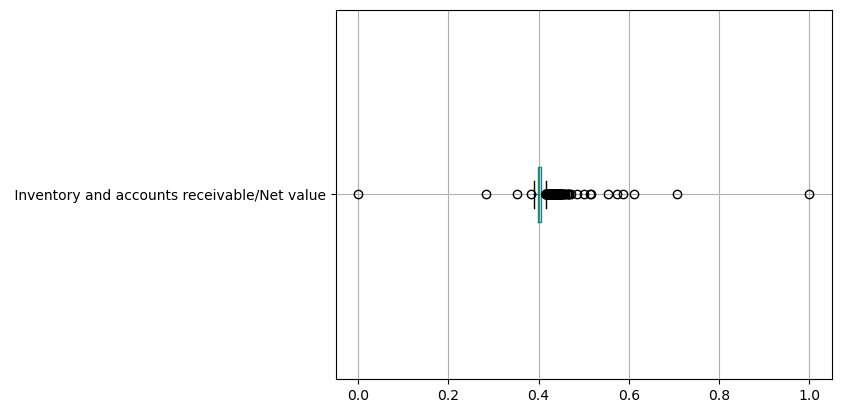

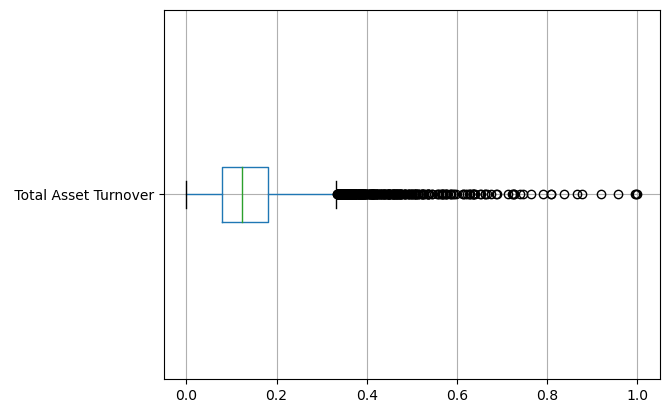

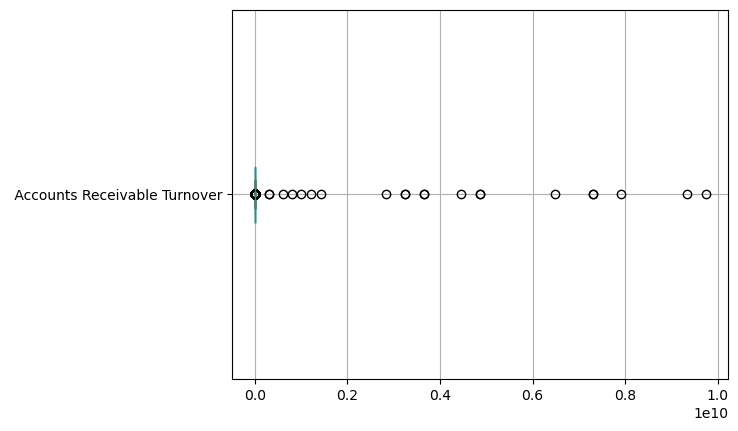

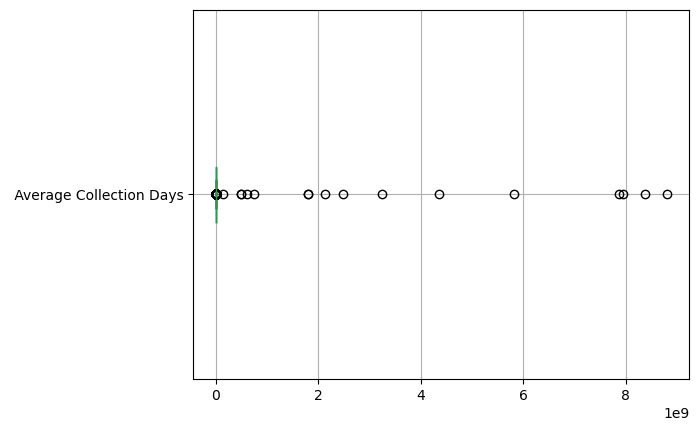

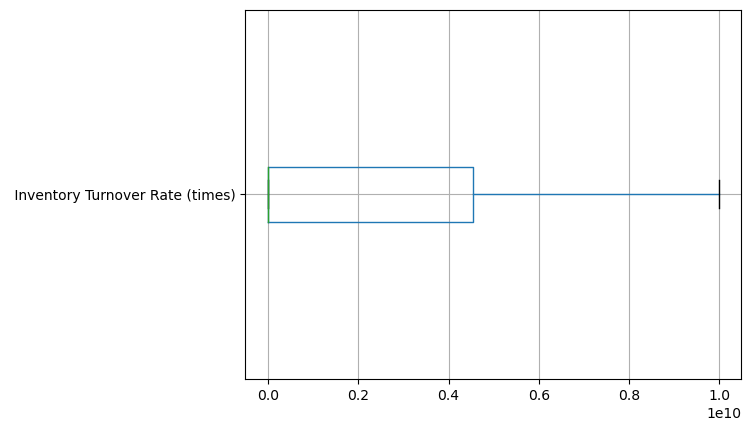

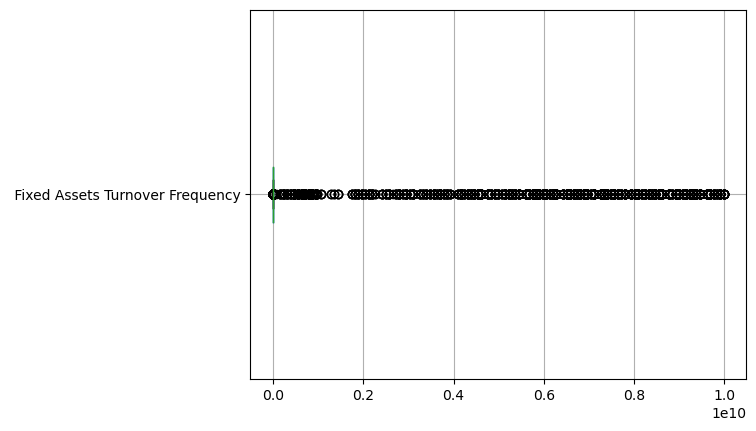

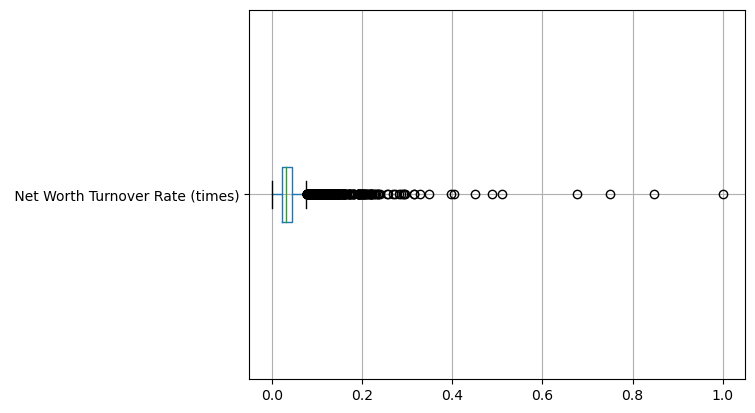

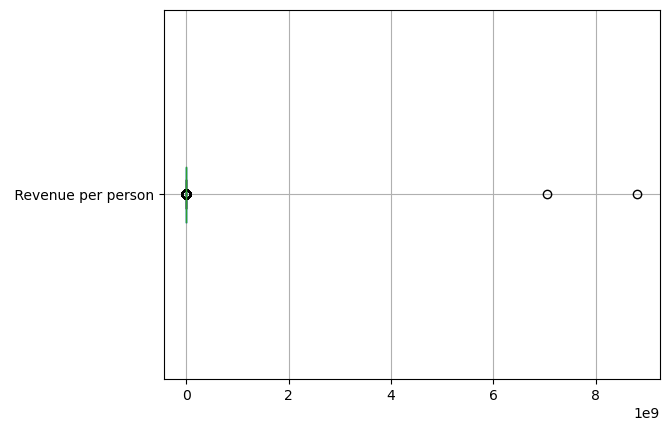

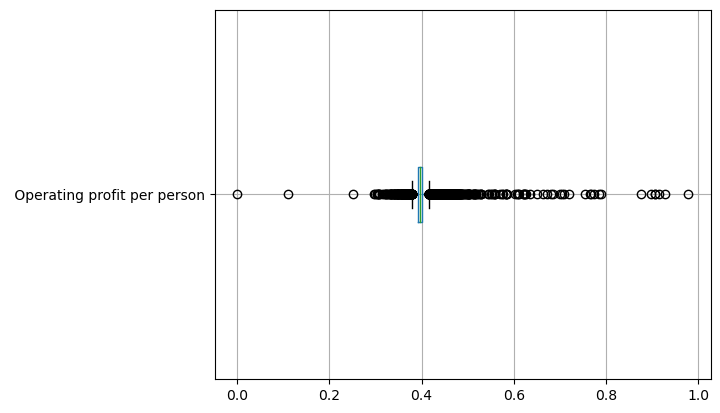

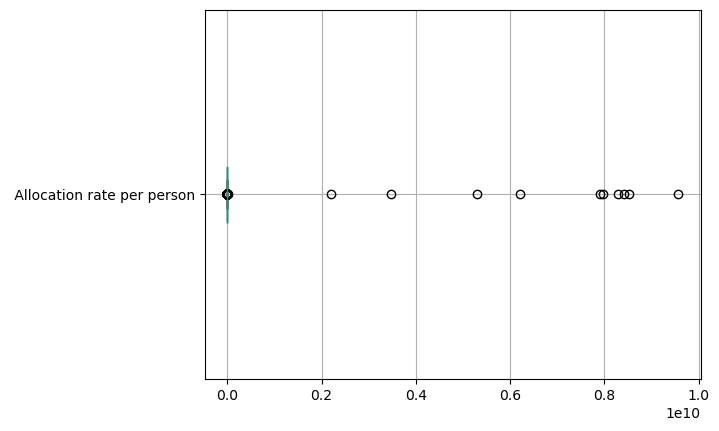

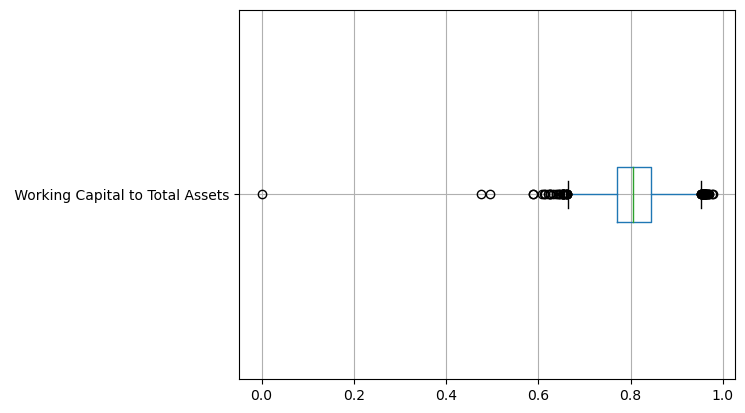

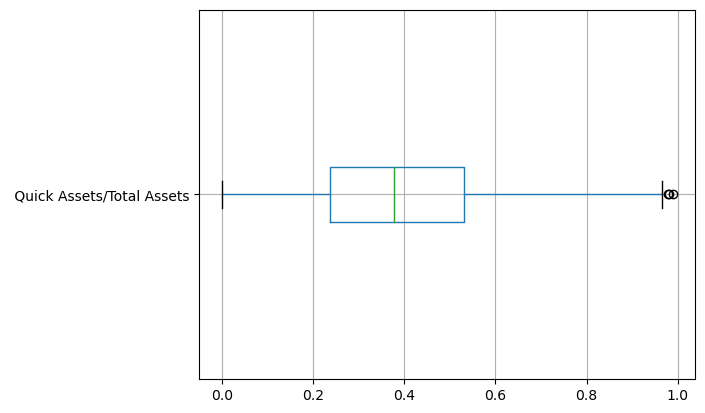

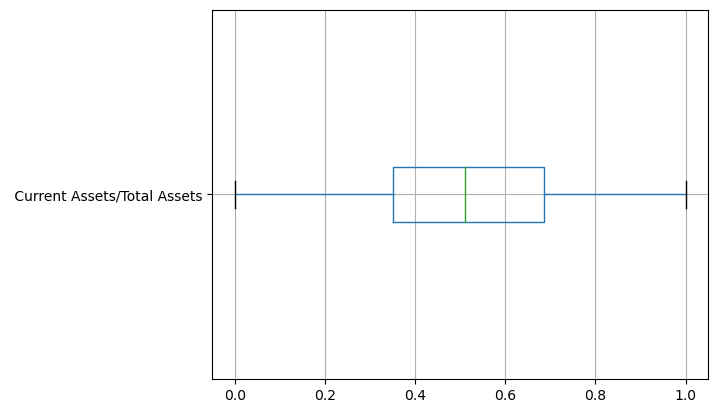

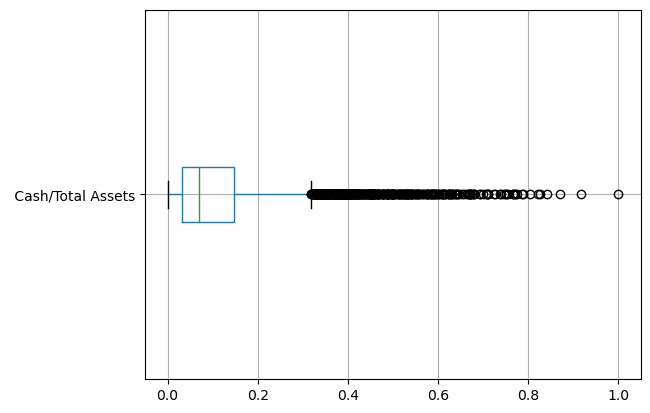

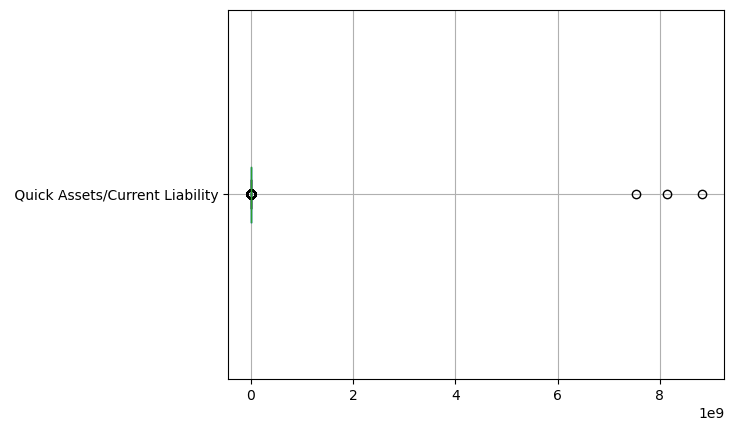

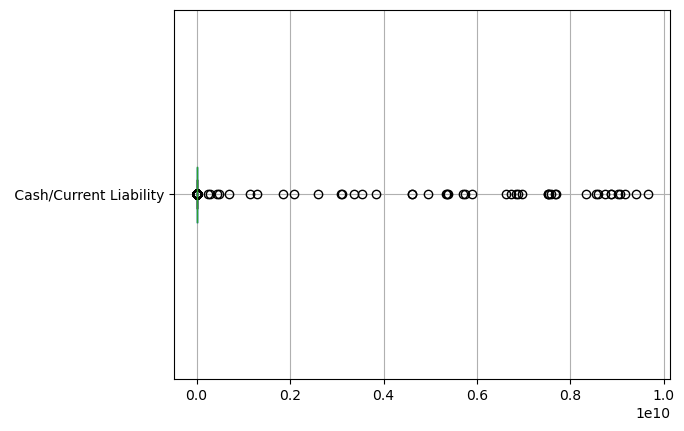

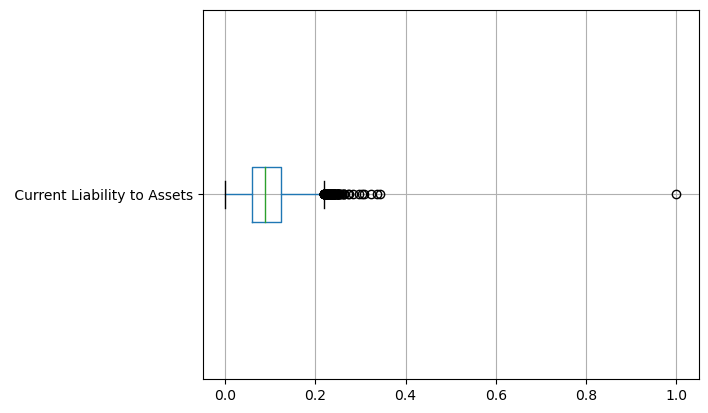

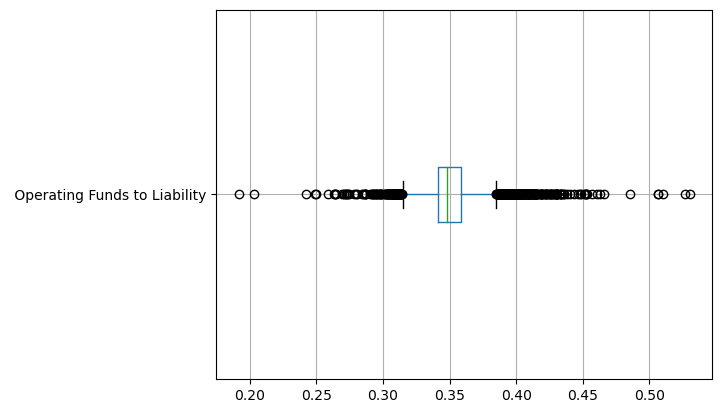

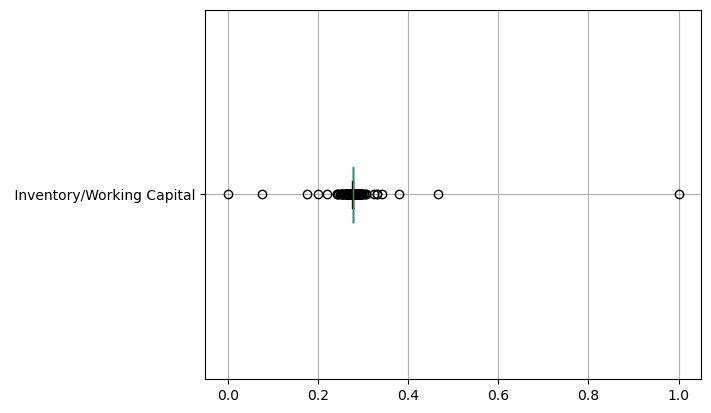

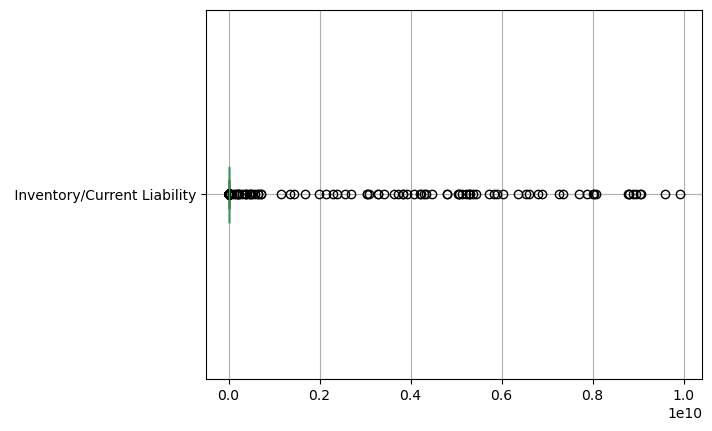

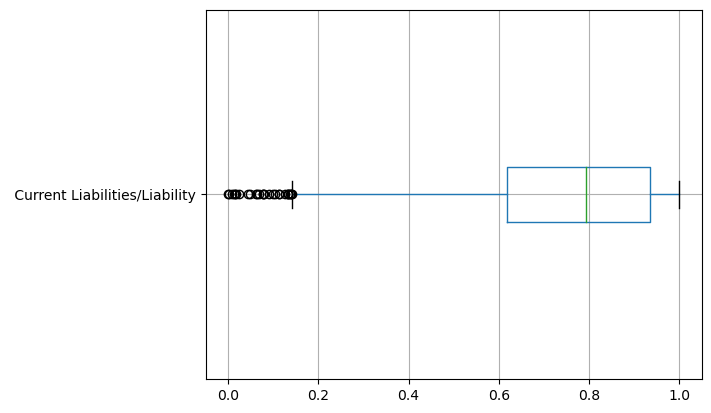

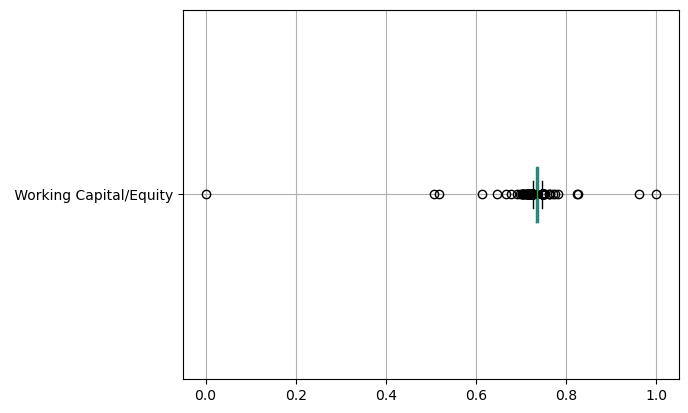

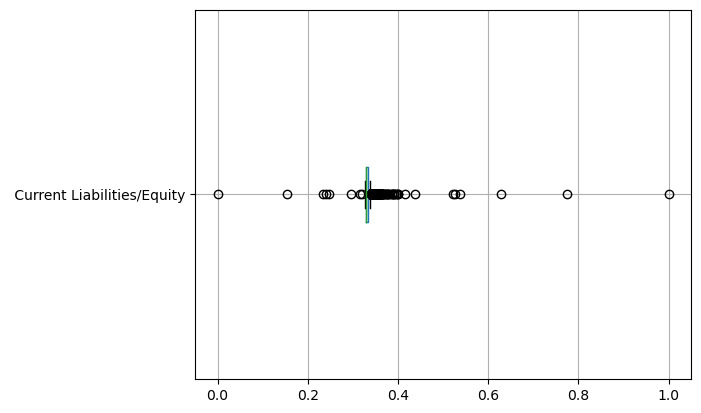

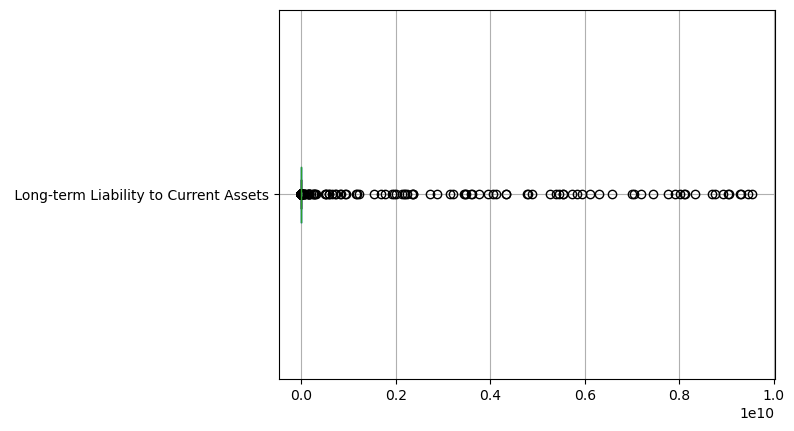

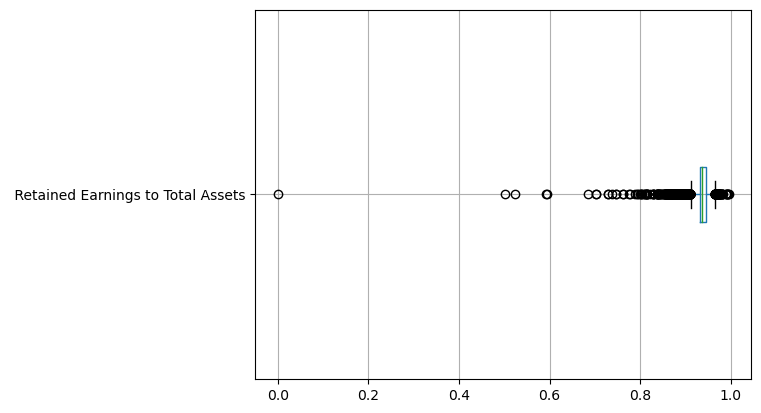

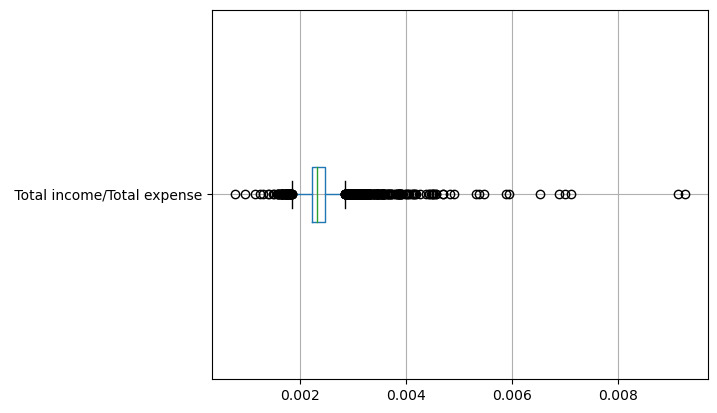

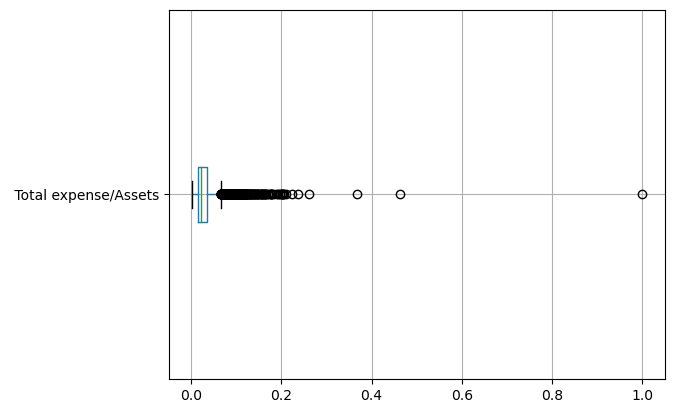

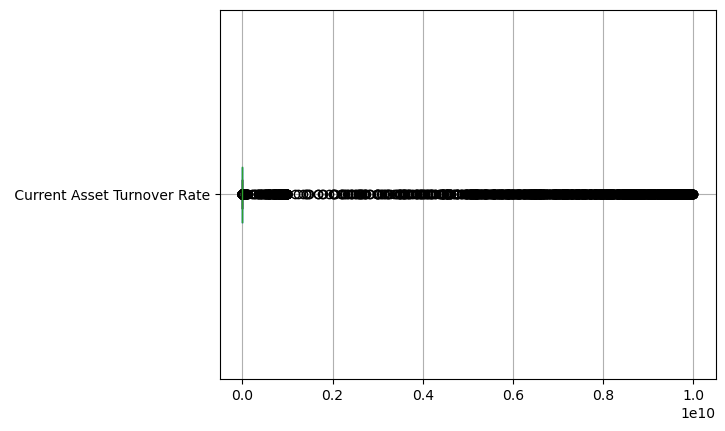

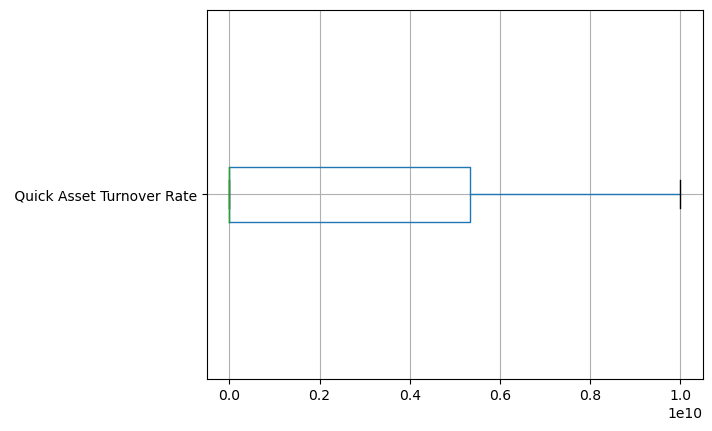

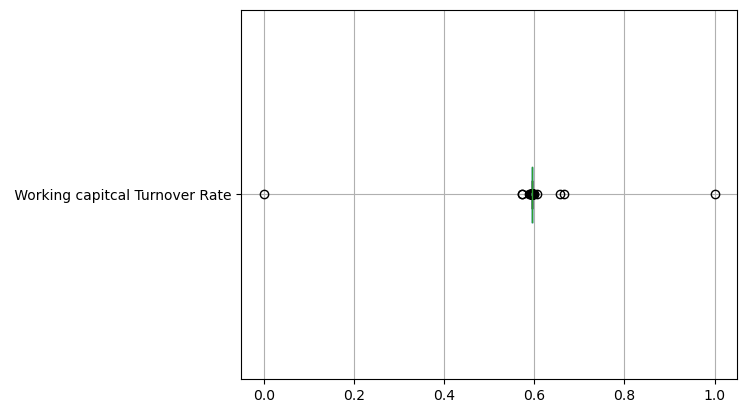

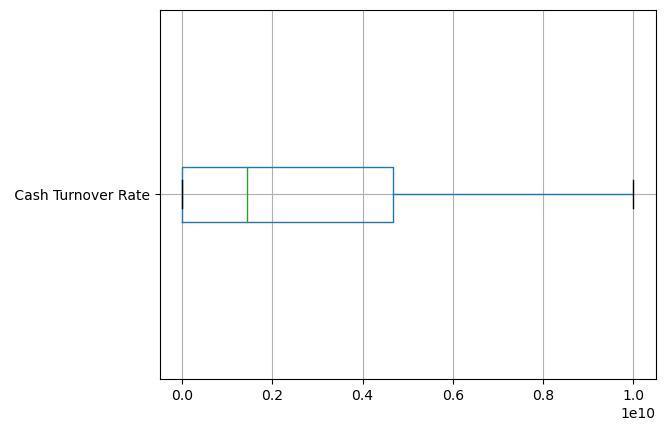

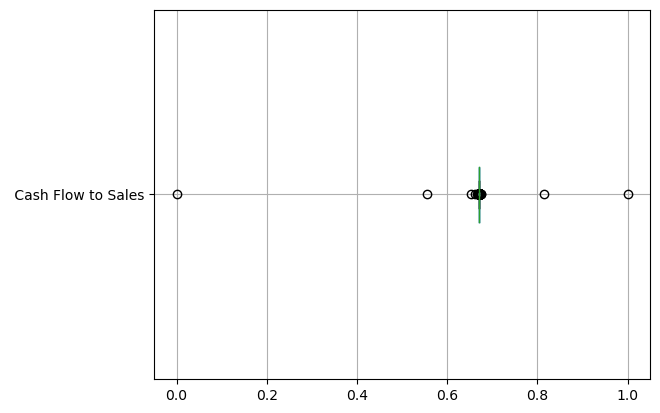

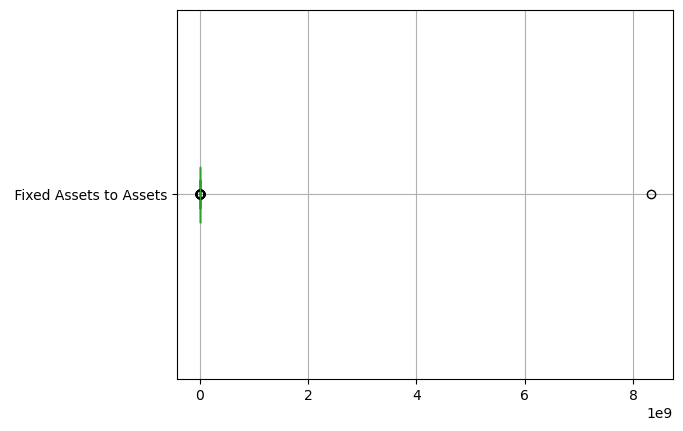

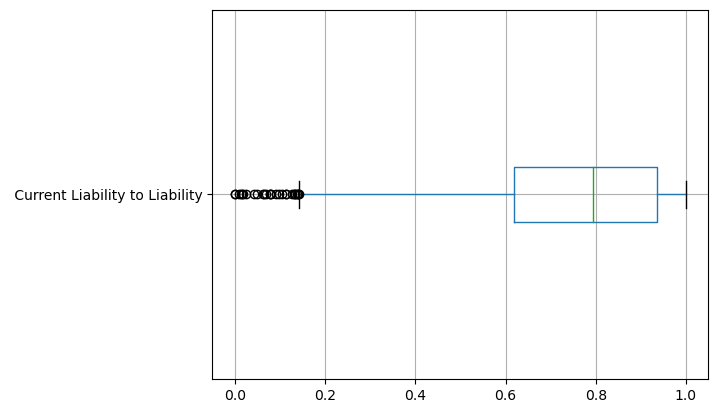

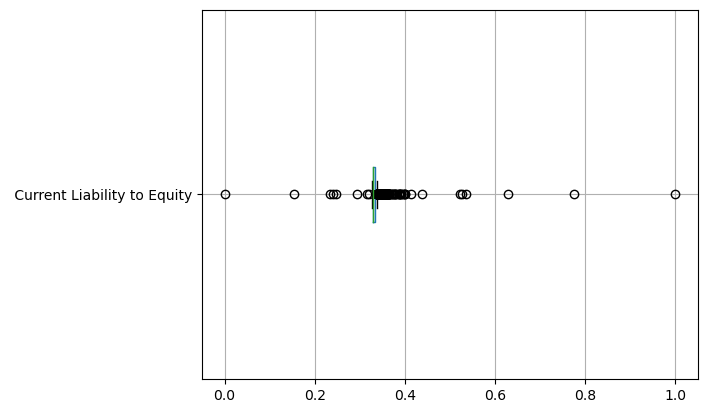

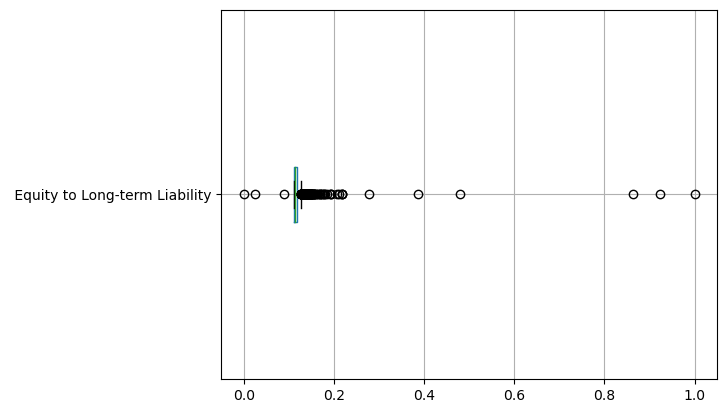

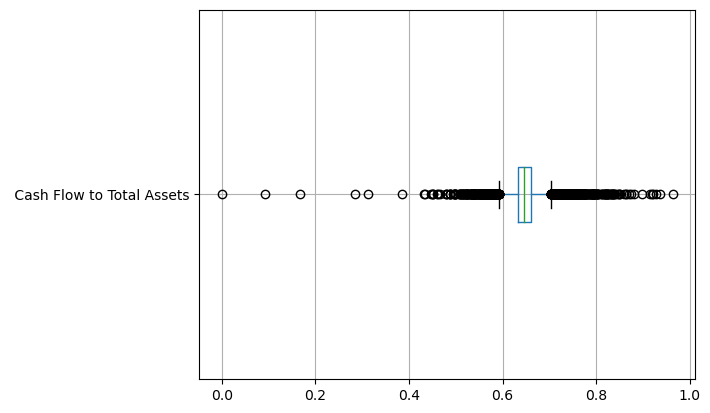

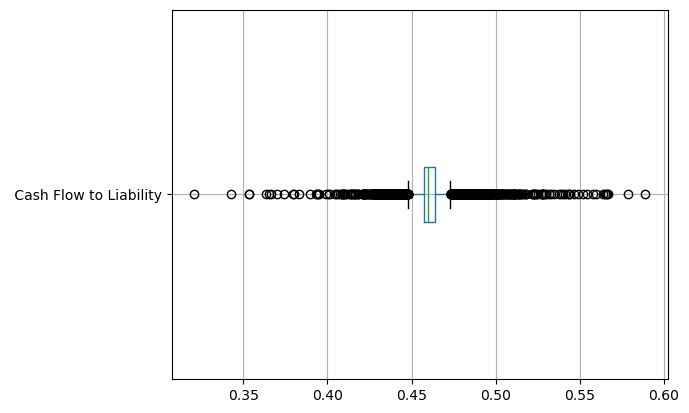

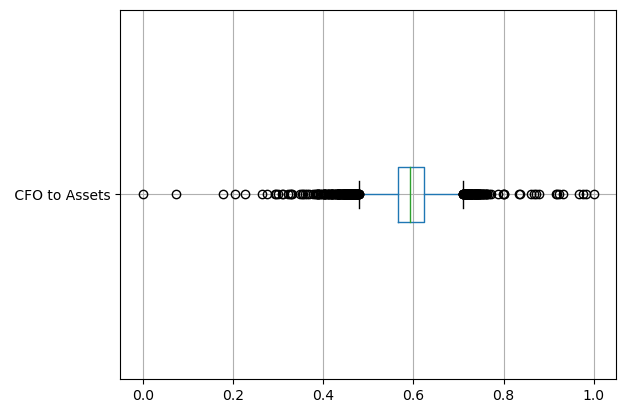

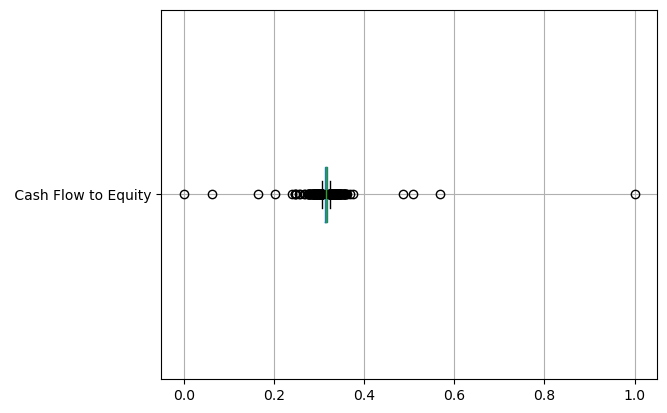

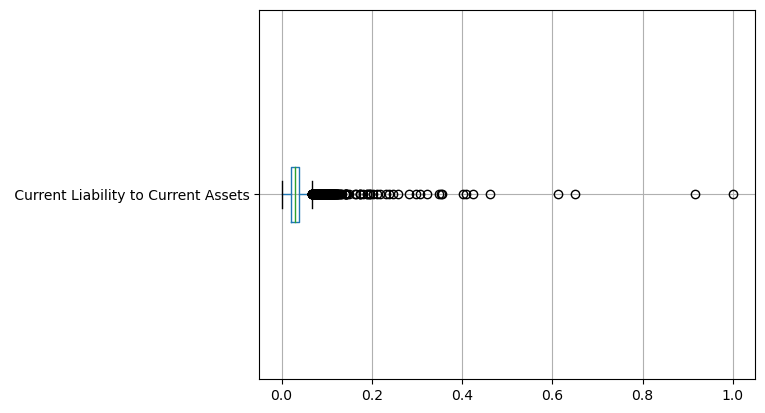

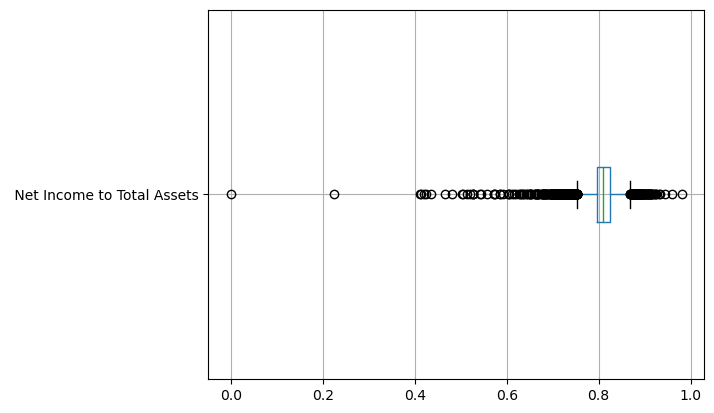

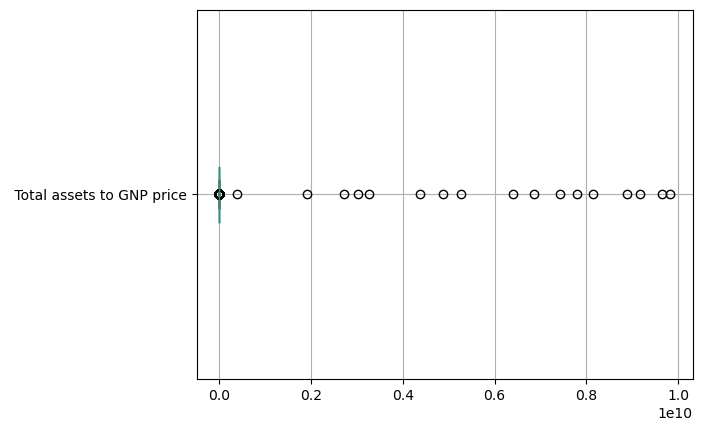

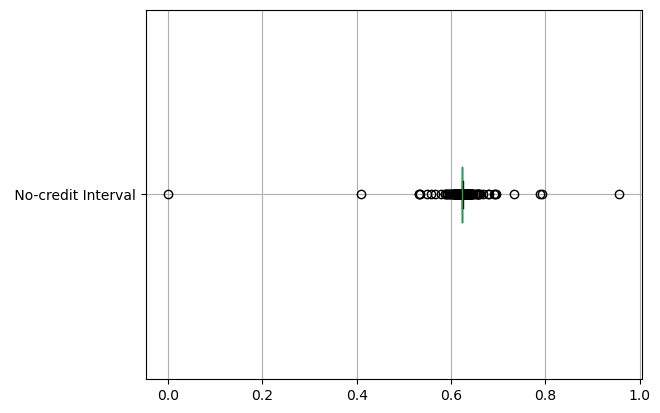

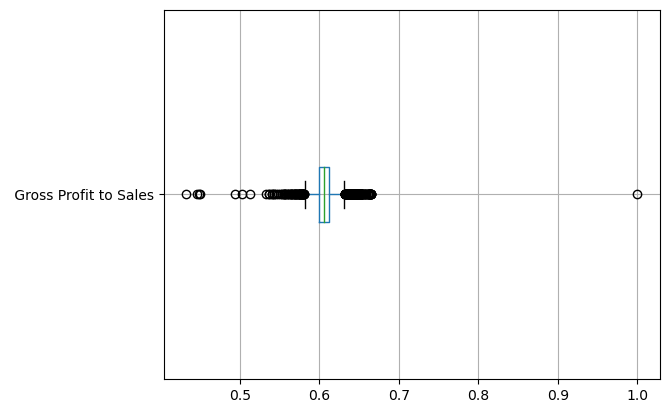

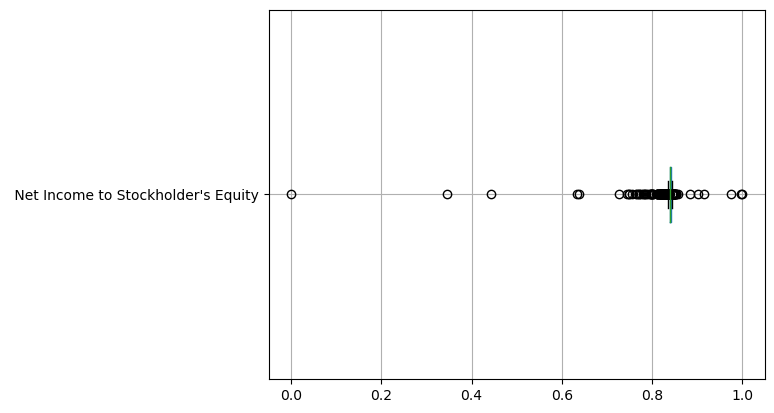

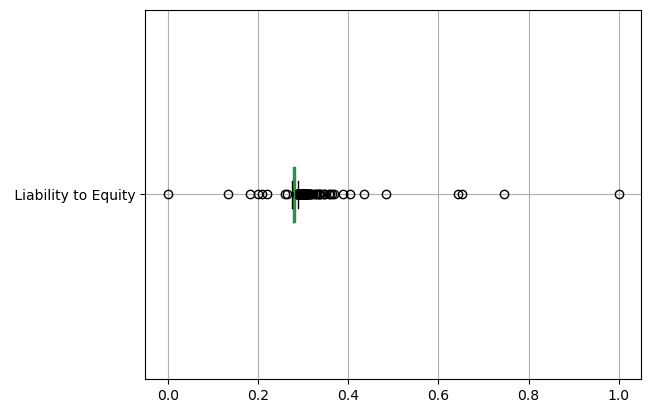

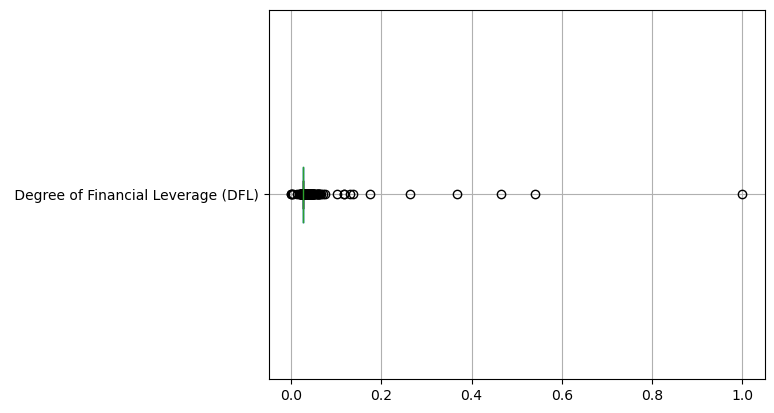

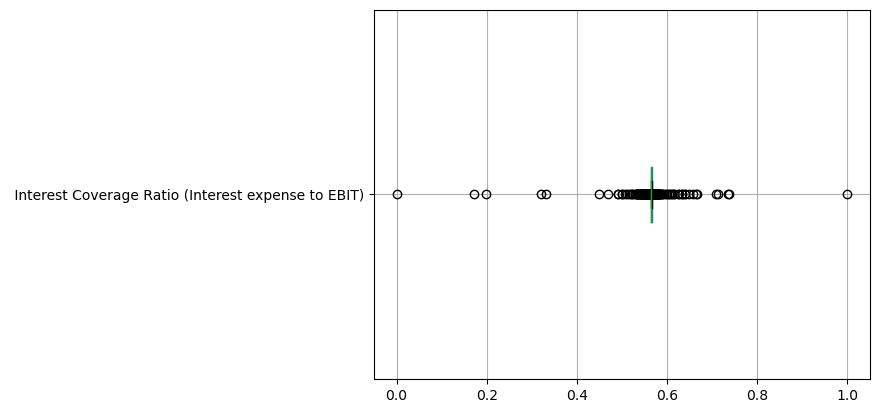

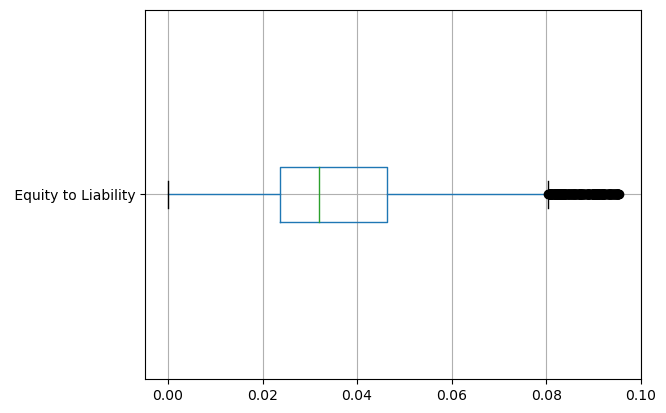

In [25]:
def box_plot(df,feature):
    df.boxplot(column=[feature],vert=0)
    plt.show()
    
for i in range(0,x1.shape[1]):
    box_plot(x1,features_x[i])

### This approach removes 6819-6270 = 549 rows which leads to the loss of around 10% of records
### Hence Removing outliers is not recommended for this dataset

## Case 2) Ignoring outliers
* Around 10% of data is outliers and ignoring them will have an impact on performance of ML models.
* Hence ignoring outliers may not be the right choice of outlier handling

## Case 3) Imputing outliers using IQR method

In [26]:
x2 = dataset.iloc[:,0:93]
x2.head()

ROA(C) before interest and depreciation before interest  \
0                                           0.370594          
1                                           0.464291          
2                                           0.426071          
3                                           0.399844          
4                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

    Continuous interest rate (after tax)  ...  \
0                               0.780985  ...   
1                               0.781506  ...   
2                               0.780284  ...   
3                               0.781241  ...   
4                               0.781550  ...   

    Current Liability to Current Assets   Net Income to Total Assets  \
0                              0.118250                     0.716845   
1                              0.047775                     0.795297   
2                              0.025346                     0.774670   
3                              0.067250                     0.739555   
4                              0.047725                     0.795016   

    Total assets to GNP price   No-credit Interval   Gross Profit to Sales  \
0                    0.009219             0.622879                0.601453   
1                    0.008323             0.623652                0.610237   
2                    0.040003             0.623841                0.601449   
3                    0.003252             0.622929                0.583538   
4                    0.003878             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                     

In [27]:
for feature in features_x:
    Q1 = x2[feature].quantile(0.25)
    Q3 = x2[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3+1.5*IQR
    lower_bound = Q1-1.5*IQR
    x2.loc[x2[feature]>=upper_bound,feature]=upper_bound
    x2.loc[x2[feature]<=lower_bound,feature]=lower_bound   

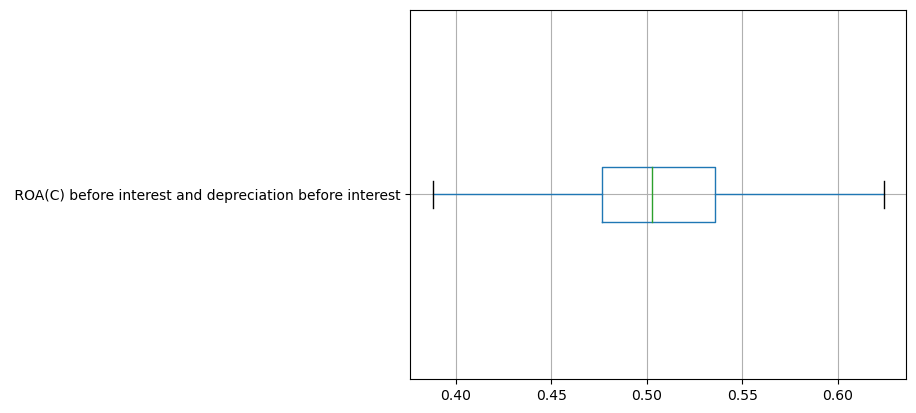

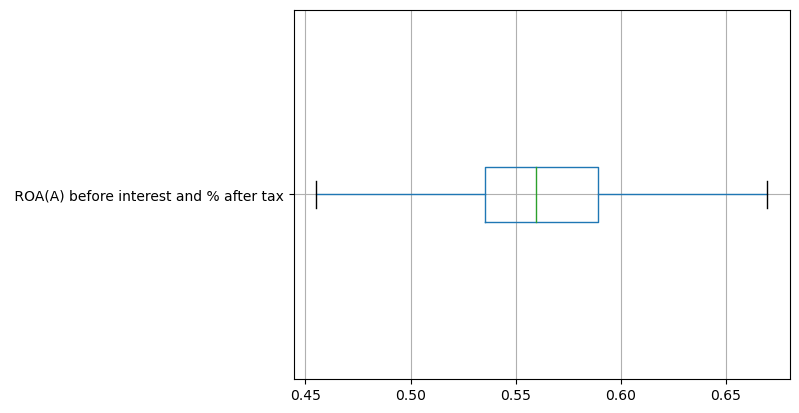

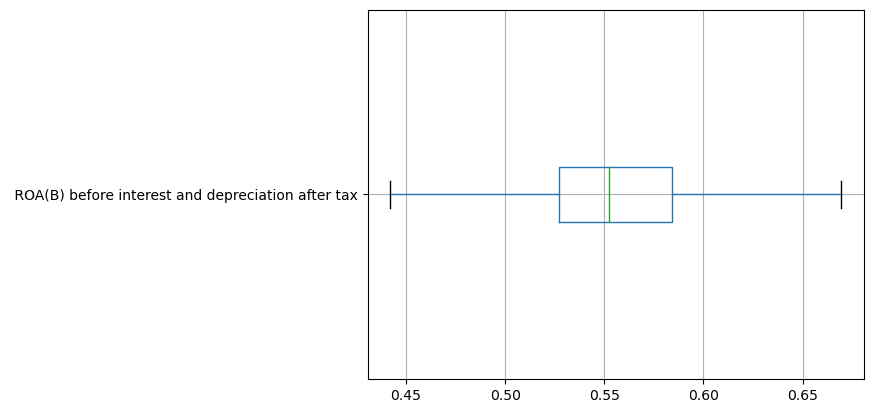

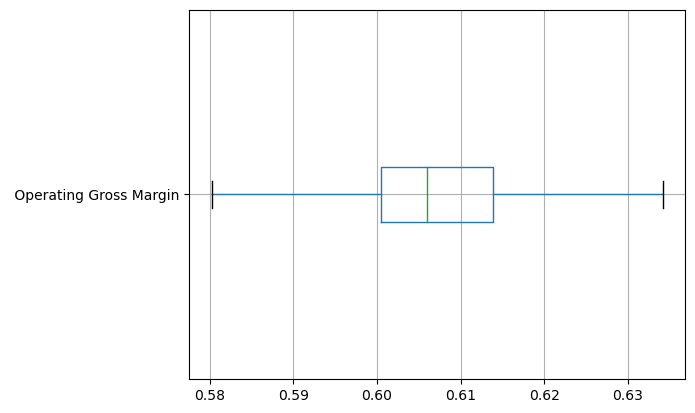

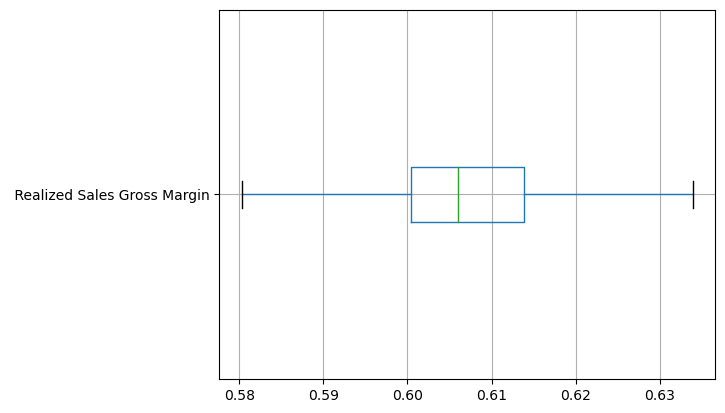

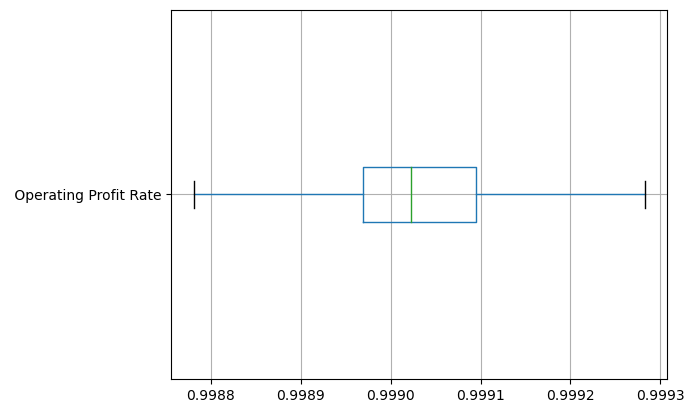

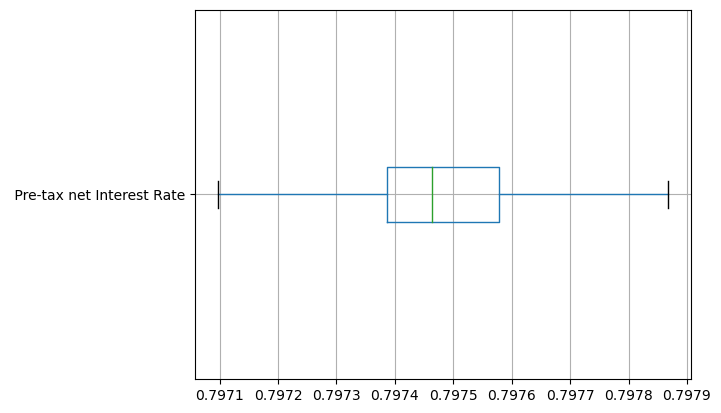

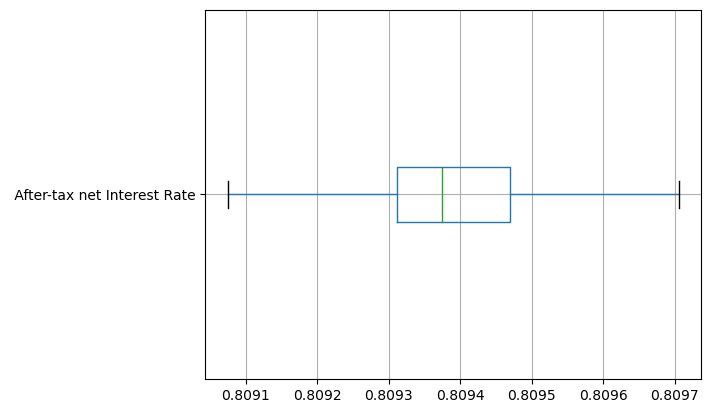

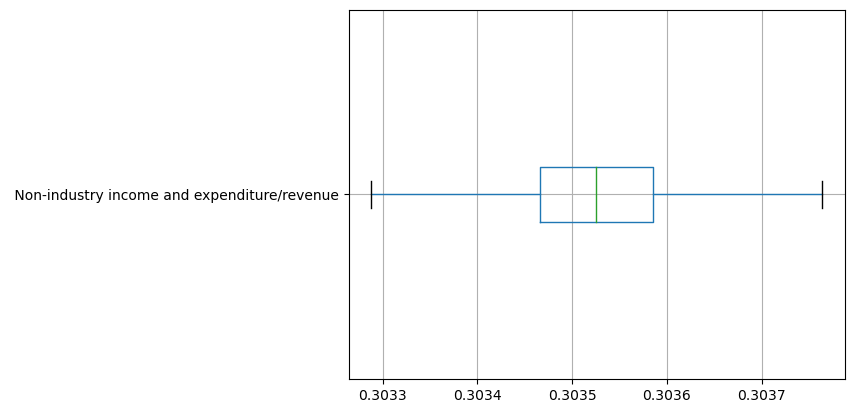

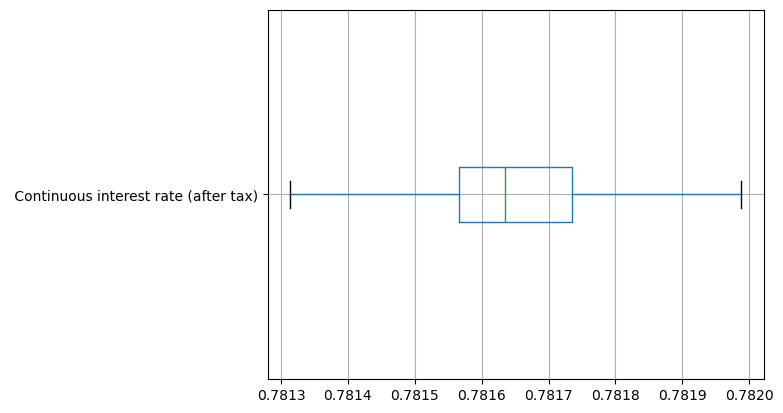

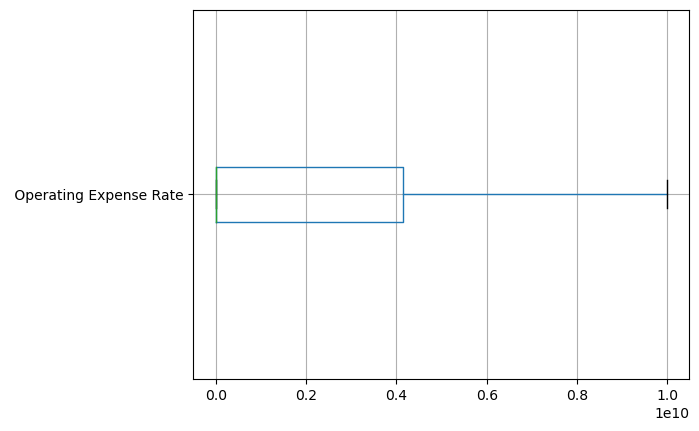

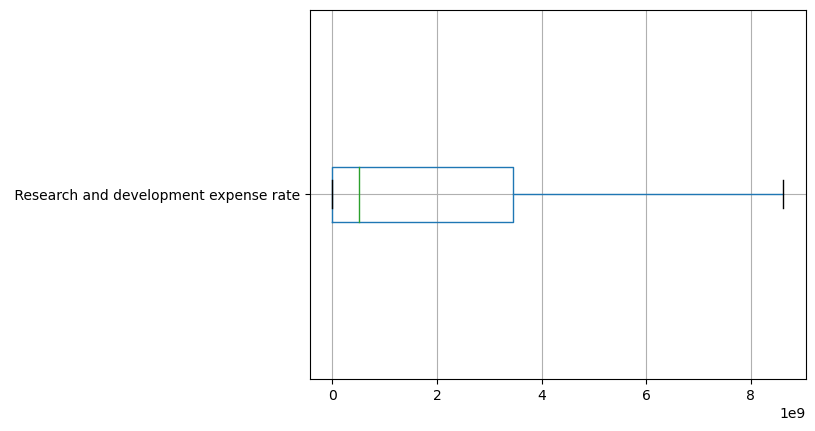

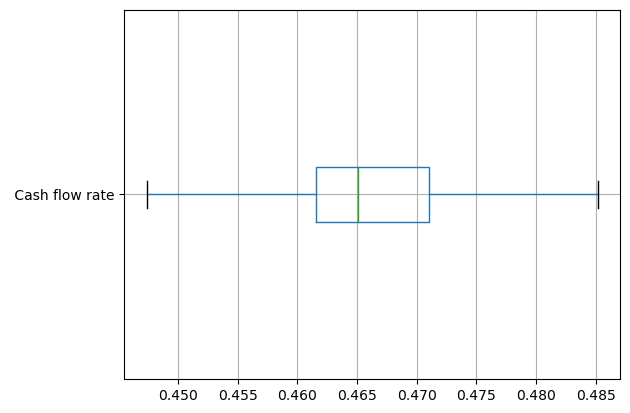

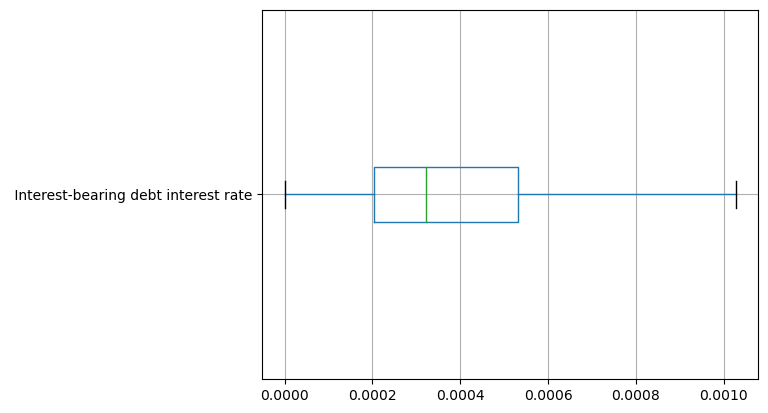

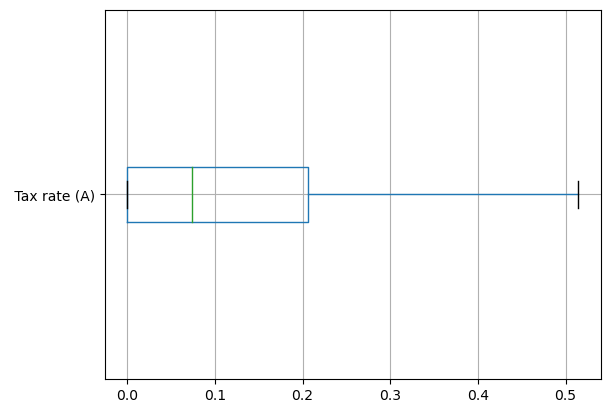

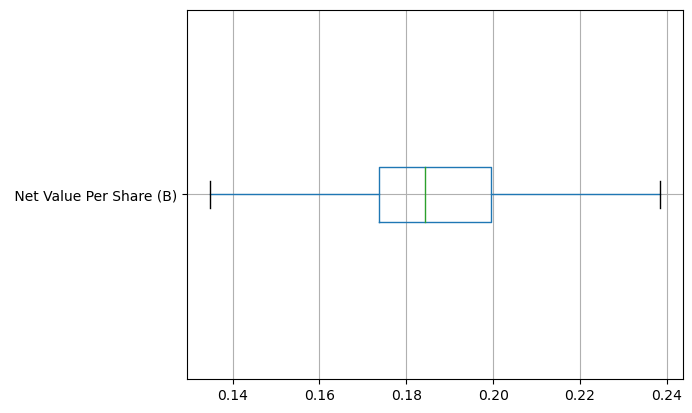

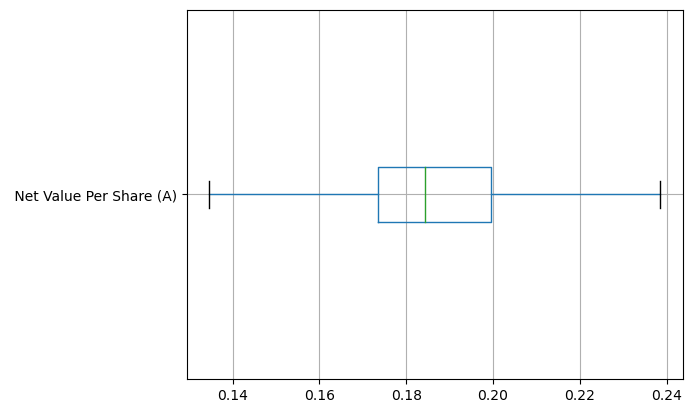

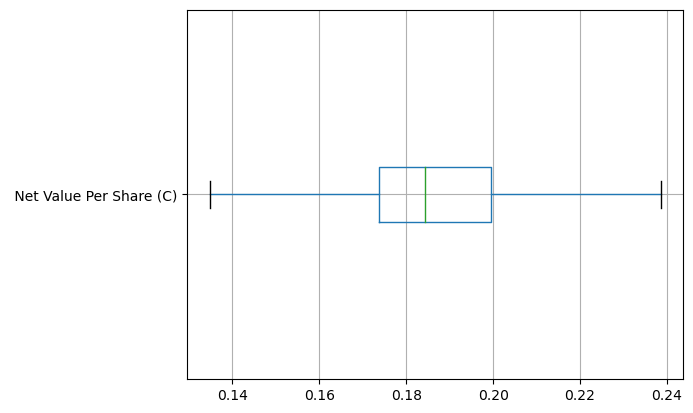

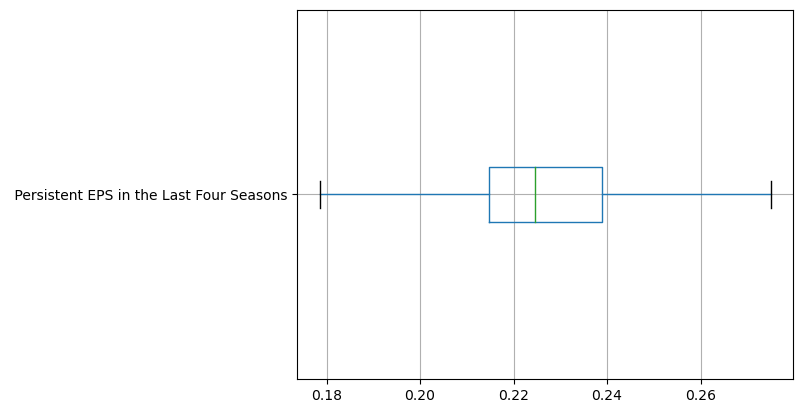

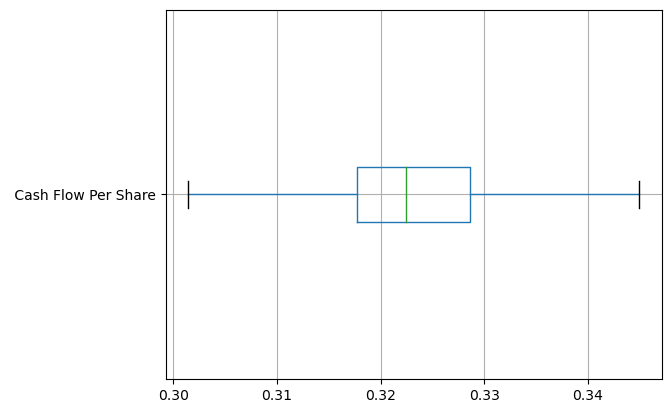

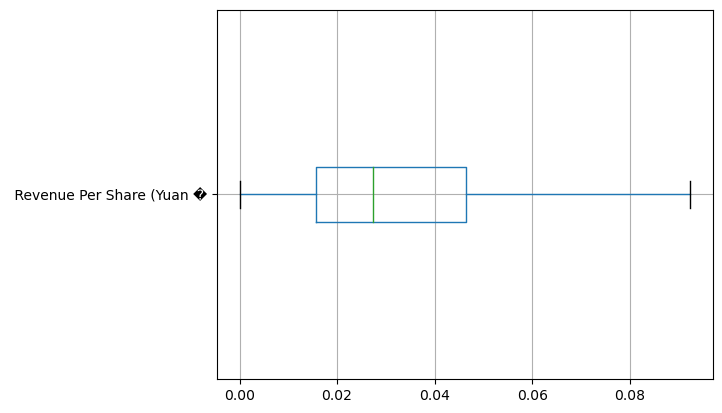

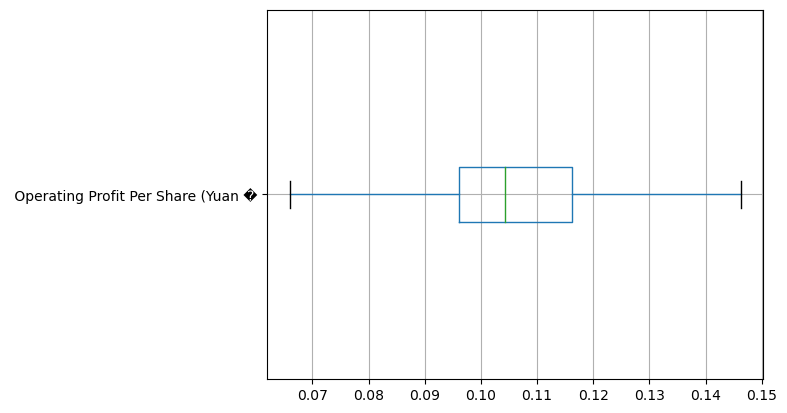

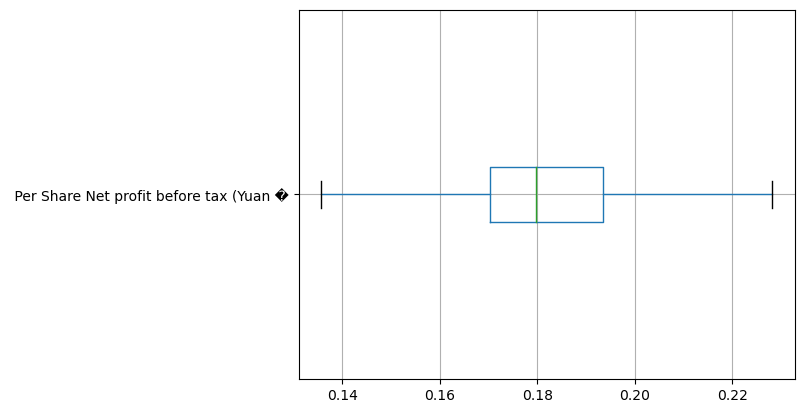

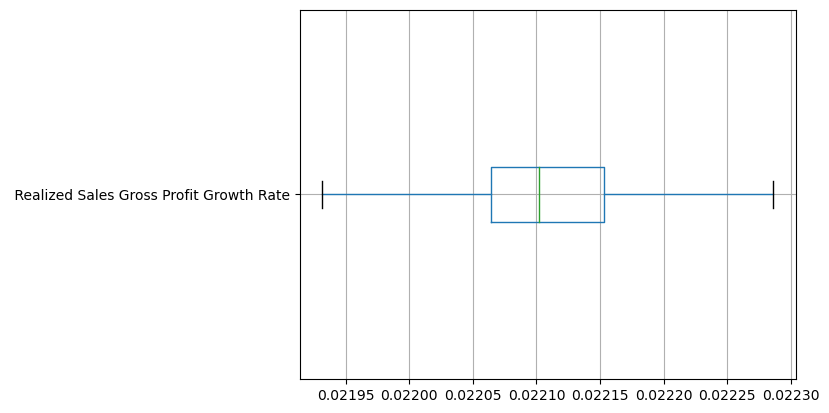

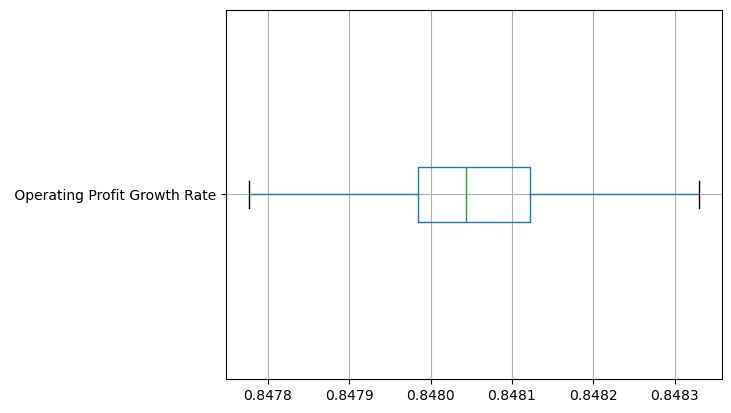

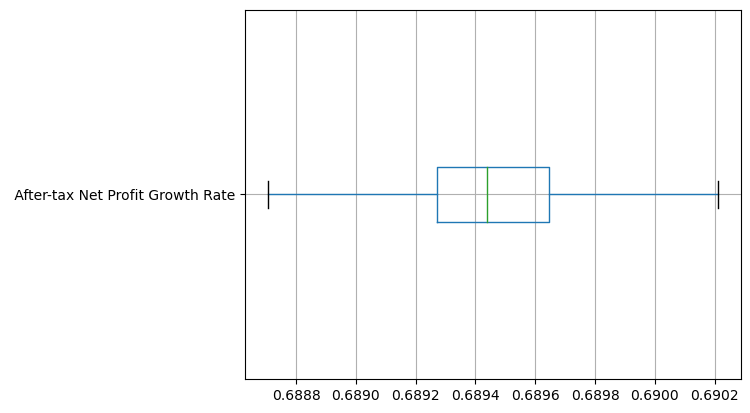

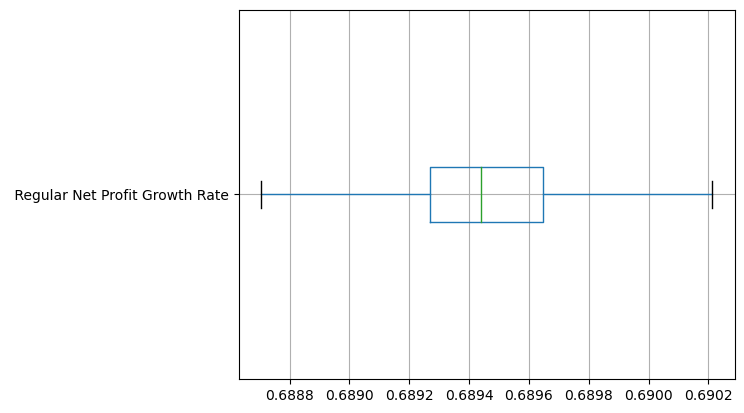

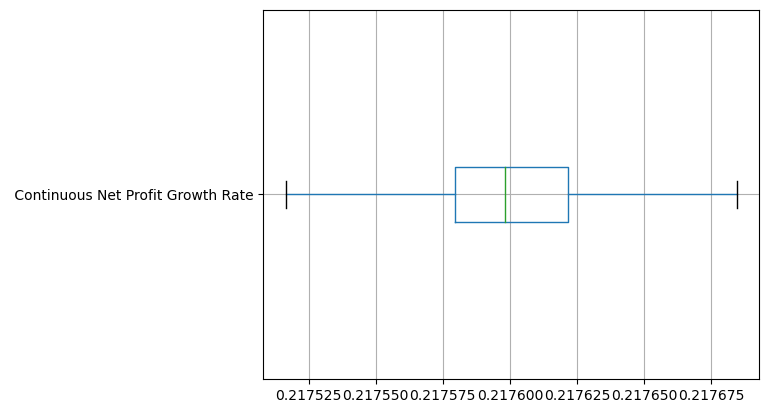

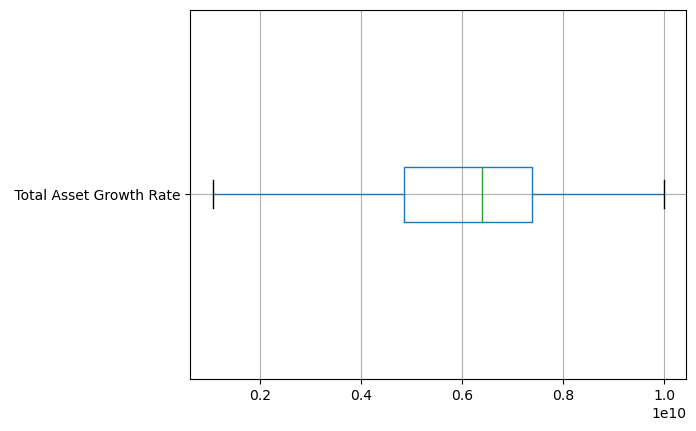

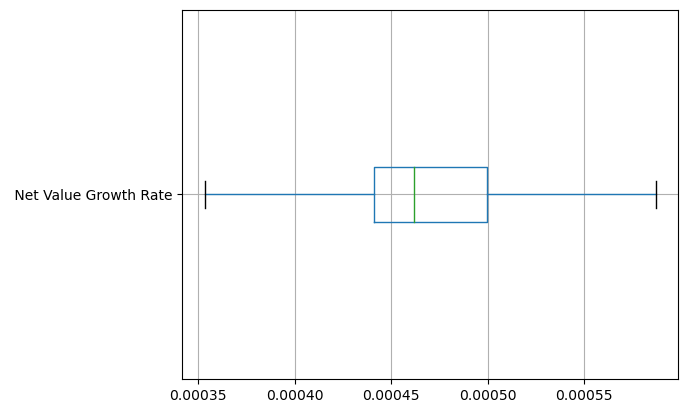

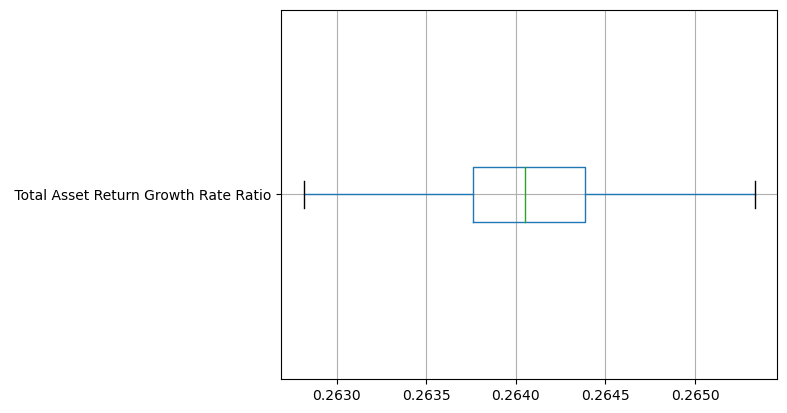

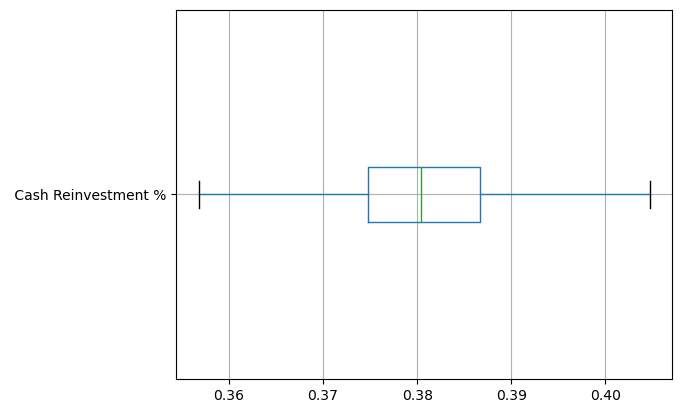

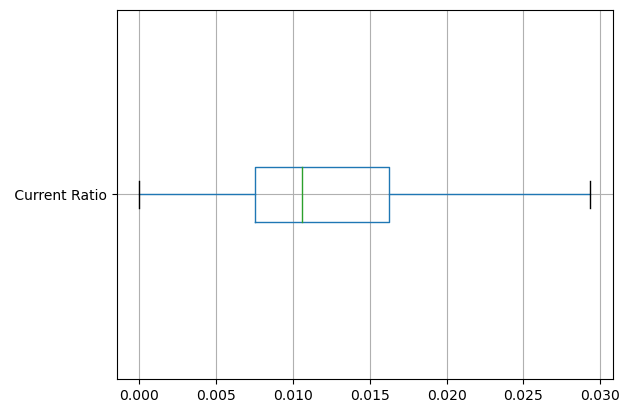

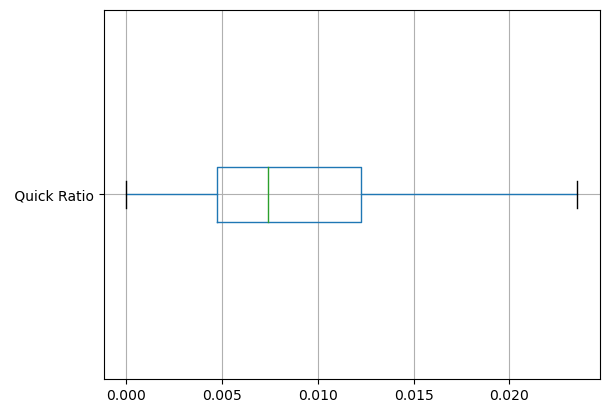

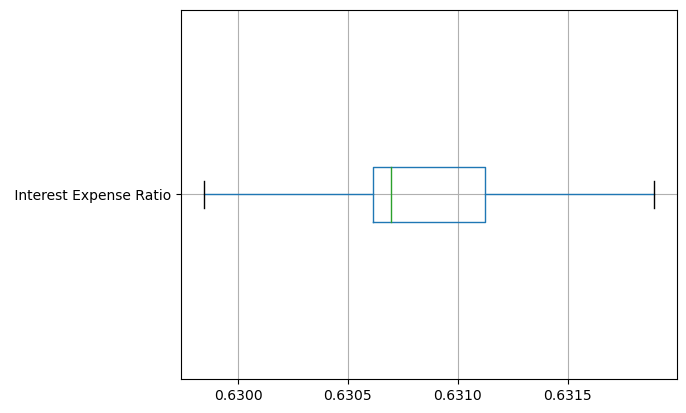

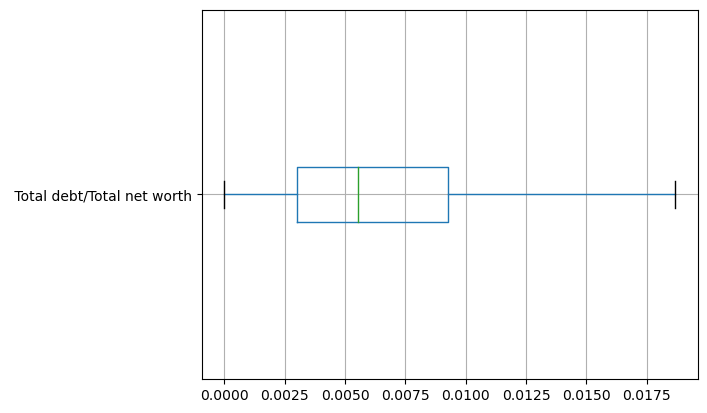

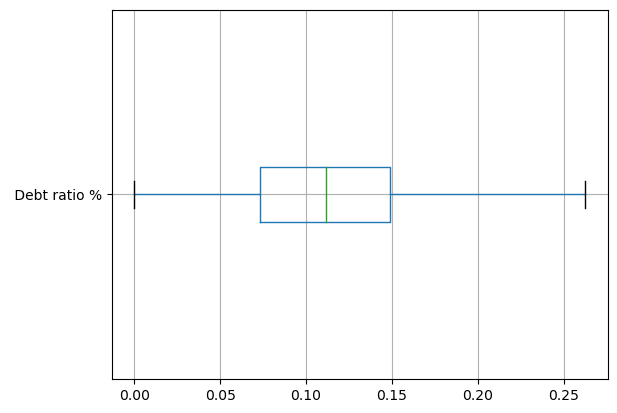

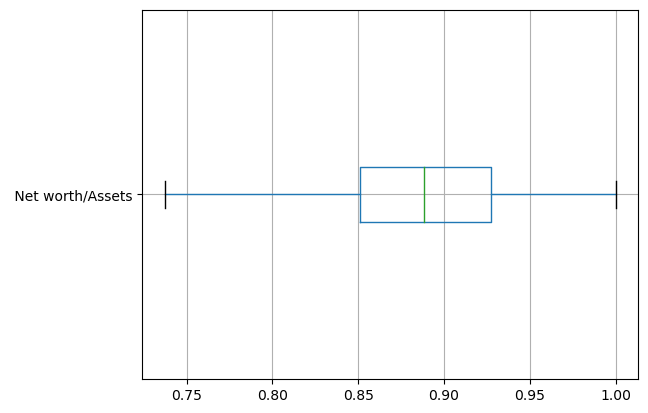

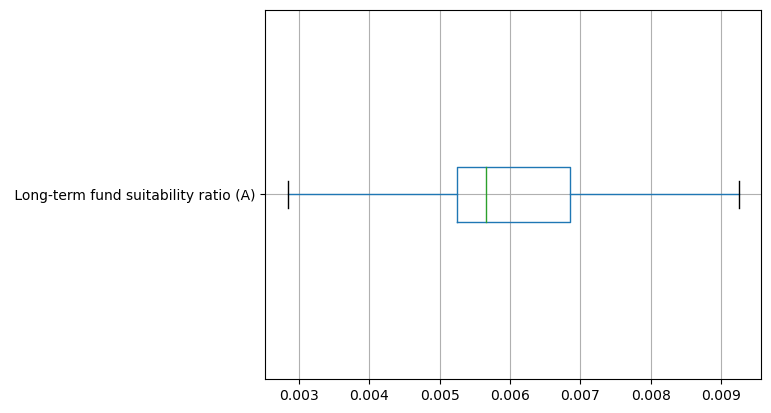

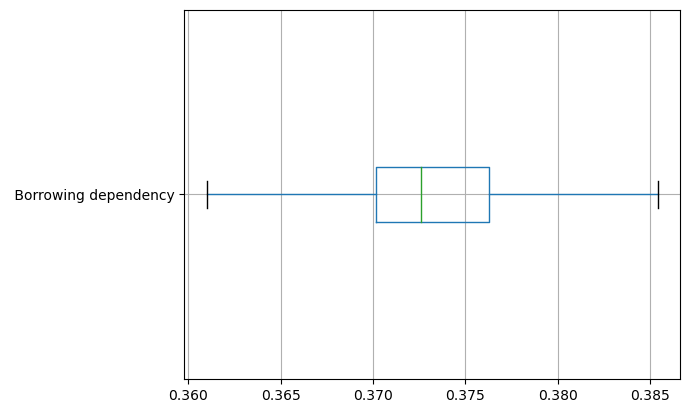

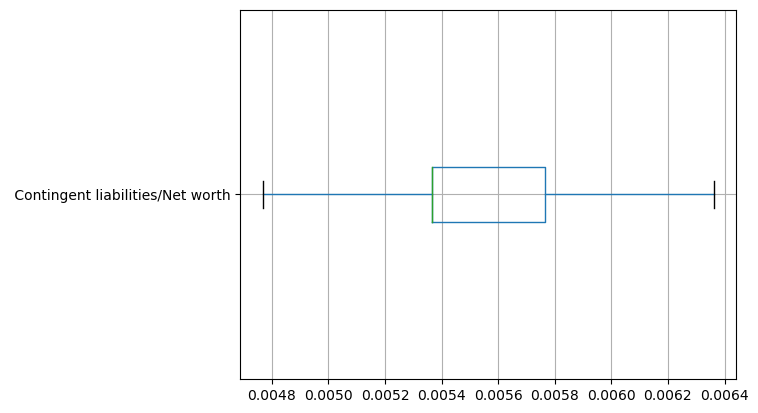

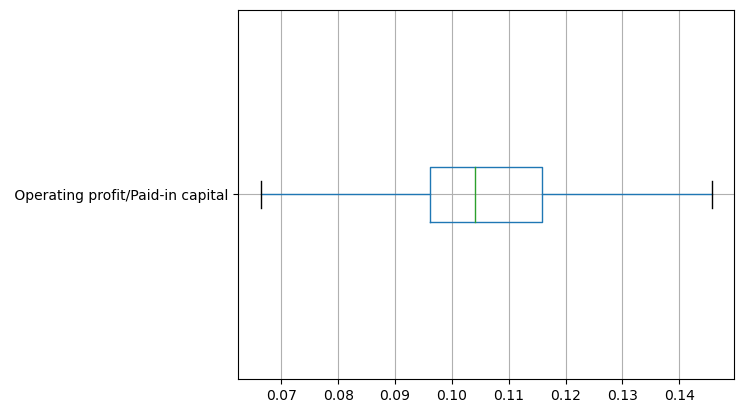

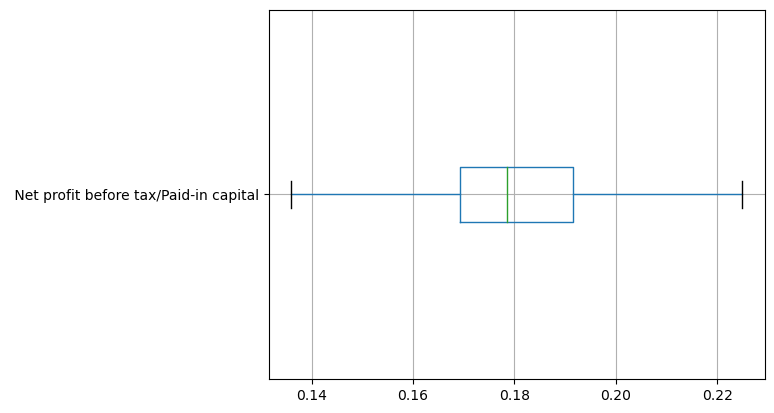

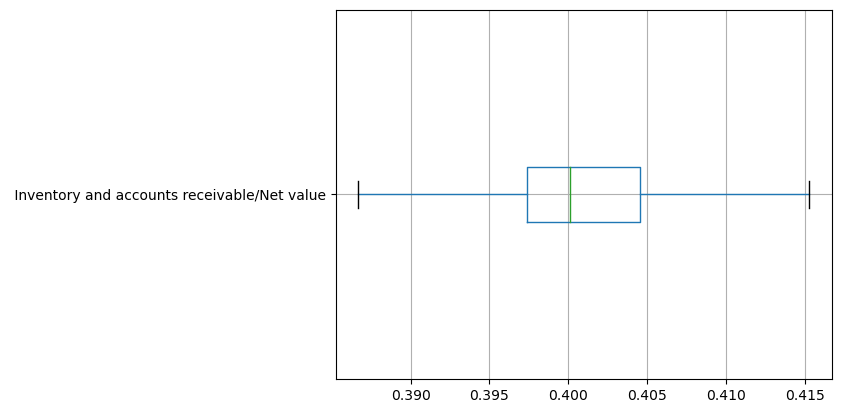

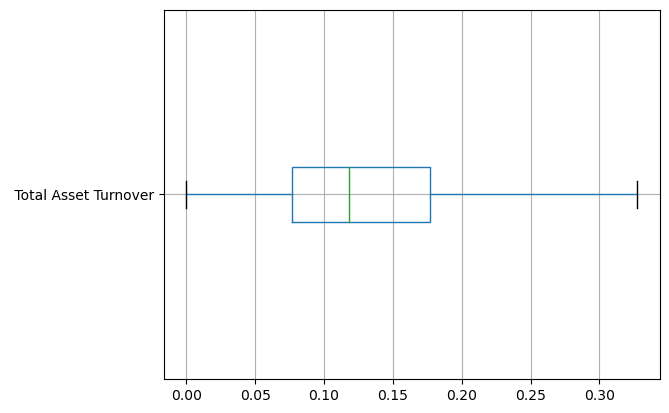

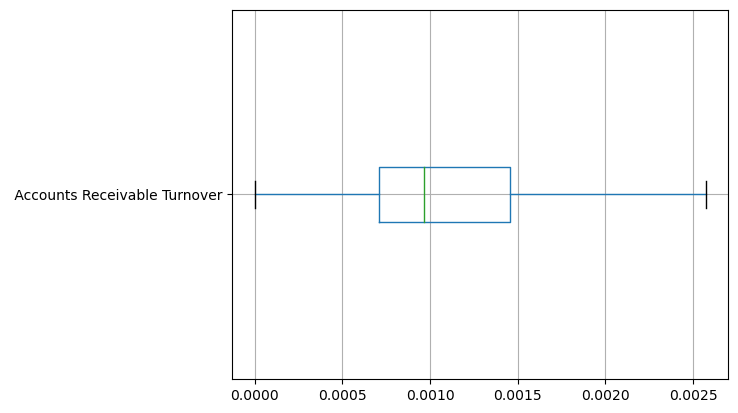

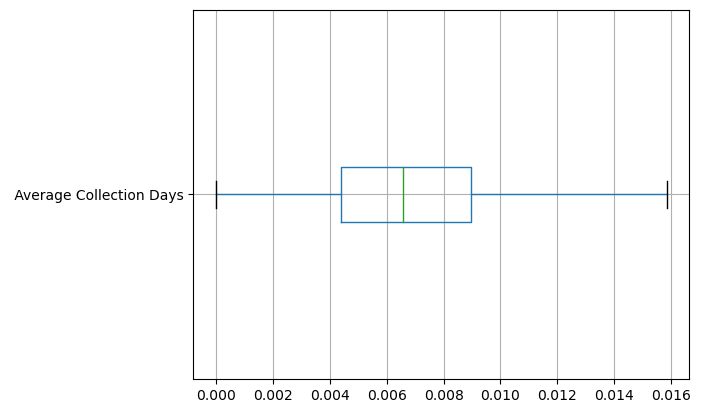

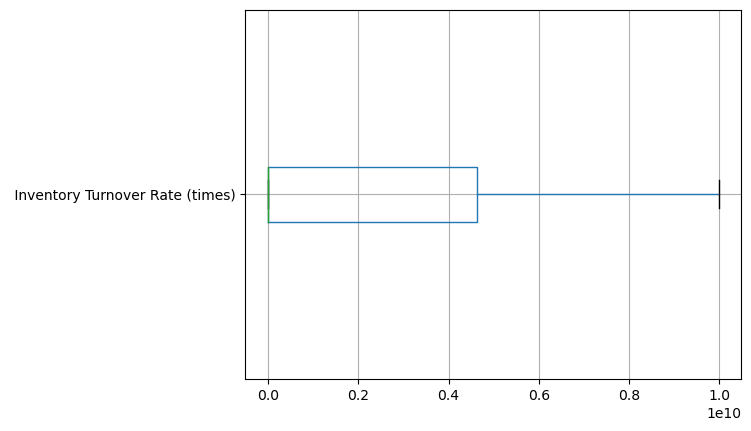

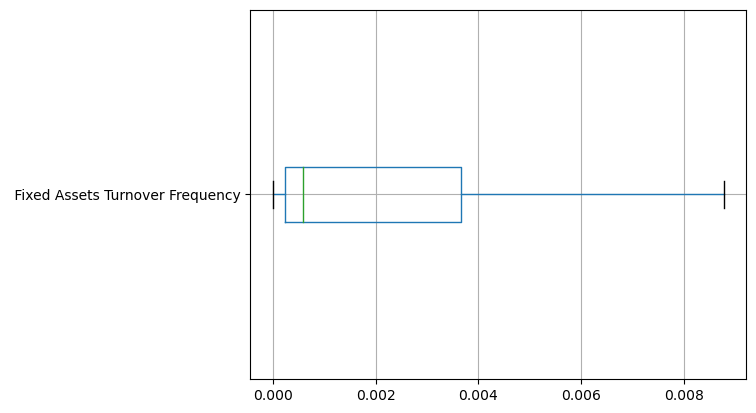

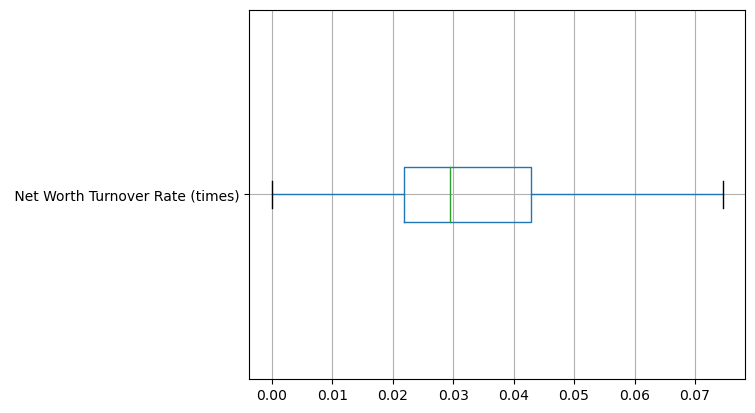

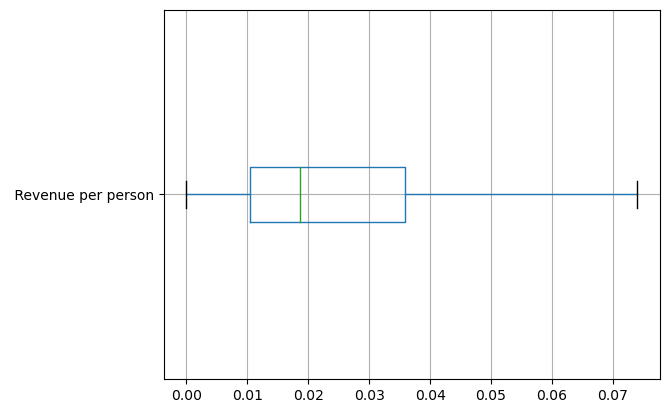

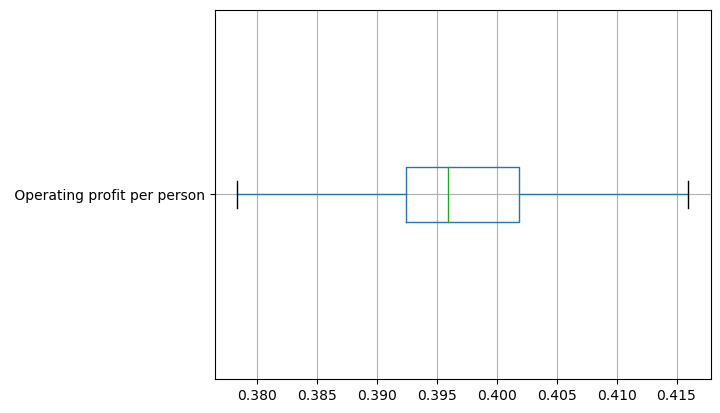

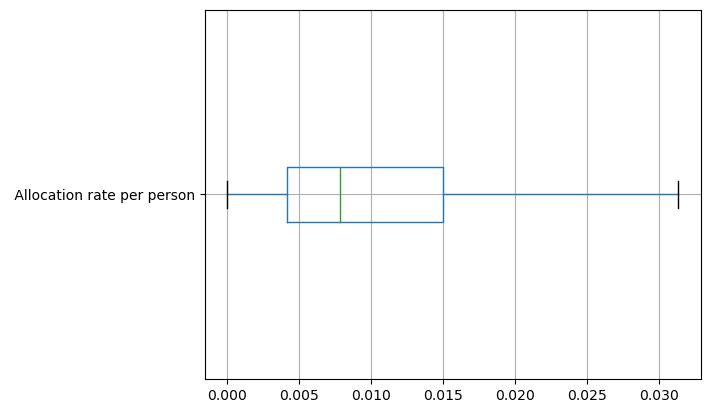

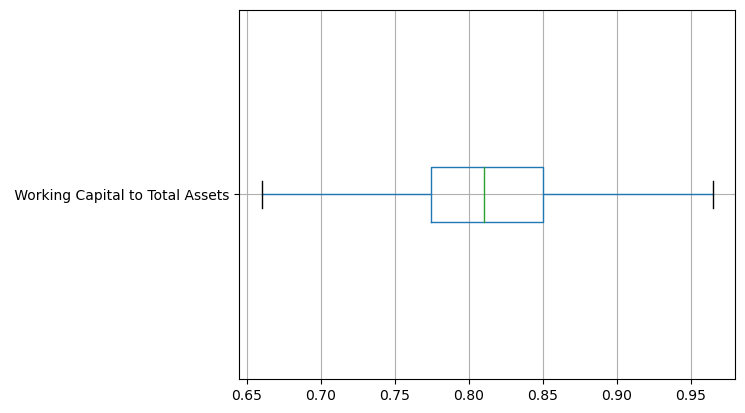

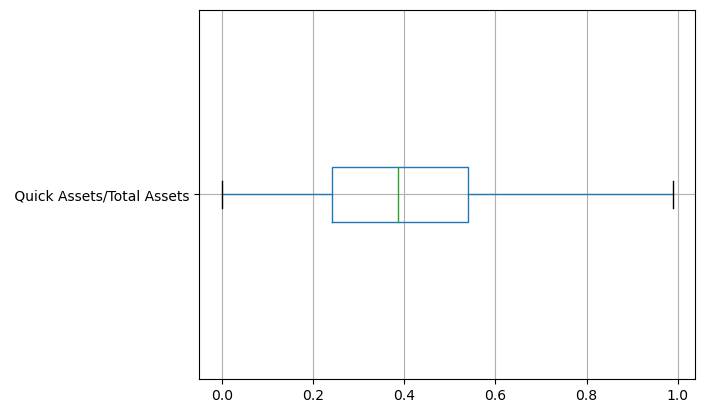

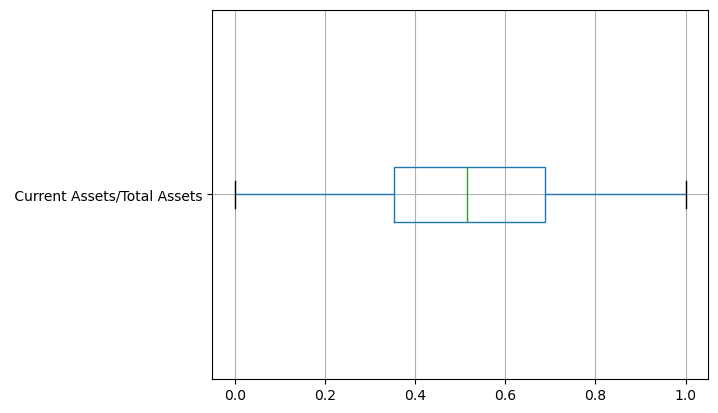

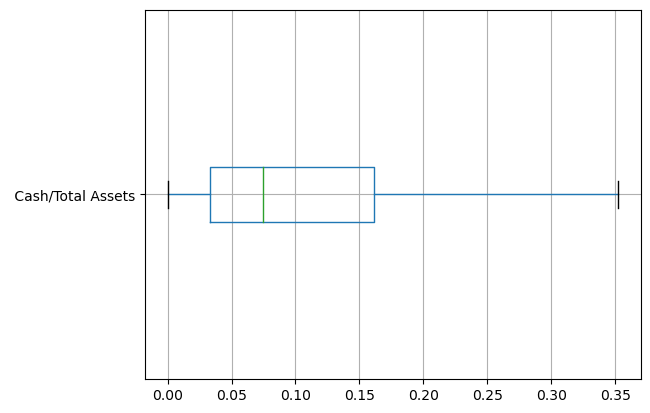

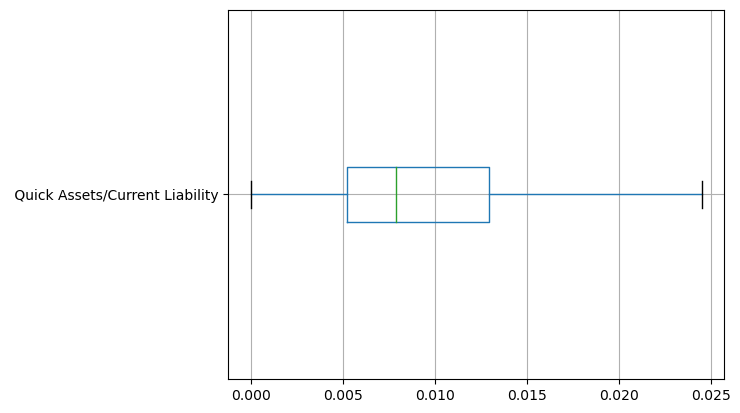

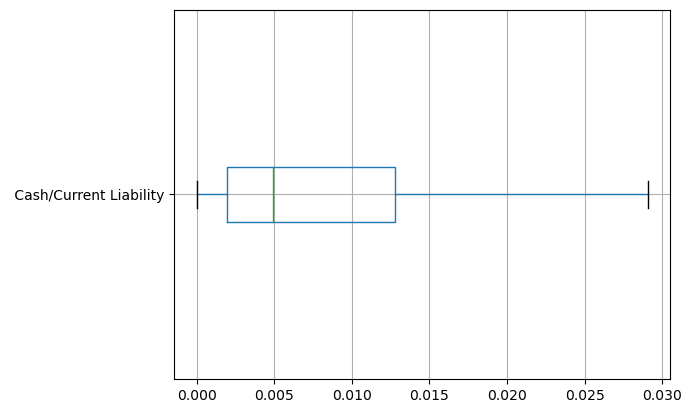

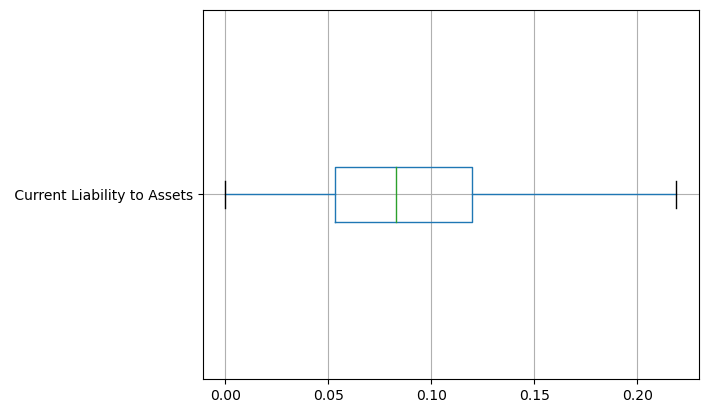

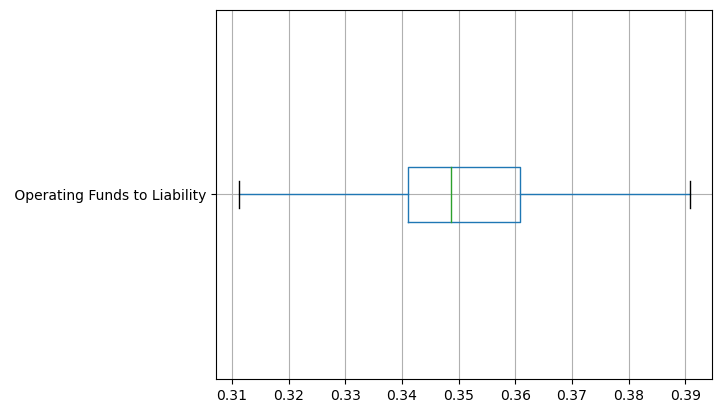

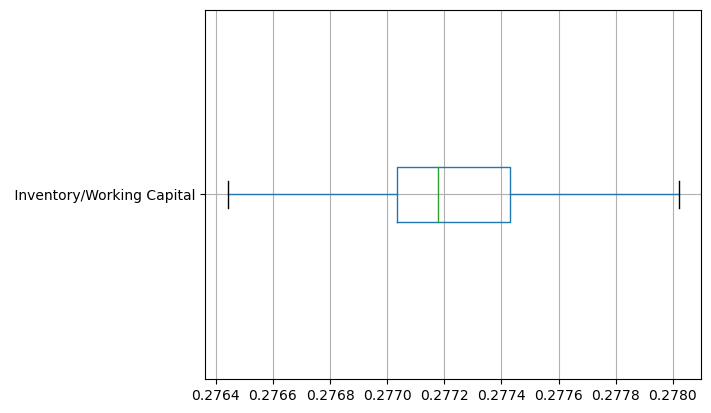

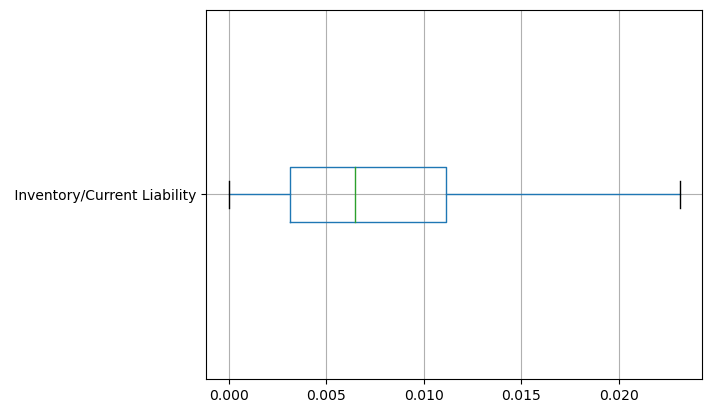

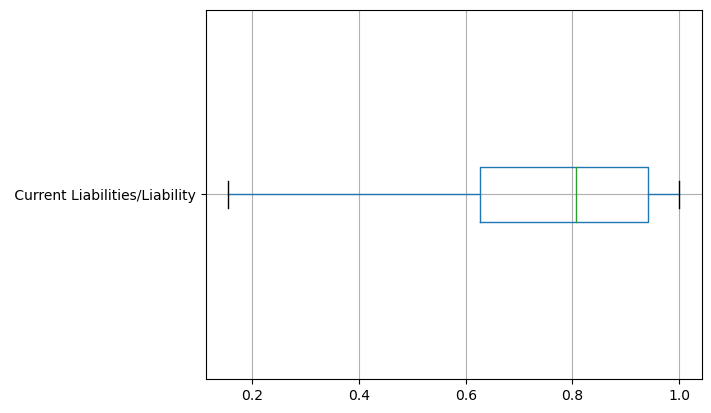

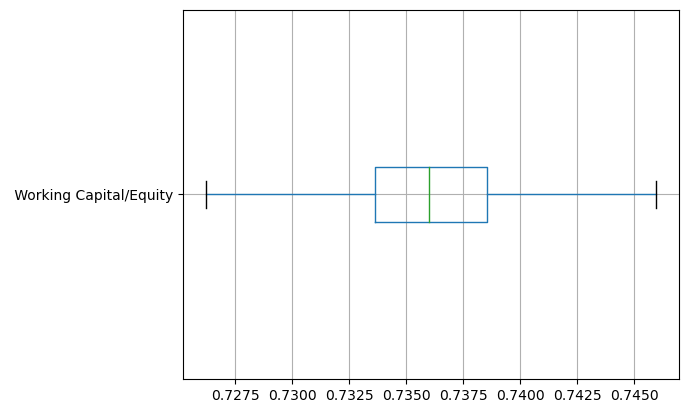

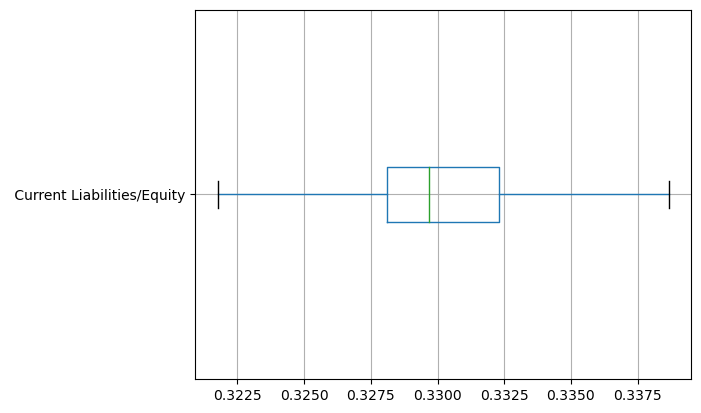

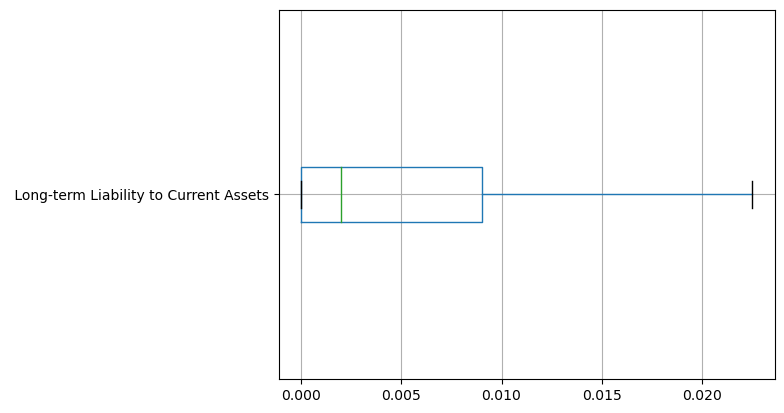

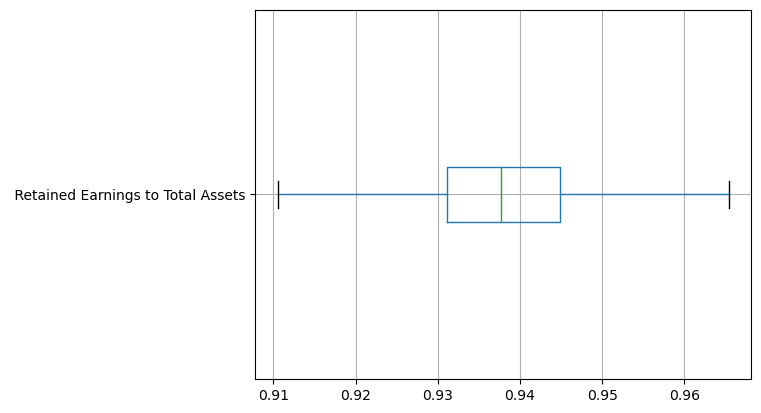

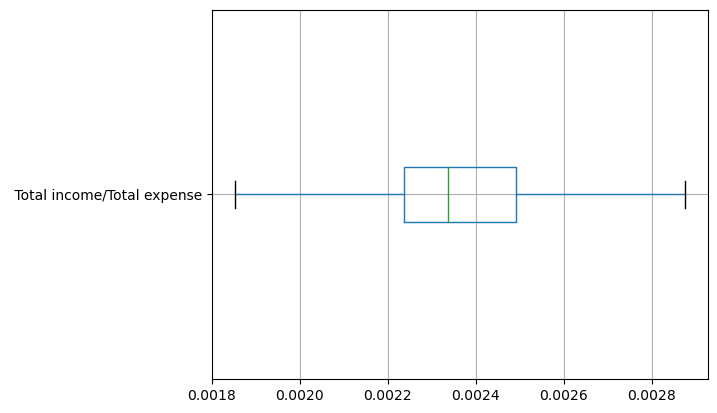

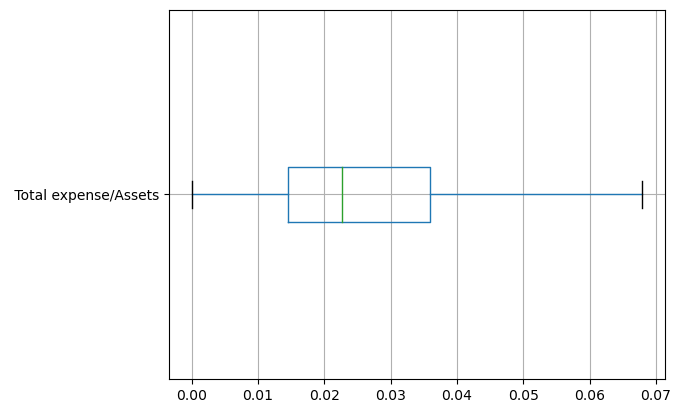

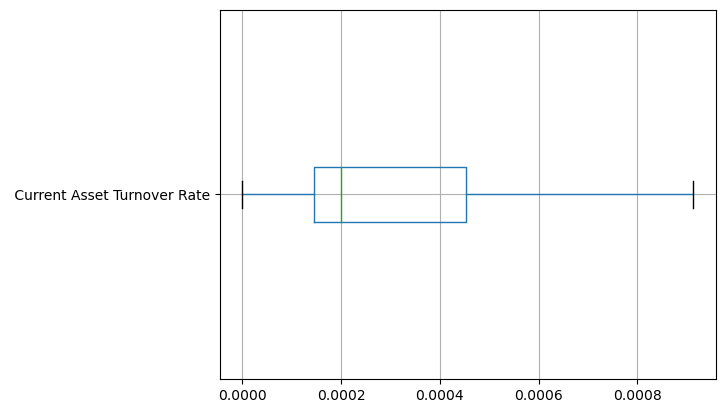

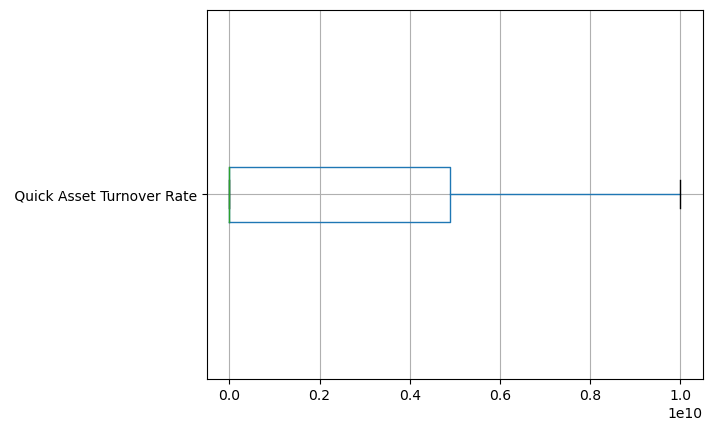

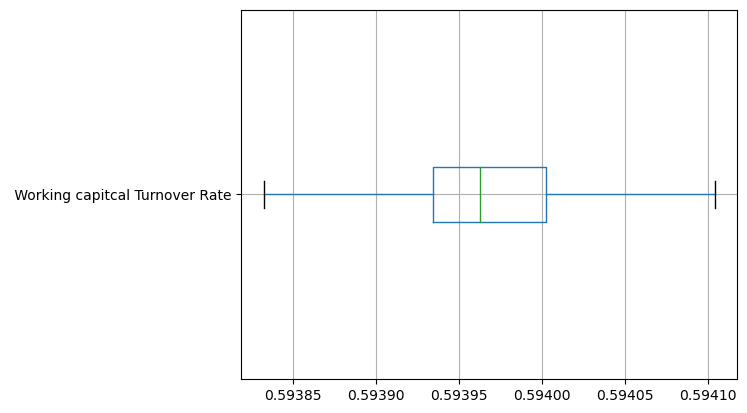

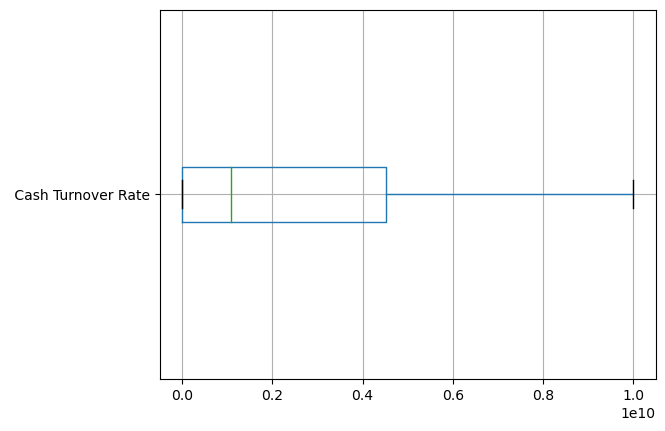

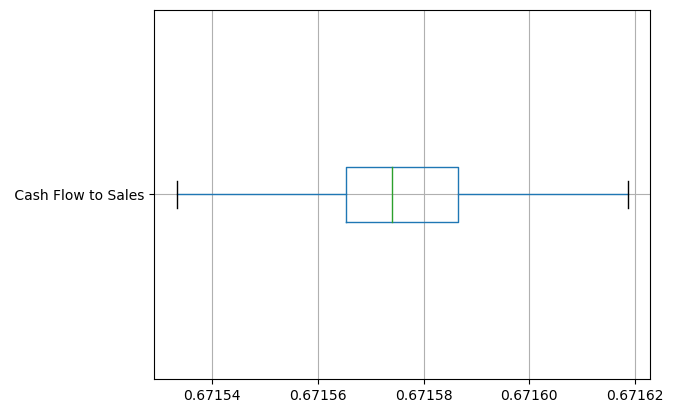

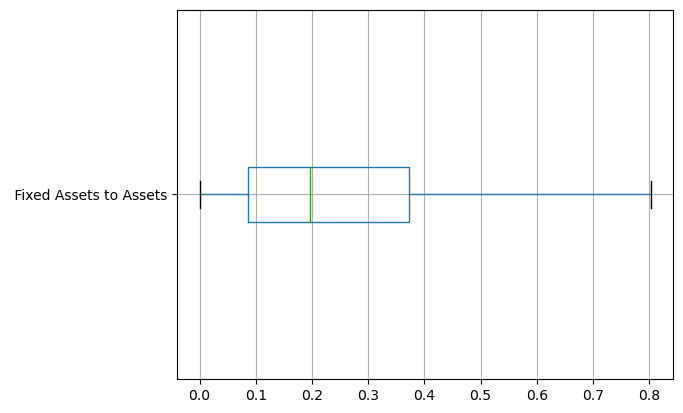

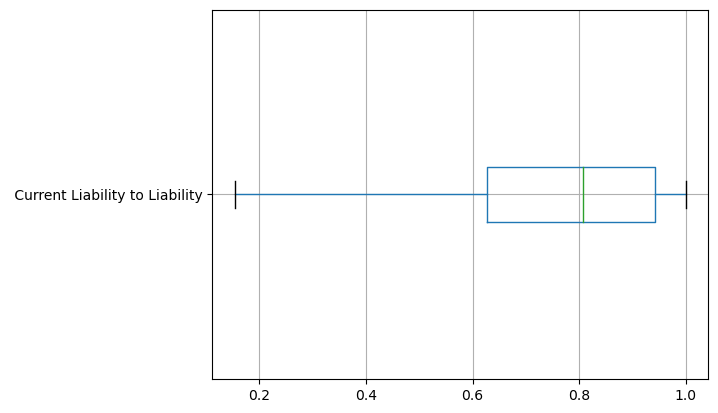

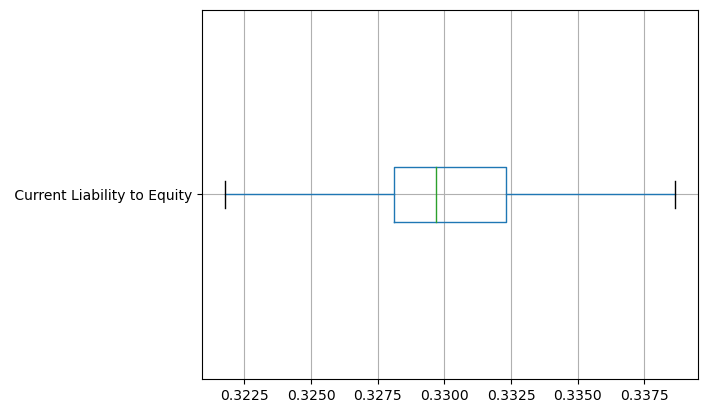

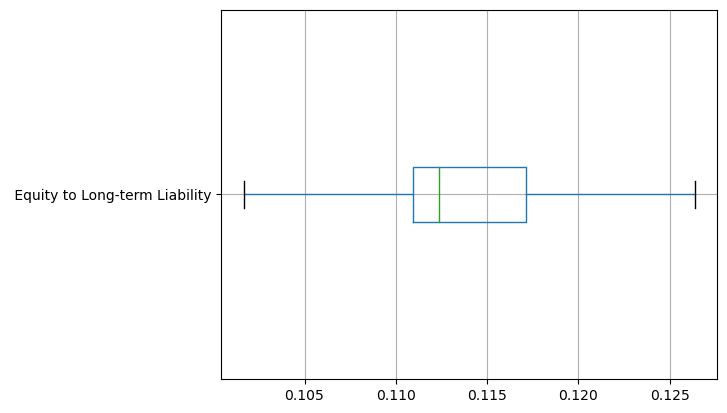

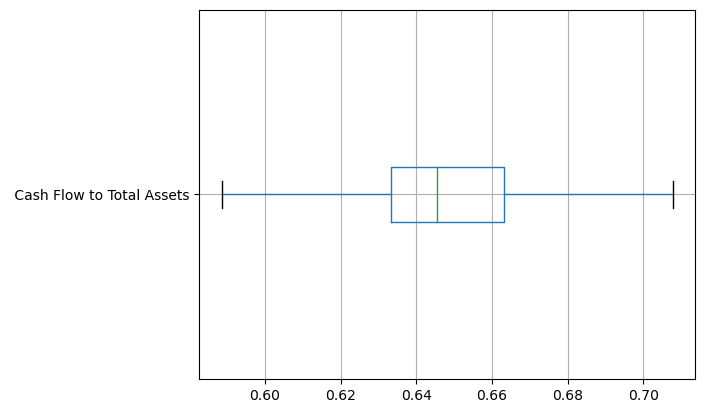

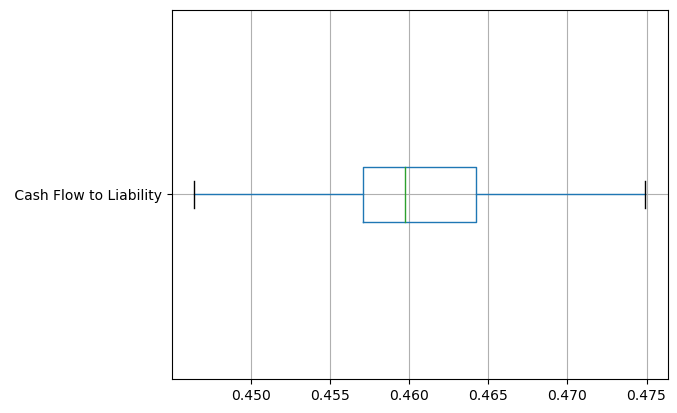

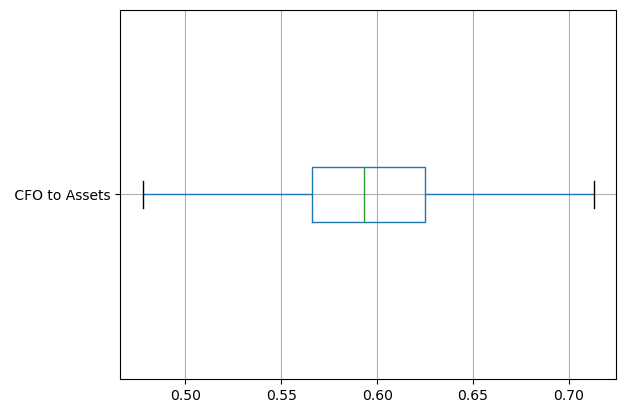

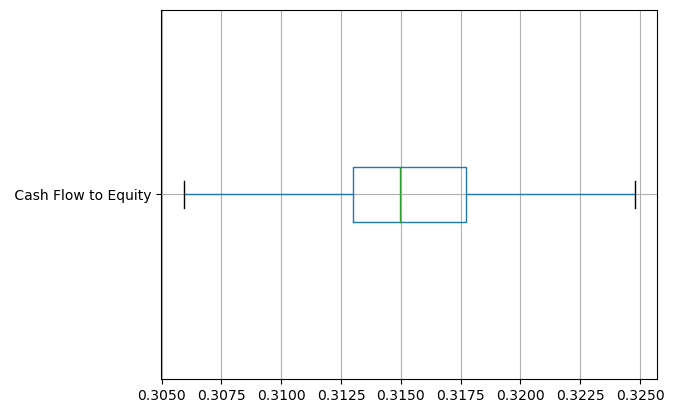

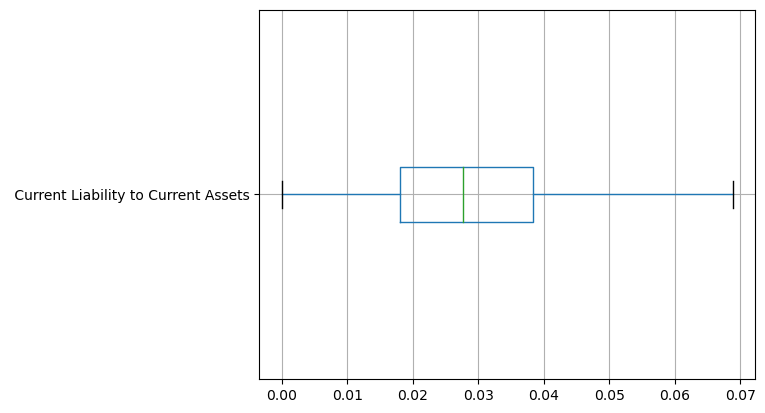

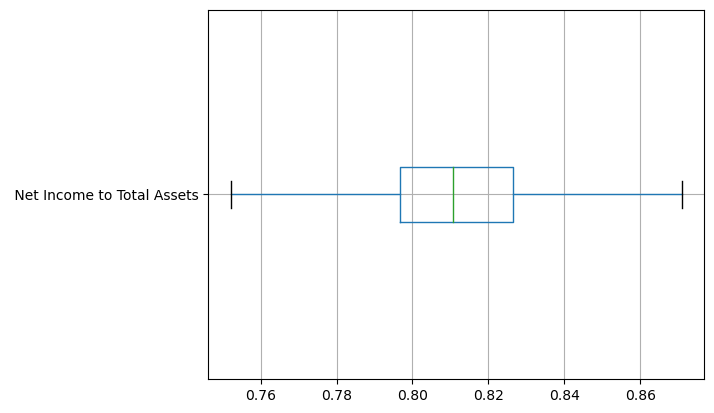

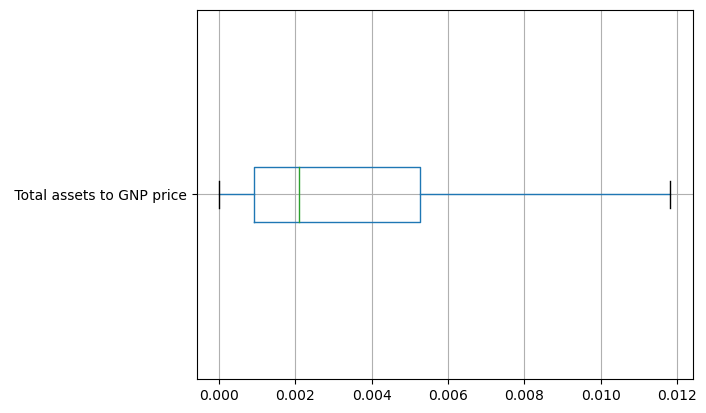

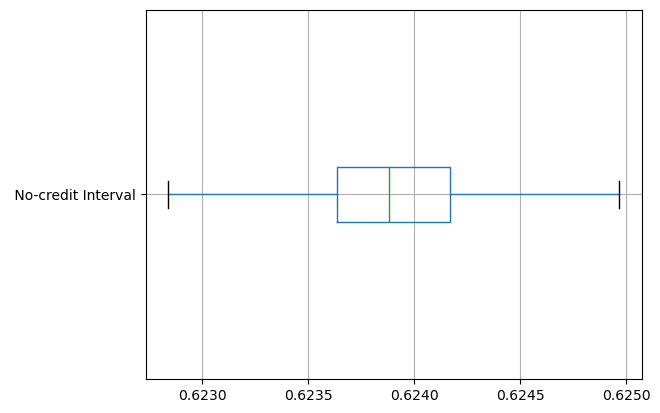

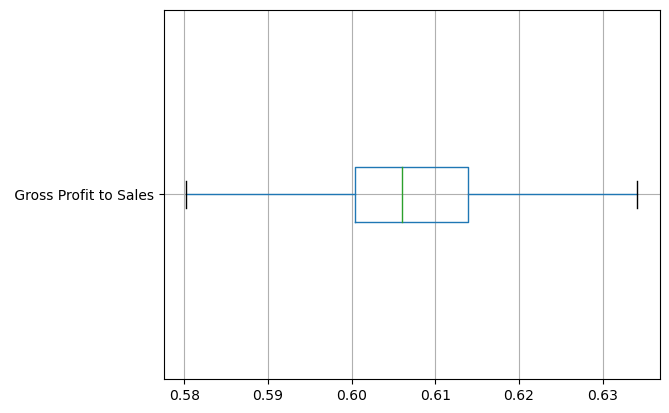

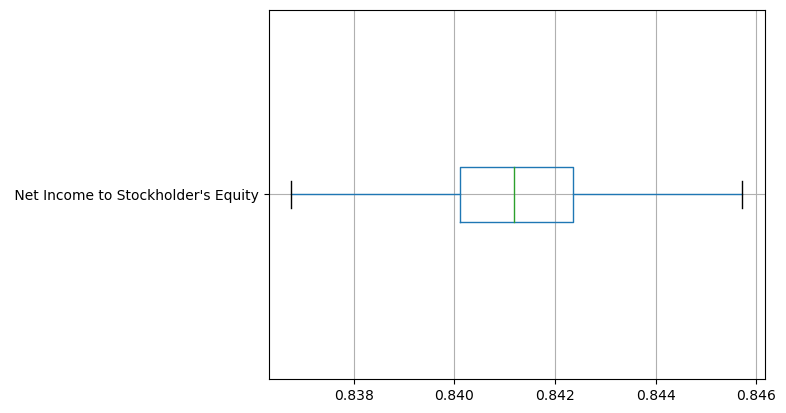

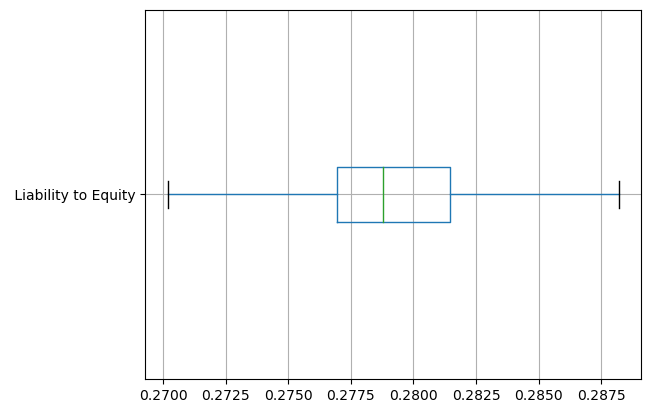

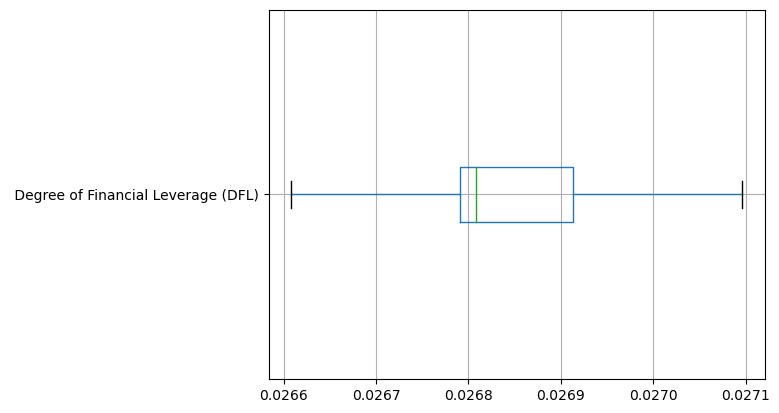

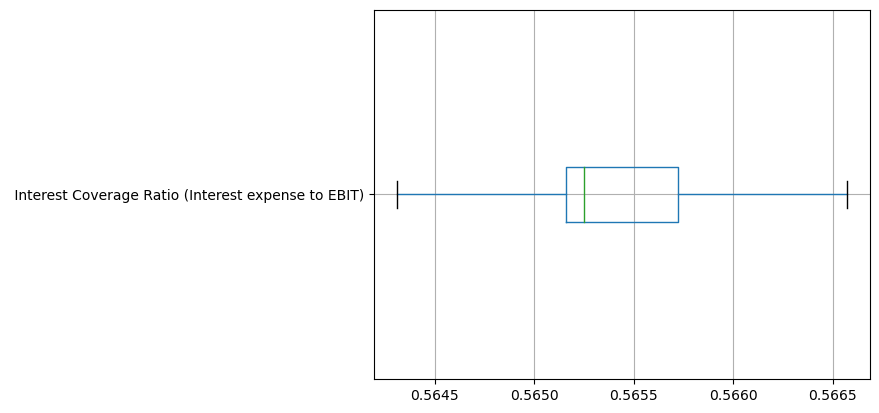

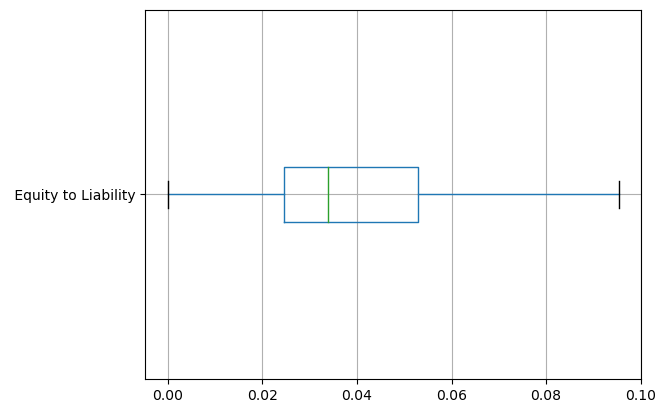

In [28]:
def box_plot(df,feature):
    df.boxplot(column=[feature],vert=0)
    plt.show()
    
for i in range(0,x2.shape[1]):
    box_plot(x2,features_x[i])

### Outliers that fall outside lower boundary Q1-1.5*IQR and upper boundary  Q3+1.5*IQR are imputed with the respective boundary values
### This cleaned data can be used for for further data processing

In [29]:
x2.head()

ROA(C) before interest and depreciation before interest  \
0                                           0.387973          
1                                           0.464291          
2                                           0.426071          
3                                           0.399844          
4                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.455122   
1                                 0.538214   
2                                 0.499019   
3                                 0.455122   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.442034    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.797096   
1                0.998946                    0.797380   
2                0.998857                    0.797096   
3                0.998781                    0.797096   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.809075                                      0.303288   
1                      0.809301                                      0.303556   
2                      0.809075                                      0.303288   
3                      0.809075                                      0.303350   
4                      0.809304                                      0.303475   

    Continuous interest rate (after tax)  ...  \
0                               0.781314  ...   
1                               0.781506  ...   
2                               0.781314  ...   
3                               0.781314  ...   
4                               0.781550  ...   

    Current Liability to Current Assets   Net Income to Total Assets  \
0                              0.068886                     0.752193   
1                              0.047775                     0.795297   
2                              0.025346                     0.774670   
3                              0.067250                     0.752193   
4                              0.047725                     0.795016   

    Total assets to GNP price   No-credit Interval   Gross Profit to Sales  \
0                    0.009219             0.622879                0.601453   
1                    0.008323             0.623652                0.610237   
2                    0.011819             0.623841                0.601449   
3                    0.003252             0.622929                0.583538   
4                    0.003878             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.836752              0.288207   
1                             0.839969              0.283846   
2                             0.836774              0.288207   
3                             0.836752              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026608   
1                             0.027096   
2                             0.026608   
3                             0.026697   
4                     

# Handling imbalance dataset

In [30]:
dataset['Bankrupt'].value_counts()

0    6599
1     220
Name: Bankrupt, dtype: int64

Bankrupt - No (0) : 6599
Bankrupt - Yes (1): 220


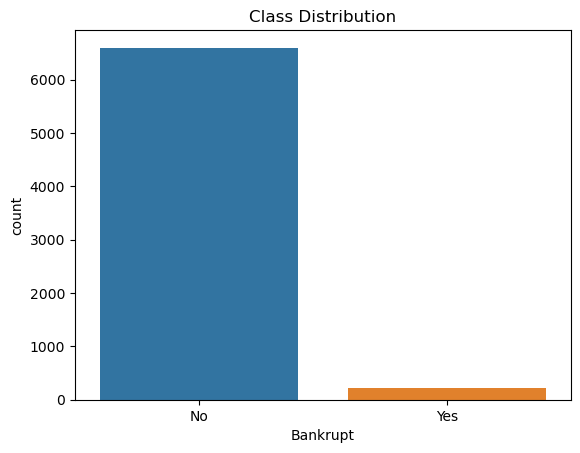

In [31]:
# Checking whether the target variable 'Bankrupt' is balanced or imbalanced

sns.countplot(data=dataset,x='Bankrupt')
No,Yes=dataset['Bankrupt'].value_counts()
print("Bankrupt - No (0) :",No)
print("Bankrupt - Yes (1):",Yes)
plt.xticks(dataset['Bankrupt'].value_counts().index,['No','Yes'])
plt.title("Class Distribution")
plt.show()

* It's an imbalance dataset
* 0 - majority class - 6599
* 1 - minority class - 220

### There are three ways to make the data balanced
* Undersampling - target - majoriyt class - excess vlaues (6599 - 220 = 6379) are removed from majority class 
* Oversampling  - target - minority class - 6379 new values(by duplicating existing data points) are added to minority class
* SMOTE / Sythetic Artificial approach - 6379 new values(by using the technique nearest neighbors) are added to minority class 
* As we cannot afford to loose 6379 rows , Oversmapling / SMOTE is the best approach to make the dataset balanced
* Here we use Random OverSampling sampling to make the dataset balanced

## Random OverSampling

In [32]:
x2.shape

(6819, 93)

In [33]:
x = x2
y = dataset['Bankrupt']

In [34]:
%pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [35]:
import imblearn

In [36]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE(sampling_strategy='minority')

# fit and apply the transform
x_smote, y_smote = oversample.fit_resample(x, y)

In [37]:
print(x_smote.shape,y_smote.shape)

(13198, 93) (13198,)


In [38]:
y_smote.head()

0    1
1    1
2    1
3    1
4    1
Name: Bankrupt, dtype: int64

# Target Data after Random OverSampling

Bankrupt - No : 6599
Bankrupt - Yes: 6599


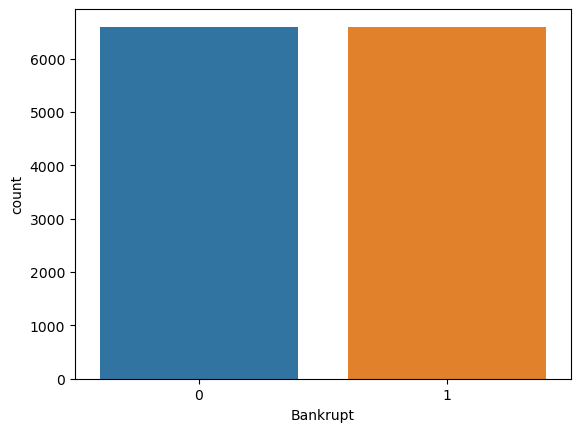

In [40]:
sns.countplot(data=pd.DataFrame(y_smote),x='Bankrupt')
No,Yes=y_smote.value_counts()
print("Bankrupt - No :",No)
print("Bankrupt - Yes:",Yes)
plt.show()

# Feature Scaling

In [41]:
dataset.describe()

ROA(C) before interest and depreciation before interest  \
count                                        6819.000000          
mean                                            0.505180          
std                                             0.060686          
min                                             0.000000          
25%                                             0.476527          
50%                                             0.502706          
75%                                             0.535563          
max                                             1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  \
count                                   6819.000000   
mean                                       0.303623   
std                                        0.011163   
min                                        0.000000   
25%                                        0.303466   
50%                                        0.303525   
75%                                        0.303585   
max                                        1.000000   

        Continuous interest rate (after tax)  ...  \
count                            6819.000000  ...   
mean                                0.781381  ...   
std                                 0.012679  ...   
min                                 0.000000  ...   
25%                                 0.781567  ...   
50%                                 0.781635  ...   
75%                                 0.781735  ...   
max 

### It is noticed that minimum value and maximum value for every column is 0 and 1 respectively ie) The data is already scaled (min-max scaling)
### Assuming that the data is normally distributed , Standard scaling can be performed on the dataset

In [42]:
from sklearn.preprocessing import StandardScaler

st = StandardScaler()
x_scaled = st.fit_transform(x_smote)
x_scaled=pd.DataFrame(x_scaled)
x_scaled.describe()

0             1             2             3             4   \
count  1.319800e+04  1.319800e+04  1.319800e+04  1.319800e+04  1.319800e+04   
mean  -3.680968e-15 -4.856957e-15  6.100115e-15 -1.399093e-16  4.429124e-15   
std    1.000038e+00  1.000038e+00  1.000038e+00  1.000038e+00  1.000038e+00   
min   -1.538215e+00 -1.369430e+00 -1.482220e+00 -2.241806e+00 -2.243266e+00   
25%   -7.249625e-01 -8.503522e-01 -7.651473e-01 -6.391709e-01 -6.347970e-01   
50%   -5.834492e-02 -1.472883e-02 -4.818179e-02 -1.797543e-01 -1.800496e-01   
75%    5.886884e-01  6.294061e-01  6.130652e-01  5.189835e-01  5.211470e-01   
max    2.737660e+00  2.631802e+00  2.715766e+00  2.869566e+00  2.863396e+00   

                 5             6             7             8             9   \
count  1.319800e+04  1.319800e+04  1.319800e+04  1.319800e+04  1.319800e+04   
mean   2.503429e-13 -3.205437e-13 -7.853322e-15 -1.090716e-13 -6.339421e-13   
std    1.000038e+00  1.000038e+00  1.000038e+00  1.000038e+00  1.000038e+00   
min   -1.492419e+00 -1.239678e+00 -1.187907e+00 -1.261527e+00 -1.182323e+00   
25%   -7.747238e-01 -9.372015e-01 -9.830136e-01 -9.070091e-01 -9.638053e-01   
50%    2.703036e-02 -2.355515e-02 -2.275758e-02 -4.443120e-02 -5.975969e-02   
75%    5.828781e-01  6.422524e-01  6.511099e-01  6.152241e-01  6.507551e-01   
max    2.576960e+00  2.586933e+00  2.544053e+00  2.334954e+00  2.580968e+00   

       ...            83            84            85            86  \
count  ...  1.319800e+04  1.319800e+04  1.319800e+04  1.319800e+04   
mean   ...  1.489809e-15 -4.529303e-15 -3.646205e-16 -8.652469e-14   
std    ...  1.000038e+00  1.000038e+00  1.000038e+00  1.000038e+00   
min    ... -2.169597e+00 -1.285087e+00 -1.168898e+00 -1.548377e+00   
25%    ... -7.812593e-01 -9.125375e-01 -8.432516e-01 -7.204066e-01   
50%    ... -5.368744e-02 -3.684957e-02 -3.466952e-01  1.966145e-02   
75%    ...  8.096332e-01  6.817623e-01  6.511120e-01  5.804831e-01   
max    ...  1.650707e+00  2.637657e+00  1.964967e+00  2.141022e+00   

                 87            88            89            90            91  \
count  1.319800e+04  1.319800e+04  1.319800e+04  1.319800e+04  1.319800e+04   
mean   1.086768e-15  3.248013e-14 -8.328721e-15  2.765417e-14 -2.760397e-14   
std    1.000038e+00  1.000038e+00  1.000038e+00  1.000038e+00  1.000038e+00   
min   -2.241871e+00 -1.213966e+00 -2.774326e+00 -1.253222e+00 -1.320558e+00   
25%   -6.392619e-01 -1.042719e+00 -8.742486e-01 -8.651791e-01 -8.296685e-01   
50%   -1.798380e-01  1.682560e-02 -3.936449e-02 -3.141248e-02 -1.056742e-01   
75%    5.191259e-01  7.401507e-01  9.481433e-01  4.970864e-01  5.677488e-01   
max    2.869697e+00  2.529646e+00  1.432989e+00  2.004937e+00  1.905727e+00   

                 92  
count  1.319800e+04  
mean  -2.145785e-15  
std    1.000038e+00  
min   -1.520869e+00  
25%   -6.522162e-01  
50%   -3.884994e-01  
75%    2.250829e-01  
max    3.028322e+00  

[8 rows x 93 columns]

## Spliting training and test data

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y_smote,train_size=0.75,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(9898, 93)
(3300, 93)
(9898,)
(3300,)


# Dimensionality Reduction (PCA)

In [44]:
from sklearn.decomposition import PCA
n = 50
pca = PCA(n_components=n)
pca_fit=pca.fit_transform(x_train)

In [45]:
x_train_reduced=pd.DataFrame(pca_fit,index=x_train.index,columns=['PC'+str(i) for i in range(1,n+1)])
x_train_reduced

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
6362  -7.702626 -1.675320  0.832685 -1.522036 -1.587489 -0.175761  1.329274   
1871  -5.517034  4.487726 -0.990427  3.371669 -0.867941  1.178722 -0.215511   
9666  -4.737517 -0.622478 -3.178847 -2.128009 -0.216329  1.557472 -0.998787   
5846   3.789303  1.063969 -1.861490  1.452836  2.055726 -1.901328  1.364423   
10025 -5.011755  0.643758  0.877560  2.028305 -0.752397 -0.281139 -5.871320   
...         ...       ...       ...       ...       ...       ...       ...   
79     7.662890  4.662505 -2.069709 -3.429729  1.039738  1.387435 -0.613856   
12119 -5.843710 -1.426403  2.055529  0.562614 -1.068989  1.720931 -1.785277   
8039  -5.724612  0.384143  2.285983  0.114922 -1.138494 -1.452361  2.307507   
6936  -1.542688 -2.703458  1.349058  1.559348 -0.639790 -0.323909  1.999088   
5640   5.182869  0.384294  1.833184 -0.785913 -0.539973 -0.110298  1.068718   

            PC8       PC9      PC10  ...      PC41      PC42      PC43  \
6362   2.282312  0.321164 -2.296397  ... -0.032831  0.981588 -0.419485   
1871  -2.532664  4.946176 -1.277489  ...  0.609251 -0.050196  0.200710   
9666  -0.351118 -0.017733 -2.541015  ... -1.073928  0.102434 -0.003178   
5846  -0.062853 -1.731298  1.030643  ... -0.759624 -0.107169  0.190540   
10025  3.134409 -1.034093 -0.535053  ... -0.184816  0.042122  0.780046   
...         ...       ...       ...  ...       ...       ...       ...   
79    -0.002271  0.251492  2.660969  ...  0.257215  0.148784  0.179385   
12119  0.044117  0.970138  0.121863  ...  0.741292 -0.601099 -0.327442   
8039   1.195180  0.215319 -0.667854  ...  0.816457 -0.331433 -0.415503   
6936  -0.689026 -2.068614 -0.844867  ... -0.171390 -0.118005 -0.024272   
5640  -2.124068 -1.693280 -1.534723  ... -0.204518 -0.277725  0.218398   

           PC44      PC45      PC46      PC47      PC48      PC49      PC50  
6362   0.492886  0.568689  0.696977 -0.073236 -0.453132 -0.990458  0.411072  
1871  -0.210651  0.482905 -0.088954 -0.104732 -0.317207 -0.316079 -0.195801  
9666   0.047310 -0.434257  0.021085 -0.389611  0.199144  0.152569 -0.325823  
5846  -0.072834 -0.047640  0.569789 -0.366752  0.177187 -0.131805 -0.136757  
10025  0.683655  0.201607  0.058285 -1.135966 -0.226799  0.298441 -0.065627  
...         ...       ...       ...       ...       ...       ...       ...  
79    -0.041185 -0.018057 -0.070099 -0.383029 -0.049835 -0.026966 -0.191553  
12119 -0.177460  0.218252  0.072845 -0.089156 -0.263399 -0.338660 -0.239283  
8039  -0.067648 -0.208124  0.397057 -0.104788 -0.163102  0.057723  0.331714  
6936  -0.012835  0.180236  0.315072 -0.366770 -0.029560 -0.105147 -0.202972  
5640  -0.742964  0.118906  0.085317  0.125413 -0.124380  0.395250 -0.225678  

[9898 rows x 50 columns]

In [46]:
pca = PCA(n_components=n)
pca_fit=pca.fit_transform(x_test)
x_test_reduced=pd.DataFrame(pca_fit,index=x_test.index,columns=['PC'+str(i) for i in range(1,n+1)])
x_test_reduced

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
5821   4.218631  4.520874 -2.731798 -0.182282 -3.787286  1.157018 -0.763730   
9743  -2.229156  4.924146 -3.226695 -1.745236 -4.126020  1.950953 -3.351795   
8027  -3.806670 -1.152392 -4.566649  1.905534 -1.697838 -1.416429  1.731577   
10486 -5.550274  4.899675 -3.927416  2.711540  0.057065 -1.795290 -0.352369   
9693  -5.498680 -4.710530 -0.475056 -0.984705 -0.751288 -0.918752 -0.243492   
...         ...       ...       ...       ...       ...       ...       ...   
12894 -8.312246 -2.883361 -0.439008 -2.587748  3.110782  0.162898 -2.377925   
9823  -5.412985  1.417220 -1.396961 -3.411664  0.816958  0.965526  0.010353   
2688   2.640872 -1.723356 -0.332908  1.528387  0.638971 -0.274558 -1.686501   
5153   7.306585  1.715928 -1.265882  1.708750  3.471675 -2.109794  1.151498   
4708   4.285724 -2.626016 -0.791723 -0.375470 -0.484238 -1.317594  0.617631   

            PC8       PC9      PC10  ...      PC41      PC42      PC43  \
5821   1.739860 -1.707426  0.239539  ...  0.064772  0.032146  0.622067   
9743   1.841777 -1.172974 -0.278080  ... -0.502937 -0.341509  0.195998   
8027  -0.472685  0.152776 -1.649666  ... -0.967452 -0.095735  0.353046   
10486  0.138211  1.408193  0.460761  ...  0.256628 -0.324899  0.287719   
9693   0.510687 -0.049734  0.559833  ...  0.185207 -0.469665 -0.747352   
...         ...       ...       ...  ...       ...       ...       ...   
12894  0.195204  1.639451 -0.839147  ...  0.343422 -0.379327  0.358401   
9823  -0.046086 -0.580364  0.652968  ... -0.130057 -0.007184 -0.331349   
2688   0.157235  0.076376  2.454301  ...  0.213790 -0.309712  0.203845   
5153  -0.834194  0.042015 -0.854220  ... -0.003067 -0.156470 -0.125184   
4708  -1.497746  1.604942  1.143031  ...  0.302804 -0.570902  0.109493   

           PC44      PC45      PC46      PC47      PC48      PC49      PC50  
5821   0.943584 -0.949664  0.324989  0.610595 -1.152257  0.230195  0.007966  
9743  -0.256776  0.182932 -0.258354  0.614322  0.379339  0.078482 -0.036990  
8027   0.022008 -0.659061  0.132634 -0.153077 -0.024883  0.197236  0.124565  
10486  0.181113 -0.157006  0.360428  0.119896  0.587448 -0.316722  0.026766  
9693   0.146975 -0.669677  0.710895  0.391422  0.754049 -0.095903 -0.244886  
...         ...       ...       ...       ...       ...       ...       ...  
12894  0.202342 -0.192976  0.077257  1.382174  0.009415 -0.703964 -0.061397  
9823  -0.115474 -0.093230  0.469116  0.131875 -0.350021 -0.083157 -0.178474  
2688   0.031559  0.335082 -0.240311  0.047401 -0.139360 -0.238884  0.240807  
5153  -0.014016  0.058763  0.017995 -0.172991 -0.022171  0.508415 -0.105942  
4708   0.274614  0.227794  0.565871  0.158729 -0.013443 -0.232977 -0.106355  

[3300 rows x 50 columns]

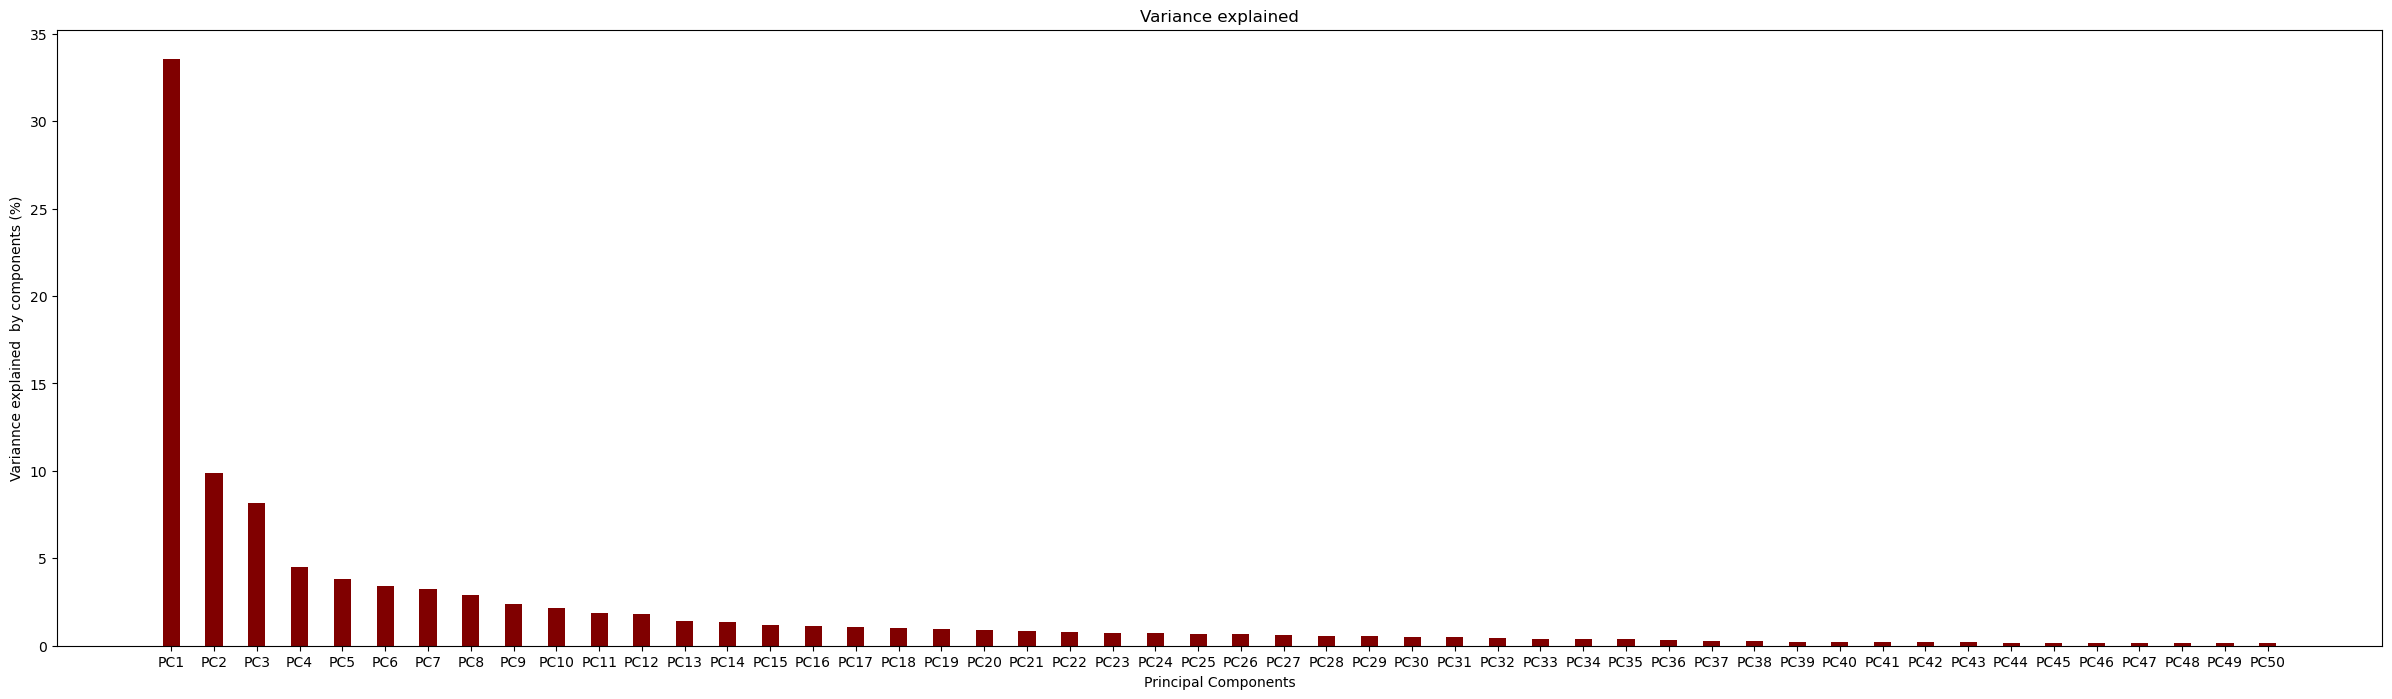

In [47]:
var = pca.explained_variance_ratio_*100
comp = ['PC'+str(i) for i in range(1,n+1)]

fig = plt.figure(figsize = (30, 8))
 
# creating the bar plot
plt.bar(comp,var,  color ='maroon',
        width = 0.4)
 
plt.xlabel("Principal Components")
plt.ylabel("Variannce explained  by components (%)")
plt.title("Variance explained")
plt.show()

In [48]:
sum(pca.explained_variance_ratio_)

0.9848676881081867

# Importing various classification models

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [108]:
# Logistic Regression
lr = LogisticRegression()

# Decision Tree Classifier
dt = DecisionTreeClassifier()

# Random Forest Classifier
rf=RandomForestClassifier()

# Gradient Boosting Classifier
gb = GradientBoostingClassifier()

# Support Vector Machine
svc=SVC(probability=True)

# Fitting / Training the models ( Original data)

In [109]:
models=[lr,dt,rf,gb,svc]
for model in models:
    model.fit(x_train,y_train)

C:\Users\Suhas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Predict the results  (Original data)

In [110]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score

In [111]:
for model in models:
    print(model)

LogisticRegression()
DecisionTreeClassifier()
RandomForestClassifier()
GradientBoostingClassifier()
SVC(probability=True)


In [112]:
y_pred_train = []
y_pred_test = []

In [113]:
models=[lr,dt,rf,gb,svc]
for model in models:
    y_pred_train.append(model.predict(x_train))
    y_pred_test.append(model.predict(x_test))

# Performance Evaluation (Original data)

In [114]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score,f1_score,recall_score,precision_score

## Accuracy , F1 Score, Precision, Recall

In [115]:
tr_accu = []
test_accu = []
F1_score = []
recall =[]
precision = []

for value in y_pred_train:
    tr_accu.append(round(accuracy_score(y_train,value) *100,2))

for value in y_pred_test:
    test_accu.append(round(accuracy_score(y_test,value) *100,2))
    F1_score.append(round(f1_score(y_test, value,average='weighted') *100,2))
    recall.append(round(recall_score(y_test, value,average='weighted') *100,2))
    precision.append(round(precision_score(y_test, value,average='weighted') *100,2))


In [116]:
model_names = ['Logistic Regression','Decision Tree','Random Forest','Gradient Boosting','SVC']

In [117]:
result_original_data = pd.DataFrame({'ML Models':model_names,'Training Accuracy (%)':tr_accu,'Test Accuracy (%)':test_accu,'F1 Score(%)':F1_score,'Recall(%)':recall,
                       'Precision(%)':precision}
                     )
result_original_data.set_index('ML Models',inplace=True)
result_original_data

Training Accuracy (%)  Test Accuracy (%)  F1 Score(%)  \
ML Models                                                                    
Logistic Regression                  92.49              91.36        91.35   
Decision Tree                       100.00              95.85        95.85   
Random Forest                       100.00              98.00        98.00   
Gradient Boosting                    98.23              97.00        97.00   
SVC                                  98.83              97.94        97.94   

                     Recall(%)  Precision(%)  
ML Models                                     
Logistic Regression      91.36         91.50  
Decision Tree            95.85         95.91  
Random Forest            98.00         98.04  
Gradient Boosting        97.00         97.06  
SVC                      97.94         98.01

## Confusion Matrix

In [130]:
#from sklearn.metrics import plot_confusion_matrix


In [131]:
"""fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,10))

for model, ax in zip(models, axes.flatten()):
    ConfusionMatrixDisplay(model, 
                          x_test, 
                          y_test, 
                          ax=ax, 
                          cmap='Blues',
                         )
    ax.title.set_text(type(model).__name__)
plt.tight_layout()  
plt.show()"""

"fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,10))\n\nfor model, ax in zip(models, axes.flatten()):\n    ConfusionMatrixDisplay(model, \n                          x_test, \n                          y_test, \n                          ax=ax, \n                          cmap='Blues',\n                         )\n    ax.title.set_text(type(model).__name__)\nplt.tight_layout()  \nplt.show()"

## ROC - AUC curve

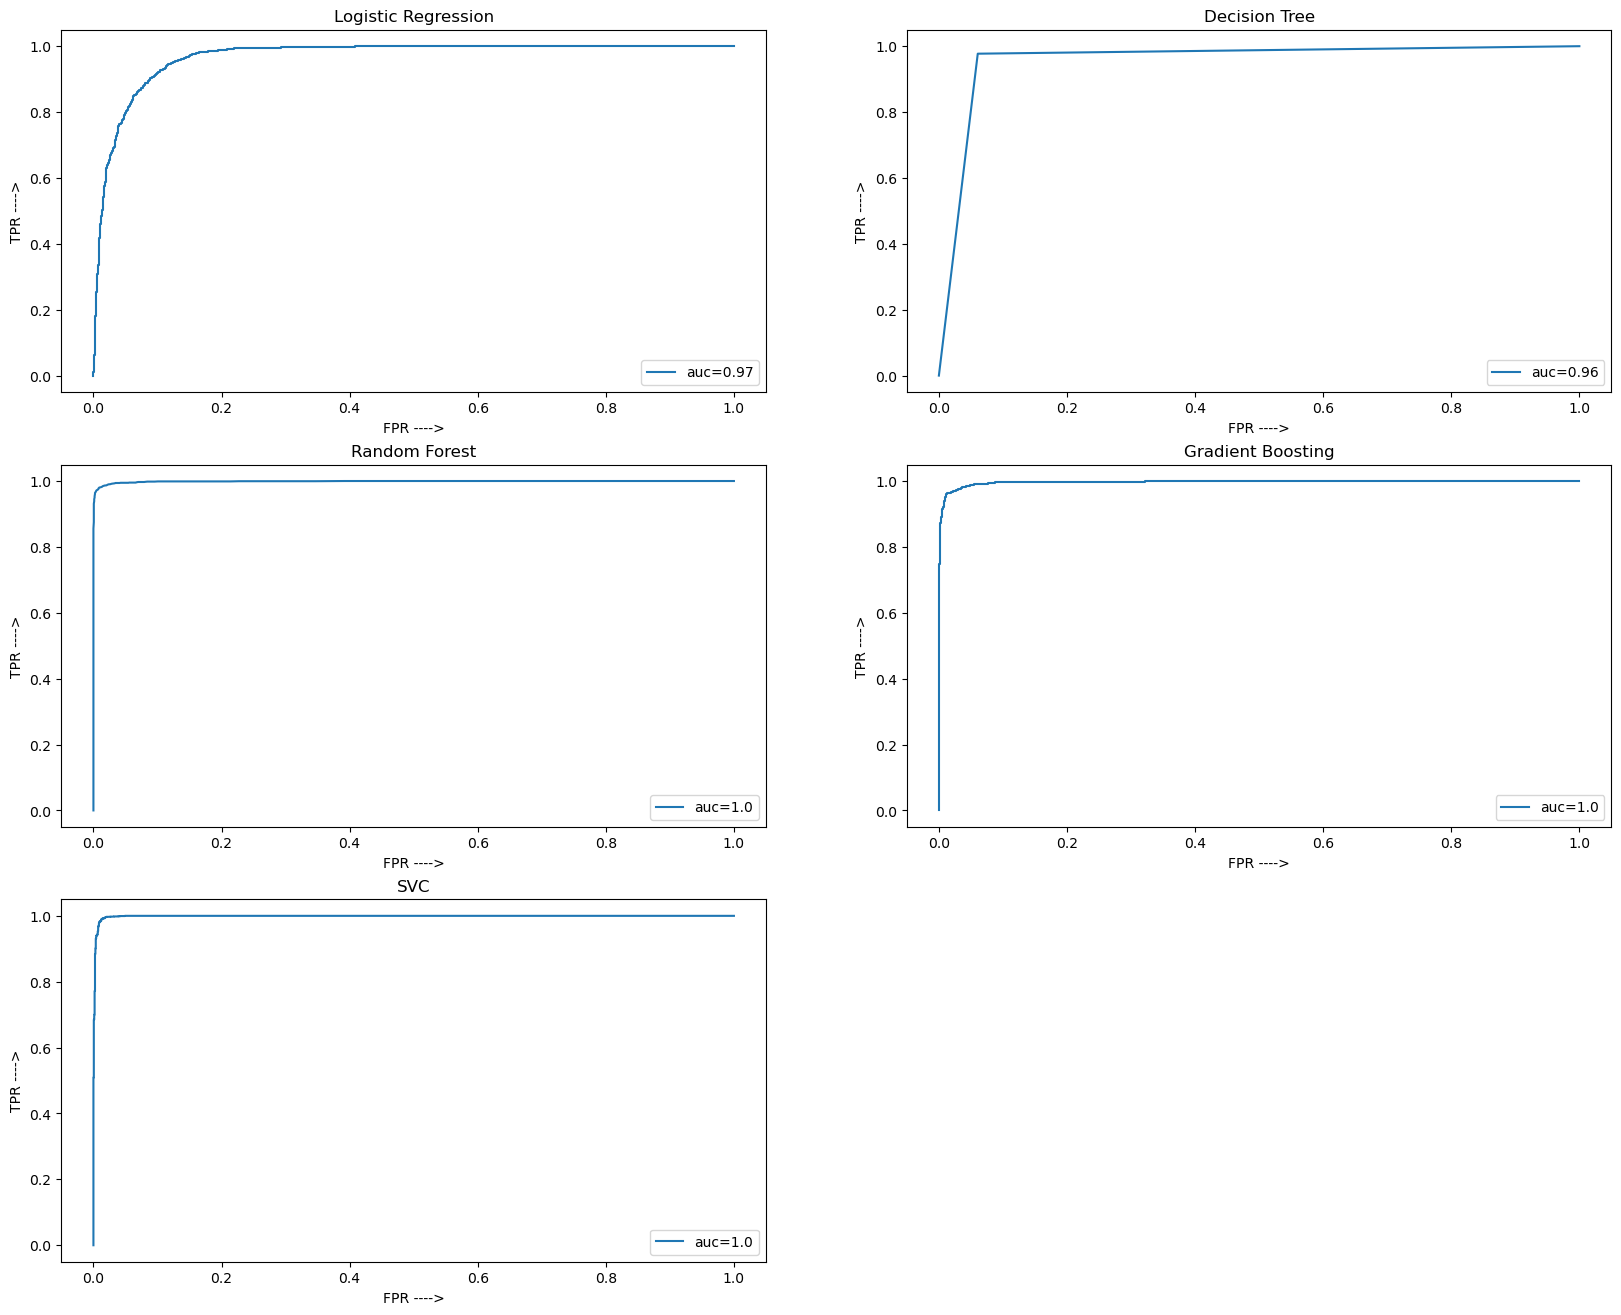

In [121]:
y_pred_proba = []
for model in models:
    y_pred_proba.append(model.predict_proba(x_test)[::,1])
    

plt.figure(figsize=(20,16))
for model,value in zip(model_names,y_pred_proba):
    fpr1, tpr1, thresholds1= metrics.roc_curve(y_test, value)
    auc = metrics.roc_auc_score(y_test, value)
    #plt.figure(figsize=(20,16))
    i = model_names.index(model) +1
    plt.subplot(3,2,i)
    plt.plot(fpr1,tpr1,label="auc="+str(round(auc,2)))
    plt.legend(loc=4)
    plt.title(model)
    plt.xlabel("FPR ---->")
    plt.ylabel("TPR ---->")

# Fitting / Training the models ( Dimension reduced data)

In [123]:
for model in models:
    model.fit(x_train_reduced,y_train)

# Predict the results (Dimension reduced data)

In [124]:
y_pred_train_dim_red = []
y_pred_test_dim_red = []
for model in models:
    y_pred_train_dim_red.append(model.predict(x_train_reduced))
    y_pred_test_dim_red.append(model.predict(x_test_reduced))

# Performance Evaluation (Dimension reduced data)
## ## Accuracy , F1 Score, Precision, Recall

In [125]:
tr_accu_dim_red = []
test_accu_dim_red = []
F1_score_dim_red = []
recall_dim_red =[]
precision_dim_red = []

for value in y_pred_train_dim_red:
    tr_accu_dim_red.append(round(accuracy_score(y_train,value) *100,2))

for value in y_pred_test_dim_red:
    test_accu_dim_red.append(round(accuracy_score(y_test,value)*100,2))
    F1_score_dim_red.append(round(f1_score(y_test, value,average='weighted') *100,2))
    recall_dim_red.append(round(recall_score(y_test, value,average='weighted') *100,2))
    precision_dim_red.append(round(precision_score(y_test, value,average='weighted') *100,2))


In [126]:
result_dim_red_data = pd.DataFrame({'ML Models':model_names,'Training Accuracy (%)':tr_accu_dim_red,'Test Accuracy (%)':test_accu_dim_red,'F1 Score(%)':F1_score_dim_red,'Recall(%)':recall,
                       'Precision(%)':precision_dim_red}
                     )
result_dim_red_data.set_index('ML Models',inplace=True)

In [127]:
result_dim_red_data

Training Accuracy (%)  Test Accuracy (%)  F1 Score(%)  \
ML Models                                                                    
Logistic Regression                  91.37              80.79        80.78   
Decision Tree                       100.00              75.15        74.66   
Random Forest                       100.00              80.58        80.30   
Gradient Boosting                    96.45              84.36        84.36   
SVC                                  98.68              81.21        81.18   

                     Recall(%)  Precision(%)  
ML Models                                     
Logistic Regression      91.36         80.84  
Decision Tree            95.85         77.53  
Random Forest            98.00         82.62  
Gradient Boosting        97.00         84.41  
SVC                      97.94         81.49

## Confusion matrix

In [132]:
"""fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,10))

for model, ax in zip(models, axes.flatten()):
    plot_confusion_matrix(model, 
                          x_test_reduced, 
                          y_test, 
                          ax=ax, 
                          cmap='Blues',
                         )
    ax.title.set_text(type(model).__name__)
plt.tight_layout()  
plt.show()"""

"fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,10))\n\nfor model, ax in zip(models, axes.flatten()):\n    plot_confusion_matrix(model, \n                          x_test_reduced, \n                          y_test, \n                          ax=ax, \n                          cmap='Blues',\n                         )\n    ax.title.set_text(type(model).__name__)\nplt.tight_layout()  \nplt.show()"

# ROC - AUC curve

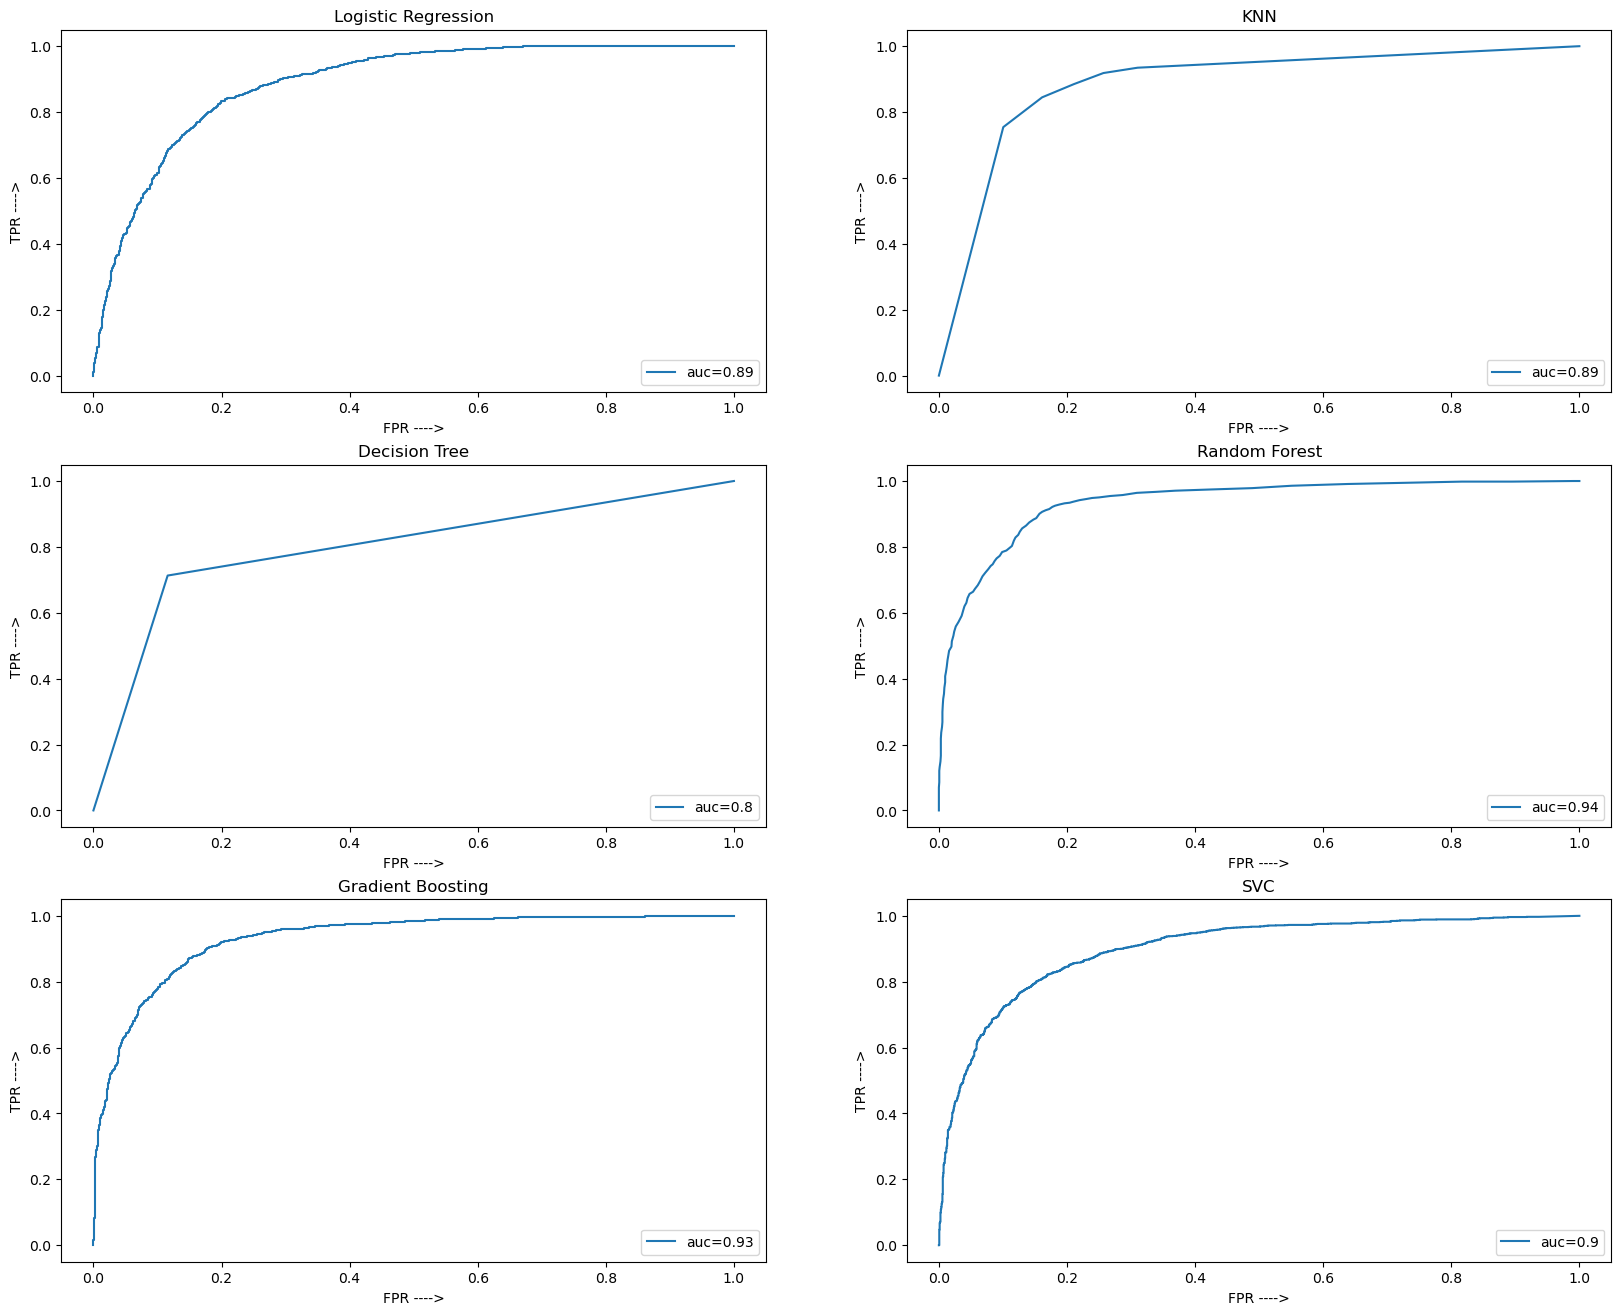

In [ ]:
y_pred_proba_dim_red =[]
for model in models:
    y_pred_proba_dim_red.append(model.predict_proba(x_test_reduced)[::,1])
    

plt.figure(figsize=(20,16))
for model,value in zip(model_names,y_pred_proba_dim_red):
    fpr1, tpr1, thresholds1= metrics.roc_curve(y_test, value)
    auc = metrics.roc_auc_score(y_test, value)
    #plt.figure(figsize=(20,16))
    i = model_names.index(model) +1
    plt.subplot(3,2,i)
    plt.plot(fpr1,tpr1,label="auc="+str(round(auc,2)))
    plt.legend(loc=4)
    plt.title(model)
    plt.xlabel("FPR ---->")
    plt.ylabel("TPR ---->")

# Comparison of models ( Original data Vs PCA data)

In [129]:
result = pd.concat([result_original_data,result_dim_red_data],keys = ['ORIGINAL DATA','PCA APPLIED DATA'])
result

Training Accuracy (%)  \
                 ML Models                                    
ORIGINAL DATA    Logistic Regression                  92.49   
                 Decision Tree                       100.00   
                 Random Forest                       100.00   
                 Gradient Boosting                    98.23   
                 SVC                                  98.83   
PCA APPLIED DATA Logistic Regression                  91.37   
                 Decision Tree                       100.00   
                 Random Forest                       100.00   
                 Gradient Boosting                    96.45   
                 SVC                                  98.68   

                                      Test Accuracy (%)  F1 Score(%)  \
                 ML Models                                             
ORIGINAL DATA    Logistic Regression              91.36        91.35   
                 Decision Tree                    95.85        95.85   
                 Random Forest                    98.00        98.00   
                 Gradient Boosting                97.00        97.00   
                 SVC                              97.94        97.94   
PCA APPLIED DATA Logistic Regression              80.79        80.78   
                 Decision Tree                    75.15        74.66   
                 Random Forest                    80.58        80.30   
                 Gradient Boosting                84.36        84.36   
                 SVC                              81.21        81.18   

                                      Recall(%)  Precision(%)  
                 ML Models                                     
ORIGINAL DATA    Logistic Regression      91.36         91.50  
                 Decision Tree            95.85         95.91  
                 Random Forest            98.00         98.04  
                 Gradient Boosting        97.00         97.06  
                 SVC                      97.94         98.01  
PCA APPLIED DATA Logistic Regression      91.36         80.84  
                 Decision Tree            95.85         77.53  
                 Random Forest            98.00         82.62  
                 Gradient Boosting        97.00         84.41  
                 SVC                      97.94         81.49

# Conlusion

### Accuracy and other scores produced by dimension reduced data are less compared to original data
### Applying PCA technique on the dataset has not shown any improvement on results

## Random Forest algorithm (on original data)  has produced good results  